Trying to extract time data from the columns so we can get 30 minute time windows

Make sure to upload original ecec excel files into colab before running or else it cant find the models



In [ ]:
#!pip install --upgrade numpy
#!pip install --upgrade pandas

#!pip uninstall numpy -y
#!pip install numpy

In [ ]:
import pandas as pd
from IPython.display import display
import re
from dateutil.parser import parse

# Load Excel while skipping the metadata rows
file_path = "/content/ECEC 2022 Student Sign In and Out.xlsx" #had to change the path to run in colab, before compiling remember to change back to toriginal code
excel = pd.ExcelFile(file_path)

# Step 1: Read full data including headers
raw_df = excel.parse("Sign In Out Times Report")

# Step 2: Extract header rows
# Step 2 (updated): Forward fill dates so OUT columns get correct date labels
header_row_1 = raw_df.iloc[4].ffill()  # Fill NaN with previous date (for OUT columns)
header_row_2 = raw_df.iloc[5]          # IN/OUT labels


# Step 3: Combine to create multi-level or unified column headers
new_columns = []
for col1, col2 in zip(header_row_1, header_row_2):
    if pd.notna(col1) and pd.notna(col2):
        new_columns.append(f"{col1.strip()}_{col2.strip().upper()}")
    elif pd.notna(col1):
        new_columns.append(col1.strip())
    else:
        new_columns.append("")

# Step 4: Read the actual data starting from row 6
ecec_22_df = raw_df.iloc[6:].copy()
ecec_22_df.columns = new_columns

# Step 5: Drop completely empty columns
ecec_22_df = ecec_22_df.loc[:, ecec_22_df.columns.notnull()]
ecec_22_df = ecec_22_df.dropna(axis=1, how='all')

# Optional: Reset index
ecec_22_df.reset_index(drop=True, inplace=True)
ecec_22_df['Year'] = 2022
# Preview result
display(ecec_22_df.head())
ecec_22_df.to_csv("full_dataset_22.csv", index=False) #had to change the path to run in colab, before compiling remember to change back to toriginal code

Record ID Student Status                  Room               Tags Jan 03_IN  \
0  KL100349         Active    Pennie Preschool 1  CSI-C, Vegetarian       NaN   
1  KL100335         Active       Henry Multi-Age  EHS-A, Vegetarian       NaN   
2  KL100334         Active  Grampy Tom Multi-Age  EHS-A, Vegetarian       NaN   
3  KL100337         Active       Henry Multi-Age              EHS-A       NaN   
4  KL100369         Active         Henry Infants               PP-C       NaN   

  Jan 03_OUT Jan 04_IN Jan 04_OUT Jan 05_IN Jan 05_OUT  ... Dec 21_OUT  \
0        NaN       NaN        NaN       NaN        NaN  ...        NaN   
1        NaN       NaN        NaN       NaN        NaN  ...        NaN   
2        NaN       NaN        NaN       NaN        NaN  ...        NaN   
3        NaN       NaN        NaN       NaN        NaN  ...        NaN   
4        NaN       NaN        NaN       NaN        NaN  ...        NaN   

  Dec 27_IN Dec 27_OUT Dec 28_IN Dec 28_OUT Dec 29_IN Dec 29_OUT Dec 30_IN  \
0       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
1       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
2       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
3       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
4       NaN        NaN       NaN        NaN       NaN        NaN       NaN   

  Dec 30_OUT  Year  
0        NaN  2022  
1        NaN  2022  
2        NaN  2022  
3        NaN  2022  
4        NaN  2022  

[5 rows x 501 columns]

ORIGINAL CODE START
HERE

In [ ]:
import pandas as pd
from IPython.display import display

# Load Excel while skipping the metadata rows
file_path = "/content/ECEC 2022 Student Sign In and Out.xlsx" #had to change the path to run in colab, before compiling remember to change back to toriginal code
excel = pd.ExcelFile(file_path)

# Step 1: Read full data including headers
raw_df = excel.parse("Sign In Out Times Report")

# Step 2: Extract header rows
# Step 2 (updated): Forward fill dates so OUT columns get correct date labels
header_row_1 = raw_df.iloc[4].ffill()  # Fill NaN with previous date (for OUT columns)
header_row_2 = raw_df.iloc[5]          # IN/OUT labels


# Step 3: Combine to create multi-level or unified column headers
new_columns = []
for col1, col2 in zip(header_row_1, header_row_2):
    if pd.notna(col1) and pd.notna(col2):
        new_columns.append(f"{col1.strip()}_{col2.strip().upper()}")
    elif pd.notna(col1):
        new_columns.append(col1.strip())
    else:
        new_columns.append("")

# Step 4: Read the actual data starting from row 6
ecec_22_df = raw_df.iloc[6:].copy()
ecec_22_df.columns = new_columns

# Step 5: Drop completely empty columns
ecec_22_df = ecec_22_df.loc[:, ecec_22_df.columns.notnull()]
ecec_22_df = ecec_22_df.dropna(axis=1, how='all')

# Optional: Reset index
ecec_22_df.reset_index(drop=True, inplace=True)
ecec_22_df['Year'] = 2022
# Preview result
display(ecec_22_df.head())
ecec_22_df.to_csv("full_dataset_22.csv", index=False) #had to change the path to run in colab, before compiling remember to change back to toriginal code

Record ID Student Status                  Room               Tags Jan 03_IN  \
0  KL100349         Active    Pennie Preschool 1  CSI-C, Vegetarian       NaN   
1  KL100335         Active       Henry Multi-Age  EHS-A, Vegetarian       NaN   
2  KL100334         Active  Grampy Tom Multi-Age  EHS-A, Vegetarian       NaN   
3  KL100337         Active       Henry Multi-Age              EHS-A       NaN   
4  KL100369         Active         Henry Infants               PP-C       NaN   

  Jan 03_OUT Jan 04_IN Jan 04_OUT Jan 05_IN Jan 05_OUT  ... Dec 21_OUT  \
0        NaN       NaN        NaN       NaN        NaN  ...        NaN   
1        NaN       NaN        NaN       NaN        NaN  ...        NaN   
2        NaN       NaN        NaN       NaN        NaN  ...        NaN   
3        NaN       NaN        NaN       NaN        NaN  ...        NaN   
4        NaN       NaN        NaN       NaN        NaN  ...        NaN   

  Dec 27_IN Dec 27_OUT Dec 28_IN Dec 28_OUT Dec 29_IN Dec 29_OUT Dec 30_IN  \
0       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
1       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
2       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
3       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
4       NaN        NaN       NaN        NaN       NaN        NaN       NaN   

  Dec 30_OUT  Year  
0        NaN  2022  
1        NaN  2022  
2        NaN  2022  
3        NaN  2022  
4        NaN  2022  

[5 rows x 501 columns]

In [ ]:
import pandas as pd
from IPython.display import display

# Load Excel while skipping the metadata rows
file_path = "/content/ECEC 2023 Student Sign In and Out.xlsx"
excel = pd.ExcelFile(file_path)

# Step 1: Read full data including headers
raw_df = excel.parse("Sign In Out Times Report")

# Step 2: Extract header rows
# Step 2 (updated): Forward fill dates so OUT columns get correct date labels
header_row_1 = raw_df.iloc[4].ffill()  # Fill NaN with previous date (for OUT columns)
header_row_2 = raw_df.iloc[5]          # IN/OUT labels


# Step 3: Combine to create multi-level or unified column headers
new_columns = []
for col1, col2 in zip(header_row_1, header_row_2):
    if pd.notna(col1) and pd.notna(col2):
        new_columns.append(f"{col1.strip()}_{col2.strip().upper()}")
    elif pd.notna(col1):
        new_columns.append(col1.strip())
    else:
        new_columns.append("")

# Step 4: Read the actual data starting from row 6
ecec_23_df = raw_df.iloc[6:].copy()
ecec_23_df.columns = new_columns

# Step 5: Drop completely empty columns
ecec_23_df = ecec_23_df.loc[:, ecec_23_df.columns.notnull()]
ecec_23_df = ecec_23_df.dropna(axis=1, how='all')

# Optional: Reset index
ecec_23_df.reset_index(drop=True, inplace=True)
ecec_23_df['Year'] = 2023

# Preview result
display(ecec_23_df.head())

Record ID Student Status                  Room               Tags Jan 03_IN  \
0  KL100349         Active    Pennie Preschool 1  CSI-C, Vegetarian       NaN   
1  KL100335         Active       Henry Multi-Age  EHS-A, Vegetarian       NaN   
2  KL100334         Active  Grampy Tom Multi-Age  EHS-A, Vegetarian       NaN   
3  KL100337         Active       Henry Multi-Age              EHS-A       NaN   
4  KL100369         Active         Henry Infants               PP-C       NaN   

  Jan 03_OUT Jan 04_IN Jan 04_OUT Jan 05_IN Jan 05_OUT  ... Dec 21_OUT  \
0        NaN       NaN        NaN       NaN        NaN  ...        NaN   
1        NaN       NaN        NaN       NaN        NaN  ...        NaN   
2        NaN       NaN        NaN       NaN        NaN  ...        NaN   
3        NaN       NaN        NaN       NaN        NaN  ...        NaN   
4        NaN       NaN        NaN       NaN        NaN  ...        NaN   

  Dec 22_IN Dec 22_OUT Dec 27_IN Dec 27_OUT Dec 28_IN Dec 28_OUT Dec 29_IN  \
0       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
1       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
2       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
3       NaN        NaN       NaN        NaN       NaN        NaN       NaN   
4       NaN        NaN       NaN        NaN       NaN        NaN       NaN   

  Dec 29_OUT  Year  
0        NaN  2023  
1        NaN  2023  
2        NaN  2023  
3        NaN  2023  
4        NaN  2023  

[5 rows x 505 columns]

In [ ]:
import pandas as pd
from IPython.display import display

# Load Excel while skipping the metadata rows
file_path = "/content/ECEC 2024 Student Sign In and Out.xlsx"
excel = pd.ExcelFile(file_path)

# Step 1: Read full data including headers
raw_df = excel.parse("Sign In Out Times Report")

# Step 2: Extract header rows
# Step 2 (updated): Forward fill dates so OUT columns get correct date labels
header_row_1 = raw_df.iloc[4].ffill()  # Fill NaN with previous date (for OUT columns)
header_row_2 = raw_df.iloc[5]          # IN/OUT labels


# Step 3: Combine to create multi-level or unified column headers
new_columns = []
for col1, col2 in zip(header_row_1, header_row_2):
    if pd.notna(col1) and pd.notna(col2):
        new_columns.append(f"{col1.strip()}_{col2.strip().upper()}")
    elif pd.notna(col1):
        new_columns.append(col1.strip())
    else:
        new_columns.append("")

# Step 4: Read the actual data starting from row 6
ecec_24_df = raw_df.iloc[6:].copy()
ecec_24_df.columns = new_columns

# Step 5: Drop completely empty columns
ecec_24_df = ecec_24_df.loc[:, ecec_24_df.columns.notnull()]
ecec_24_df = ecec_24_df.dropna(axis=1, how='all')

# Optional: Reset index
ecec_24_df.reset_index(drop=True, inplace=True)
ecec_24_df['Year'] = 2024

# Preview result
display(ecec_24_df.head())

Record ID Student Status                Room               Tags Jan 02_IN  \
0  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian       NaN   
1  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian       NaN   
2  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian       NaN   
3  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian       NaN   
4  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian       NaN   

  Jan 02_OUT Jan 03_IN Jan 03_OUT Jan 04_IN Jan 04_OUT  ...  \
0        NaN       NaN        NaN       NaN        NaN  ...   
1        NaN       NaN        NaN       NaN        NaN  ...   
2        NaN       NaN        NaN       NaN        NaN  ...   
3        NaN       NaN        NaN       NaN        NaN  ...   
4        NaN       NaN        NaN       NaN        NaN  ...   

                 Dec 23_OUT  \
0  4:32 PM (Becky Townsend)   
1  5:24 PM (Sabrina Berger)   
2                       NaN   
3                       NaN   
4                       NaN   

                                           Dec 26_IN  \
0  10:03 AM (Elisha Henrickson) [Pennie Preschool 1]   
1              10:03 AM (Elisha Henrickson) [Pre-K1]   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                     Dec 26_OUT  \
0  10:03 AM (Elisha Henrickson)   
1   4:19 PM (Elisha Henrickson)   
2                           NaN   
3                           NaN   
4                           NaN   

                                       Dec 27_IN                Dec 27_OUT  \
0  9:00 AM (Becky Townsend) [Pennie Preschool 1]  4:30 PM (Sabrina Berger)   
1              4:30 PM (Sabrina Berger) [Pre-K2]          5:14 PM (Claire)   
2                                            NaN                       NaN   
3                                            NaN                       NaN   
4                                            NaN                       NaN   

                                         Dec 30_IN                Dec 30_OUT  \
0  9:31 AM (Ms. Peggy Murray) [Pennie Preschool 1]  4:24 PM (Becky Townsend)   
1  4:24 PM (Becky Townsend) [Grampy Tom Preschool]  5:21 PM (Sabrina Berger)   
2                5:21 PM (Sabrina Berger) [Pre-K1]  5:38 PM (Sabrina Berger)   
3                                              NaN                       NaN   
4                                              NaN                       NaN   

                                       Dec 31_IN                Dec 31_OUT  \
0  9:15 AM (Becky Townsend) [Pennie Preschool 1]  4:26 PM (Becky Townsend)   
1              4:26 PM (Becky Townsend) [Pre-K1]  5:16 PM (Sabrina Berger)   
2              5:16 PM (Sabrina Berger) [Pre-K2]  5:32 PM (Sabrina Berger)   
3                                            NaN                       NaN   
4                                            NaN                       NaN   

   Year  
0  2024  
1  2024  
2  2024  
3  2024  
4  2024  

[5 rows x 501 columns]

In [ ]:
import pandas as pd
from IPython.display import display

# Load Excel while skipping the metadata rows
file_path = "/content/ECEC 2025 01012025-02282025 Student Sign In and Out.xlsx"
excel = pd.ExcelFile(file_path)

# Step 1: Read full data including headers
raw_df = excel.parse("Sign In Out Times Report")

# Step 2: Extract header rows
# Step 2 (updated): Forward fill dates so OUT columns get correct date labels
header_row_1 = raw_df.iloc[4].ffill()  # Fill NaN with previous date (for OUT columns)
header_row_2 = raw_df.iloc[5]          # IN/OUT labels


# Step 3: Combine to create multi-level or unified column headers
new_columns = []
for col1, col2 in zip(header_row_1, header_row_2):
    if pd.notna(col1) and pd.notna(col2):
        new_columns.append(f"{col1.strip()}_{col2.strip().upper()}")
    elif pd.notna(col1):
        new_columns.append(col1.strip())
    else:
        new_columns.append("")

# Step 4: Read the actual data starting from row 6
ecec_25_df = raw_df.iloc[6:].copy()
ecec_25_df.columns = new_columns

# Step 5: Drop completely empty columns
ecec_25_df = ecec_25_df.loc[:, ecec_25_df.columns.notnull()]
ecec_25_df = ecec_25_df.dropna(axis=1, how='all')

# Optional: Reset index
ecec_25_df.reset_index(drop=True, inplace=True)
ecec_25_df['Year'] = 2025

# Preview result
display(ecec_25_df.head())
ecec_25_df.to_csv("full_dataset.csv", index=False)

Record ID Student Status                Room               Tags  \
0  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian   
1  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian   
2  KL100349         Active  Pennie Preschool 1  CSI-C, Vegetarian   
3  KL100335         Active     Henry Multi-Age  EHS-A, Vegetarian   
4  KL100335         Active     Henry Multi-Age  EHS-A, Vegetarian   

                                       Jan 02_IN                Jan 02_OUT  \
0  8:40 AM (Becky Townsend) [Pennie Preschool 1]  5:11 PM (Sabrina Berger)   
1              5:11 PM (Sabrina Berger) [Pre-K2]  5:48 PM (Sabrina Berger)   
2                                            NaN                       NaN   
3                                            NaN                       NaN   
4                                            NaN                       NaN   

                            Jan 03_IN                Jan 03_OUT  \
0  8:26 AM (Kim) [Pennie Preschool 1]  4:36 PM (Becky Townsend)   
1   4:36 PM (Becky Townsend) [Pre-K1]  5:42 PM (Sabrina Berger)   
2                                 NaN                       NaN   
3                                 NaN                       NaN   
4                                 NaN                       NaN   

                                       Jan 06_IN                  Jan 06_OUT  \
0  8:08 AM (Becky Townsend) [Pennie Preschool 1]    5:33 PM (Megan Douglass)   
1                                            NaN                         NaN   
2                                            NaN                         NaN   
3                9:39 AM (Tia) [Henry Multi-Age]               4:44 PM (Tia)   
4           4:44 PM (Tia) [Grampy Tom Toddlers ]  5:15 PM (Clarissa Alvarez)   

   ...                 Feb 24_OUT  \
0  ...   4:29 PM (Becky Townsend)   
1  ...  5:02 PM (Denise Trujillo)   
2  ...                         --   
3  ...           4:29 PM (Claire)   
4  ...                        NaN   

                                       Feb 25_IN                 Feb 25_OUT  \
0  9:24 AM (Becky Townsend) [Pennie Preschool 1]   4:35 PM (Becky Townsend)   
1              4:35 PM (Becky Townsend) [Pre-K1]  5:19 PM (Kerigan Hoffman)   
2                                            NaN                        NaN   
3                9:45 AM (Tia) [Henry Multi-Age]              4:38 PM (Tia)   
4                                            NaN                        NaN   

                                       Feb 26_IN                 Feb 26_OUT  \
0  9:15 AM (Becky Townsend) [Pennie Preschool 1]  5:30 PM (Kerigan Hoffman)   
1                                            NaN                        NaN   
2                                            NaN                        NaN   
3              8:50 AM (Alexa) [Henry Multi-Age]              3:25 PM (Tia)   
4                                            NaN                        NaN   

                                       Feb 27_IN                Feb 27_OUT  \
0  8:47 AM (Becky Townsend) [Pennie Preschool 1]  4:52 PM (Becky Townsend)   
1                                            NaN                       NaN   
2                                            NaN                       NaN   
3     8:53 AM (Ashley Johnson) [Henry Multi-Age]             4:50 PM (Tia)   
4                                            NaN                       NaN   

                                       Feb 28_IN                 Feb 28_OUT  \
0  8:54 AM (Becky Townsend) [Pennie Preschool 1]   5:06 PM (Becky Townsend)   
1              5:06 PM (Becky Townsend) [Pre-K1]  5:50 PM (Kerigan Hoffman)   
2                                            NaN                        NaN   
3     9:07 AM (Ashley Johnson) [Henry Multi-Age]    6:05 PM (Briana Lozano)   
4                                            NaN                        NaN   

   Year  
0  2025  
1  2025  
2  2025  
3  2025  
4  2025  

[5 rows x 87 columns]

In [ ]:
print("Duplicate columns in ecec_22_df:", ecec_22_df.columns[ecec_22_df.columns.duplicated()])
print("Duplicate columns in ecec_23_df:", ecec_23_df.columns[ecec_23_df.columns.duplicated()])
print("Duplicate columns in ecec_24_df:", ecec_24_df.columns[ecec_24_df.columns.duplicated()])
print("Duplicate columns in ecec_25_df:", ecec_25_df.columns[ecec_25_df.columns.duplicated()])

Duplicate columns in ecec_22_df: Index([], dtype='object')
Duplicate columns in ecec_23_df: Index([], dtype='object')
Duplicate columns in ecec_24_df: Index([], dtype='object')
Duplicate columns in ecec_25_df: Index([], dtype='object')


Version 1 of concatated data where I will 1) try preserve the times, remove text from times and then also condense it so that matches the data format of ecec_long_in_format. doing this so I can then merge the datas so that corrct in and out times will align with the correct student and the correct date

In [ ]:
#version 1 (this gonna be messsy)
import pandas as pd
import numpy as np

# Concatenate all cleaned DataFrames into one
ecec_time = pd.concat([ecec_22_df, ecec_23_df, ecec_24_df, ecec_25_df], axis=0, ignore_index=True)

# Reorder columns by month
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Separate the first 5 columns
first_columns = ecec_time.columns[:4].tolist()

# Identify month-related columns (after the first 5 columns)
month_columns = [col for col in ecec_time.columns[4:] if any(col.startswith(month) for month in month_order)]
other_columns = [col for col in ecec_time.columns[4:] if col not in month_columns]

# Sort month columns by month order
sorted_month_columns = sorted(month_columns, key=lambda col: (month_order.index(col[:3]), col))

# Combine the first 5 columns, sorted month columns, and other columns
ecec_time = ecec_time[first_columns + sorted_month_columns + other_columns]

#Replace all Nan with 0s
ecec_time = ecec_time.fillna(0)

# Display the cleaned and transformed DataFrame
print("Cleaned and Transformed Combined DataFrame Preview:")
display(ecec_time)

# Export the transformed DataFrame to a CSV file
ecec_time.to_csv("combined_ecec_time.csv", index=False)

Cleaned and Transformed Combined DataFrame Preview:


Record ID Student Status                  Room               Tags  \
0     KL100349         Active    Pennie Preschool 1  CSI-C, Vegetarian   
1     KL100335         Active       Henry Multi-Age  EHS-A, Vegetarian   
2     KL100334         Active  Grampy Tom Multi-Age  EHS-A, Vegetarian   
3     KL100337         Active       Henry Multi-Age              EHS-A   
4     KL100369         Active         Henry Infants               PP-C   
...        ...            ...                   ...                ...   
1358  KL100156       Inactive                  Camp              CSI-C   
1359  KL100156       Inactive                  Camp              CSI-C   
1360  KL100368       Inactive         Henry Infants              CSI-C   
1361  KL100133       Inactive                  Camp               PP-C   
1362  KL100133       Inactive                  Camp               PP-C   

                              Jan 02_IN                Jan 02_OUT  \
0                                     0                         0   
1                                     0                         0   
2                                     0                         0   
3                                     0                         0   
4                                     0                         0   
...                                 ...                       ...   
1358    7:30 AM (Sabrina Berger) [Camp]  2:35 PM (Sabrina Berger)   
1359  2:35 PM (Sabrina Berger) [Pre-K1]  4:15 PM (Lauryn Houston)   
1360                                  0                         0   
1361                                  0                         0   
1362                                  0                         0   

                               Jan 03_IN                 Jan 03_OUT Jan 04_IN  \
0                                      0                          0         0   
1                                      0                          0         0   
2                                      0                          0         0   
3                                      0                          0         0   
4                                      0                          0         0   
...                                  ...                        ...       ...   
1358                7:01 AM (Kim) [Camp]  8:28 AM (Jordyn Lembrick)         0   
1359  8:28 AM (Jordyn Lembrick) [Pre-K2]   4:23 PM (Megan Douglass)         0   
1360                                   0                          0         0   
1361                                   0                          0         0   
1362                                   0                          0         0   

     Jan 04_OUT  ... Dec 27_OUT Dec 28_IN Dec 28_OUT Dec 29_IN Dec 29_OUT  \
0             0  ...          0         0          0         0          0   
1             0  ...          0         0          0         0          0   
2             0  ...          0         0          0         0          0   
3             0  ...          0         0          0         0          0   
4             0  ...          0         0          0         0          0   
...         ...  ...        ...       ...        ...       ...        ...   
1358          0  ...          0         0          0         0          0   
1359          0  ...          0         0          0         0          0   
1360          0  ...          0         0          0         0          0   
1361          0  ...          0         0          0         0          0   
1362          0  ...          0         0          0         0          0   

     Dec 30_IN Dec 30_OUT Dec 31_IN Dec 31_OUT  Year  
0            0          0         0          0  2022  
1            0          0         0          0  2022  
2            0          0         0          0  2022  
3            0          0         0          0  2022  
4            0          0         0          0  2022  
...        ...        ...       ...        ...   ...  
1358

In [ ]:
# drop _OUT columns (created a seperate datafram without the out columns) this for Time ecec dataframe
ecec_in_time = ecec_time.loc[:, ~ecec_time.columns.str.endswith('_OUT')]
# reset index
ecec_in_time.reset_index(drop=True, inplace=True)
#save to csv
ecec_in_time.to_csv("combined_ecec_binomial_no_out_time.csv", index=False)

In [ ]:
# drop _IN columns (created a seperate datafram without the in columns)
ecec_out_time = ecec_time.loc[:, ~ecec_time.columns.str.endswith('_IN')]
# reset index
ecec_out_time.reset_index(drop=True, inplace=True)
#save to csv
ecec_out_time.to_csv("combined_ecec_binomial_no_in_time.csv", index=False)

In [ ]:
#now will further condense/ clean data with only IN columns (for columns with times)
import pandas as pd

metadata_columns = ['Record ID', 'Student Status', 'Room', 'Tags', 'Year']  # Include 'Year' in metadata

# Identify date columns (columns with month names)
date_columns = [col for col in ecec_in_time.columns if any(month in col for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]

# Melt the DataFrame to create a long format
ecec_long_in_time = ecec_in_time.melt(id_vars=metadata_columns,
                            value_vars=date_columns,
                            var_name='Date_Event',
                            value_name='Time_IN')


# Split 'Date_Event' into 'Date' and 'Event' (e.g., IN/OUT)
#ecec_long[['Date', 'Event']] = ecec_long['Date_Event'].str.split('_', expand=True)

# Use the existing 'Year' column to construct the full date
#ecec_long['Date'] = pd.to_datetime(ecec_long['Date'] + " " + ecec_long['Year'].astype(str), format='%b %d %Y')



#_____________GOING TO TRY TO FIX ERROR ACCURING WIH SPLTTING THE DATE
# Split 'Date_Event' into 'Month Day' and 'Event' (e.g., Jan 02 and IN)
ecec_long_in_time[['Month_Day', 'Event_IN']] = ecec_long_in_time['Date_Event'].str.rsplit('_', n=1, expand=True)

# Clean 'Month_Day' string and construct the full date
ecec_long_in_time['Month_Day'] = ecec_long_in_time['Month_Day'].str.strip()
date_strings = ecec_long_in_time['Month_Day'] + " " + ecec_long_in_time['Year'].astype(str)
ecec_long_in_time['Date'] = pd.to_datetime(date_strings, format='%b %d %Y', errors='coerce')

# Drop rows with invalid dates or zero values
ecec_long_in_time = ecec_long_in_time[(~ecec_long_in_time['Date'].isna()) & (ecec_long_in_time['Time_IN'] != 0)]

# Drop temporary columns
ecec_long_in_time.drop(columns=['Date_Event', 'Month_Day', 'Year'], inplace=True)





#______________END


# Drop the original 'Date_Event' and 'Year' columns (optional)
#ecec_long.drop(columns=['Date_Event', 'Year'], inplace=True)

# Filter out rows where 'Value' is 0 (optional, if you only want rows with attendance data)
#ecec_long = ecec_long[ecec_long['Value'] != 0]

# Reset the index
ecec_long_in_time.reset_index(drop=True, inplace=True)

# Preview the reshaped DataFrame
display(ecec_long_in_time.head())

# Save the reshaped DataFrame to a CSV file
ecec_long_in_time.to_csv("ecec_long_in_time_format.csv", index=False)

<ipython-input-35-ab36a7797853>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecec_long_in_time.drop(columns=['Date_Event', 'Month_Day', 'Year'], inplace=True)


Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags                                     Time_IN  \
0                           PP-C   8:11 AM (Lauryn Houston) [Henry Infants ]   
1                           PP-C  8:46 AM (Lauryn Houston) [Henry Multi-Age]   
2  Egg Allergy, PP-C, Vegetarian           8:44 AM (Jordan) [Henry Toddlers]   
3                           PP-C  7:39 AM (Jude Bartelson) [Pennie Toddlers]   
4                           PP-C      9:23 AM (Emma Spinks) [Henry Infants ]   

  Event_IN       Date  
0       IN 2024-01-02  
1       IN 2024-01-02  
2       IN 2024-01-02  
3       IN 2024-01-02  
4       IN 2024-01-02

In [ ]:
#now will further condense/ clean data with only OUT columns (for columns with times)
import pandas as pd

metadata_columns = ['Record ID', 'Student Status', 'Room', 'Tags', 'Year']  # Include 'Year' in metadata

# Identify date columns (columns with month names)
date_columns = [col for col in ecec_out_time.columns if any(month in col for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]

# Melt the DataFrame to create a long format
ecec_long_out_time = ecec_out_time.melt(id_vars=metadata_columns,
                            value_vars=date_columns,
                            var_name='Date_Event',
                            value_name='Time_OUT')


# Split 'Date_Event' into 'Date' and 'Event' (e.g., IN/OUT)
#ecec_long[['Date', 'Event']] = ecec_long['Date_Event'].str.split('_', expand=True)

# Use the existing 'Year' column to construct the full date
#ecec_long['Date'] = pd.to_datetime(ecec_long['Date'] + " " + ecec_long['Year'].astype(str), format='%b %d %Y')



#_____________GOING TO TRY TO FIX ERROR ACCURING WIH SPLTTING THE DATE
# Split 'Date_Event' into 'Month Day' and 'Event' (e.g., Jan 02 and IN)
ecec_long_out_time[['Month_Day', 'Event_OUT']] =ecec_long_out_time['Date_Event'].str.rsplit('_', n=1, expand=True)

# Clean 'Month_Day' string and construct the full date
ecec_long_out_time['Month_Day'] = ecec_long_out_time['Month_Day'].str.strip()
date_strings = ecec_long_out_time['Month_Day'] + " " + ecec_long_out_time['Year'].astype(str)
ecec_long_out_time['Date'] = pd.to_datetime(date_strings, format='%b %d %Y', errors='coerce')

# Drop rows with invalid dates or zero values
ecec_long_out_time = ecec_long_out_time[(~ecec_long_out_time['Date'].isna()) & (ecec_long_out_time['Time_OUT'] != 0)]

# Drop temporary columns
ecec_long_out_time.drop(columns=['Date_Event', 'Month_Day', 'Year'], inplace=True)





#______________END


# Drop the original 'Date_Event' and 'Year' columns (optional)
#ecec_long.drop(columns=['Date_Event', 'Year'], inplace=True)

# Filter out rows where 'Value' is 0 (optional, if you only want rows with attendance data)
#ecec_long = ecec_long[ecec_long['Value'] != 0]

# Reset the index
ecec_long_out_time.reset_index(drop=True, inplace=True)

# Preview the reshaped DataFrame
display(ecec_long_out_time.head())

# Save the reshaped DataFrame to a CSV file
ecec_long_out_time.to_csv("ecec_long_out_time_format.csv", index=False)

<ipython-input-36-a9c30522fc8c>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecec_long_out_time.drop(columns=['Date_Event', 'Month_Day', 'Year'], inplace=True)


Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags                  Time_OUT Event_OUT  \
0                           PP-C     4:56 PM (Emma Spinks)       OUT   
1                           PP-C     4:35 PM (Emma Spinks)       OUT   
2  Egg Allergy, PP-C, Vegetarian             3:47 PM (Nia)       OUT   
3                           PP-C  4:30 PM (Jude Bartelson)       OUT   
4                           PP-C     5:11 PM (Emma Spinks)       OUT   

        Date  
0 2024-01-02  
1 2024-01-02  
2 2024-01-02  
3 2024-01-02  
4 2024-01-02

In [ ]:
#Now going to pop the out column from ecec_long_out so that we can then add it to the ecec_long_in data set
import pandas

#taking out the event out column because it is redundant (removing from ecec_long_out_time )
#remove_event_out = ecec_long_out_time.pop('Event_OUT')

#taking out the event out column because it is redundant (removing from ecec_long_in_time )
#remove_event_in = ecec_long_in_time.pop('Event_IN')

#taking out the time out column because this is the one we want to add to the other dataframe
remove_time_out = ecec_long_out_time.pop('Time_OUT')

display(ecec_long_out_time.head())

#ecec_long_in['Value'] = column_out




KeyError: 'Time_OUT'

In [ ]:
#now going to add the removed column Time_OUT to the ecec_long_in_time dataframe
ecec_long_in_time['Time_OUT'] = remove_time_out

#display newly added colum in the dataframe
display(ecec_long_in_time.head())

Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags                                     Time_IN  \
0                           PP-C   8:11 AM (Lauryn Houston) [Henry Infants ]   
1                           PP-C  8:46 AM (Lauryn Houston) [Henry Multi-Age]   
2  Egg Allergy, PP-C, Vegetarian           8:44 AM (Jordan) [Henry Toddlers]   
3                           PP-C  7:39 AM (Jude Bartelson) [Pennie Toddlers]   
4                           PP-C      9:23 AM (Emma Spinks) [Henry Infants ]   

        Date                  Time_OUT  
0 2024-01-02     4:56 PM (Emma Spinks)  
1 2024-01-02     4:35 PM (Emma Spinks)  
2 2024-01-02             3:47 PM (Nia)  
3 2024-01-02  4:30 PM (Jude Bartelson)  
4 2024-01-02     5:11 PM (Emma Spinks)

In [ ]:
#going to reset the values of the dataframe for ecec long time in for better readabilty

# State the colum order wanted
desired_column_order = ['Record ID', 'Student Status', 'Room', 'Tags', 'Time_IN', 'Time_OUT', 'Date']

# Reorder columns by setting equal to orignal data frame
ecec_long_in_time = ecec_long_in_time[desired_column_order]

# Display the DataFrame with reordered columns
display(ecec_long_in_time.head())

#save new format to csv file
ecec_long_in_time.to_csv("ecec_long_in_time_format.csv", index=False)

Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags                                     Time_IN  \
0                           PP-C   8:11 AM (Lauryn Houston) [Henry Infants ]   
1                           PP-C  8:46 AM (Lauryn Houston) [Henry Multi-Age]   
2  Egg Allergy, PP-C, Vegetarian           8:44 AM (Jordan) [Henry Toddlers]   
3                           PP-C  7:39 AM (Jude Bartelson) [Pennie Toddlers]   
4                           PP-C      9:23 AM (Emma Spinks) [Henry Infants ]   

                   Time_OUT       Date  
0     4:56 PM (Emma Spinks) 2024-01-02  
1     4:35 PM (Emma Spinks) 2024-01-02  
2             3:47 PM (Nia) 2024-01-02  
3  4:30 PM (Jude Bartelson) 2024-01-02  
4     5:11 PM (Emma Spinks) 2024-01-02

In [ ]:
#now going to extract the times from the Time_In and Time_Out

import pandas as pd
import re
from dateutil.parser import parse

def extract_time(text):
    match = re.search(r'(\d{1,2}:\d{2} (?:AM|PM))', str(text))
    if match:
        return match.group(1)
    else:
        return None

#apply function to date frame columns to extract time
ecec_long_in_time['Time_IN'] = ecec_long_in_time['Time_IN'].apply(extract_time)
ecec_long_in_time['Time_OUT'] = ecec_long_in_time['Time_OUT'].apply(extract_time)

#display times only in data frame
display(ecec_long_in_time.head())

Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags  Time_IN Time_OUT       Date  
0                           PP-C  8:11 AM  4:56 PM 2024-01-02  
1                           PP-C  8:46 AM  4:35 PM 2024-01-02  
2  Egg Allergy, PP-C, Vegetarian  8:44 AM  3:47 PM 2024-01-02  
3                           PP-C  7:39 AM  4:30 PM 2024-01-02  
4                           PP-C  9:23 AM  5:11 PM 2024-01-02

In [ ]:
from datetime import datetime, timedelta
#check data type for all columns, just to see what is already a datetime
print(ecec_long_in_time.dtypes)

#now going to combine the date and time columns together and then convert them into date time objects

display(ecec_long_in_time.head())


Record ID                 object
Student Status            object
Room                      object
Tags                      object
Time_IN                   object
Time_OUT                  object
Date              datetime64[ns]
dtype: object


Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags  Time_IN Time_OUT       Date  
0                           PP-C  8:11 AM  4:56 PM 2024-01-02  
1                           PP-C  8:46 AM  4:35 PM 2024-01-02  
2  Egg Allergy, PP-C, Vegetarian  8:44 AM  3:47 PM 2024-01-02  
3                           PP-C  7:39 AM  4:30 PM 2024-01-02  
4                           PP-C  9:23 AM  5:11 PM 2024-01-02

In [ ]:
# Extract time component from 'Time_IN' and 'Time_OUT' and convert to datetime.time
# Handle NaT values by replacing them with a default time (e.g., 00:00:00)
default_time = datetime.min.time()  # or any other desired default time
ecec_long_in_time['Time_IN'] = pd.to_datetime(ecec_long_in_time['Time_IN']).dt.time.fillna(default_time)

ecec_long_in_time['Time_OUT'] = pd.to_datetime(ecec_long_in_time['Time_OUT']).dt.time.fillna(default_time)

# Convert 'Date' column to datetime.date if it's a Timestamp
ecec_long_in_time['Date'] = pd.to_datetime(ecec_long_in_time['Date']).dt.date

print(ecec_long_in_time.dtypes)

Record ID         object
Student Status    object
Room              object
Tags              object
Time_IN           object
Time_OUT          object
Date              object
dtype: object


<ipython-input-18-de94b7849708>:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-18-de94b7849708>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
#now going to combine the date and time columns together and then convert them into date time objects

from datetime import datetime
#check data type for all columns
print(ecec_long_in_time.dtypes)





# datetime.combine
ecec_long_in_time['Time_IN'] = ecec_long_in_time.apply(lambda row: datetime.combine(row['Date'], row['Time_IN']), axis=1)
ecec_long_in_time['Time_OUT'] = ecec_long_in_time.apply(lambda row: datetime.combine(row['Date'], row['Time_OUT']), axis=1)

display(ecec_long_in_time.head())


#ecec_long_in_time['Time_IN'] = pd.to_datetime(ecec_long_in_time['Date'] + ' ' + ecec_long_in_time['Time_IN'])
#ecec_long_in_time['Time_OUT'] = pd.to_datetime(ecec_long_in_time['Date'] + ' ' + ecec_long_in_time['Time_OUT'])

ecec_long_in_time.to_csv("ecec_long_in_time_format.csv", index=False)


#DO NOT DELETE THE DATE COLUMN!!! LEAVE IT

Record ID         object
Student Status    object
Room              object
Tags              object
Time_IN           object
Time_OUT          object
Date              object
dtype: object


Record ID Student Status                 Room  \
0  KL100303         Active        Henry Infants   
1  KL100305         Active      Pennie Toddlers   
2  KL100233         Active       Henry Toddlers   
3  KL100281         Active   Pennie Preschool 1   
4  KL100267         Active  Grampy Tom Toddlers   

                            Tags             Time_IN            Time_OUT  \
0                           PP-C 2024-01-02 08:11:00 2024-01-02 16:56:00   
1                           PP-C 2024-01-02 08:46:00 2024-01-02 16:35:00   
2  Egg Allergy, PP-C, Vegetarian 2024-01-02 08:44:00 2024-01-02 15:47:00   
3                           PP-C 2024-01-02 07:39:00 2024-01-02 16:30:00   
4                           PP-C 2024-01-02 09:23:00 2024-01-02 17:11:00   

         Date  
0  2024-01-02  
1  2024-01-02  
2  2024-01-02  
3  2024-01-02  
4  2024-01-02

In [ ]:
#now sort the dataframe by date (earliest)
ecec_long_in_time = ecec_long_in_time.sort_values(by=['Time_IN'])

display(ecec_long_in_time.head())


ecec_long_in_time.to_csv("ecec_long_in_time_format.csv", index=False)



Record ID Student Status                Room           Tags  \
186  KL100161       Inactive  Pennie Preschool 1          CSI-C   
189  KL100158       Graduate  Pennie Preschool 1           PP-C   
171  KL100173         Active              Pre-K2           PP-C   
176  KL100178         Active              Pre-K1  Allergy, PP-C   
174  KL100179         Active              Pre-K1           PP-C   

                Time_IN            Time_OUT        Date  
186 2022-01-03 07:06:00 2022-01-03 17:23:00  2022-01-03  
189 2022-01-03 07:25:00 2022-01-03 16:10:00  2022-01-03  
171 2022-01-03 07:25:00 2022-01-03 16:13:00  2022-01-03  
176 2022-01-03 07:37:00 2022-01-03 16:20:00  2022-01-03  
174 2022-01-03 07:37:00 2022-01-03 16:59:00  2022-01-03

In [ ]:
#Find all of the unique room names included on data frame
unique_rooms = ecec_long_in_time['Room'].unique()
print(unique_rooms)

['Pennie Preschool 1' 'Pre-K2' 'Pre-K1' 'Camp' 'Grampy Tom Multi-Age'
 'Pennie Toddlers' 'Henry Toddlers' 'Grampy Tom Toddlers'
 'Grampy Tom Preschool' 'Henry Infants' 'Henry Multi-Age' 'Pennie Infants']


START WITH ECEC DATA

In [ ]:
#Starting with ECEC data going to create new dataframes for Infants, Multi-Age, Toddlers, Preschool, Pre-K

#Start with Room for Pre-K1

#create new dataframe to filter out only prek-k1 entries
pre_k1_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Pre-K1']

#display new dataframe
display(pre_k1_ecec.head())

#save new data frame to a csv
pre_k1_ecec.to_csv("pre_k1_ecec.csv", index=False)

Record ID Student Status    Room           Tags             Time_IN  \
176  KL100178         Active  Pre-K1  Allergy, PP-C 2022-01-03 07:37:00   
174  KL100179         Active  Pre-K1           PP-C 2022-01-03 07:37:00   
172  KL100186         Active  Pre-K1           PP-C 2022-01-03 07:44:00   
170  KL100213         Active  Pre-K1           PP-C 2022-01-03 09:04:00   
419  KL100179         Active  Pre-K1           PP-C 2022-01-04 07:27:00   

               Time_OUT        Date  
176 2022-01-03 16:20:00  2022-01-03  
174 2022-01-03 16:59:00  2022-01-03  
172 2022-01-03 17:08:00  2022-01-03  
170 2022-01-03 17:07:00  2022-01-03  
419 2022-01-04 17:20:00  2022-01-04

In [ ]:
#determine daily student count in 30 minute intervals for Pre-K1
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=pre_k1_ecec['Time_IN'].min().floor('30min'),
                          end=pre_k1_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = pre_k1_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (pre_k1_ecec['Time_IN'] <= end) & (pre_k1_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Pre-K1', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way
pre_k1_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(pre_k1_ecec_30min_counts)

#save to csv
pre_k1_ecec_30min_counts.to_csv("pre_k1_ecec_30min_counts.csv", index=False)

Interval    Room  Count
0     2022-01-03 07:30:00  Pre-K1      3
1     2022-01-03 08:00:00  Pre-K1      3
2     2022-01-03 08:30:00  Pre-K1      3
3     2022-01-03 09:00:00  Pre-K1      4
4     2022-01-03 09:30:00  Pre-K1      4
...                   ...     ...    ...
55311 2025-02-28 15:00:00  Pre-K1      8
55312 2025-02-28 15:30:00  Pre-K1      8
55313 2025-02-28 16:00:00  Pre-K1      7
55314 2025-02-28 16:30:00  Pre-K1      6
55315 2025-02-28 17:00:00  Pre-K1      3

[55316 rows x 3 columns]

In [ ]:
#now based on these counts need to also give a count that will display the staffing needs

#for pre-k1 in ecec data the ratio is 12 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 12:
        return 1  # 1 staff member for up to 12 students
    elif student_count <= 24:
        return 2  # 2 staff members for 13-24 students
    elif student_count <= 36:
        return 3  # 3 staff members for 25-36 students
    elif student_count <= 48:
        return 4  # 4 staff members for 37-48 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
pre_k1_ecec_30min_counts['Staffing Needs'] = pre_k1_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(pre_k1_ecec_30min_counts)

#save to csv
pre_k1_ecec_30min_counts.to_csv("pre_k1_ecec_30min_counts.csv", index=False)

Interval    Room  Count  Staffing Needs
0     2022-01-03 07:30:00  Pre-K1      3               1
1     2022-01-03 08:00:00  Pre-K1      3               1
2     2022-01-03 08:30:00  Pre-K1      3               1
3     2022-01-03 09:00:00  Pre-K1      4               1
4     2022-01-03 09:30:00  Pre-K1      4               1
...                   ...     ...    ...             ...
55311 2025-02-28 15:00:00  Pre-K1      8               1
55312 2025-02-28 15:30:00  Pre-K1      8               1
55313 2025-02-28 16:00:00  Pre-K1      7               1
55314 2025-02-28 16:30:00  Pre-K1      6               1
55315 2025-02-28 17:00:00  Pre-K1      3               1

[55316 rows x 4 columns]

In [ ]:
#PRE-K2 data frame
#create new dataframe to filter out only prek-k1 entries
pre_k2_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Pre-K2']

#display new dataframe
display(pre_k2_ecec.head())

#save new data frame to a csv
pre_k2_ecec.to_csv("pre_k2_ecec.csv", index=False)

Record ID Student Status    Room   Tags             Time_IN  \
171  KL100173         Active  Pre-K2   PP-C 2022-01-03 07:25:00   
173  KL100181         Active  Pre-K2  CSI-C 2022-01-03 08:28:00   
175  KL100176         Active  Pre-K2   PP-C 2022-01-03 08:33:00   
416  KL100173         Active  Pre-K2   PP-C 2022-01-04 07:25:00   
420  KL100176         Active  Pre-K2   PP-C 2022-01-04 08:03:00   

               Time_OUT        Date  
171 2022-01-03 16:13:00  2022-01-03  
173 2022-01-03 17:31:00  2022-01-03  
175 2022-01-03 17:49:00  2022-01-03  
416 2022-01-04 16:01:00  2022-01-04  
420 2022-01-04 17:18:00  2022-01-04

In [ ]:
#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=pre_k2_ecec['Time_IN'].min().floor('30min'),
                          end=pre_k2_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = pre_k2_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (pre_k2_ecec['Time_IN'] <= end) & (pre_k2_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Pre-K2', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way
pre_k2_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(pre_k2_ecec_30min_counts)

#save to csv
pre_k2_ecec_30min_counts.to_csv("pre_k2_ecec_30min_counts.csv", index=False)

Interval    Room  Count
0     2022-01-03 07:00:00  Pre-K2      1
1     2022-01-03 07:30:00  Pre-K2      1
2     2022-01-03 08:00:00  Pre-K2      2
3     2022-01-03 08:30:00  Pre-K2      3
4     2022-01-03 09:00:00  Pre-K2      3
...                   ...     ...    ...
55313 2025-02-28 15:30:00  Pre-K2      7
55314 2025-02-28 16:00:00  Pre-K2      7
55315 2025-02-28 16:30:00  Pre-K2      8
55316 2025-02-28 17:00:00  Pre-K2      4
55317 2025-02-28 17:30:00  Pre-K2      1

[55318 rows x 3 columns]

In [ ]:
#now based on these counts need to also give a count that will display the staffing needs

#for pre-k in ecec data the ratio is 12 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 12:
        return 1  # 1 staff member for up to 12 students
    elif student_count <= 24:
        return 2  # 2 staff members for 13-24 students
    elif student_count <= 36:
        return 3  # 3 staff members for 25-36 students
    elif student_count <= 48:
        return 4  # 4 staff members for 37-48 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
pre_k2_ecec_30min_counts['Staffing Needs'] = pre_k2_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(pre_k2_ecec_30min_counts)

#save to csv
pre_k2_ecec_30min_counts.to_csv("pre_k2_ecec_30min_counts.csv", index=False)

Interval    Room  Count  Staffing Needs
0     2022-01-03 07:00:00  Pre-K2      1               1
1     2022-01-03 07:30:00  Pre-K2      1               1
2     2022-01-03 08:00:00  Pre-K2      2               1
3     2022-01-03 08:30:00  Pre-K2      3               1
4     2022-01-03 09:00:00  Pre-K2      3               1
...                   ...     ...    ...             ...
55313 2025-02-28 15:30:00  Pre-K2      7               1
55314 2025-02-28 16:00:00  Pre-K2      7               1
55315 2025-02-28 16:30:00  Pre-K2      8               1
55316 2025-02-28 17:00:00  Pre-K2      4               1
55317 2025-02-28 17:30:00  Pre-K2      1               1

[55318 rows x 4 columns]

In [ ]:
#create data frame for Pennie Preschool 1

#create new dataframe to filter out entries
pen_pre_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Pennie Preschool 1']

#display new dataframe
display(pen_pre_ecec.head())

#save new data frame to a csv
pen_pre_ecec.to_csv("pen_pre_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=pen_pre_ecec['Time_IN'].min().floor('30min'),
                          end=pen_pre_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = pen_pre_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (pen_pre_ecec['Time_IN'] <= end) & (pen_pre_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Pennie Preschool 1', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way
pen_pre_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(pen_pre_ecec_30min_counts)

#save to csv
pen_pre_ecec_30min_counts.to_csv("pen_pre_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#preschool ratio is 10 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 10:
        return 1  # 1 staff member for up to 10 students
    elif student_count <= 20:
        return 2  # 2 staff members for 11-20 students
    elif student_count <= 30:
        return 3  # 3 staff members for 21-30 students
    elif student_count <= 40:
        return 4  # 4 staff members for 31-40 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
pen_pre_ecec_30min_counts['Staffing Needs'] = pen_pre_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(pen_pre_ecec_30min_counts)

#save to csv
pen_pre_ecec_30min_counts.to_csv("pen_pre_ecec_30min_counts.csv", index=False)

Record ID Student Status                Room   Tags             Time_IN  \
186  KL100161       Inactive  Pennie Preschool 1  CSI-C 2022-01-03 07:06:00   
189  KL100158       Graduate  Pennie Preschool 1   PP-C 2022-01-03 07:25:00   
182  KL100122       Graduate  Pennie Preschool 1   PP-C 2022-01-03 07:46:00   
179  KL100075       Graduate  Pennie Preschool 1   PP-C 2022-01-03 07:54:00   
187  KL100159       Inactive  Pennie Preschool 1   PP-C 2022-01-03 08:32:00   

               Time_OUT        Date  
186 2022-01-03 17:23:00  2022-01-03  
189 2022-01-03 16:10:00  2022-01-03  
182 2022-01-03 16:29:00  2022-01-03  
179 2022-01-03 16:43:00  2022-01-03  
187 2022-01-03 17:49:00  2022-01-03

Interval                Room  Count
0     2022-01-03 07:00:00  Pennie Preschool 1      2
1     2022-01-03 07:30:00  Pennie Preschool 1      4
2     2022-01-03 08:00:00  Pennie Preschool 1      4
3     2022-01-03 08:30:00  Pennie Preschool 1      6
4     2022-01-03 09:00:00  Pennie Preschool 1      6
...                   ...                 ...    ...
55313 2025-02-28 15:30:00  Pennie Preschool 1      7
55314 2025-02-28 16:00:00  Pennie Preschool 1      7
55315 2025-02-28 16:30:00  Pennie Preschool 1      4
55316 2025-02-28 17:00:00  Pennie Preschool 1      4
55317 2025-02-28 17:30:00  Pennie Preschool 1      2

[55318 rows x 3 columns]

Interval                Room  Count  Staffing Needs
0     2022-01-03 07:00:00  Pennie Preschool 1      2               1
1     2022-01-03 07:30:00  Pennie Preschool 1      4               1
2     2022-01-03 08:00:00  Pennie Preschool 1      4               1
3     2022-01-03 08:30:00  Pennie Preschool 1      6               1
4     2022-01-03 09:00:00  Pennie Preschool 1      6               1
...                   ...                 ...    ...             ...
55313 2025-02-28 15:30:00  Pennie Preschool 1      7               1
55314 2025-02-28 16:00:00  Pennie Preschool 1      7               1
55315 2025-02-28 16:30:00  Pennie Preschool 1      4               1
55316 2025-02-28 17:00:00  Pennie Preschool 1      4               1
55317 2025-02-28 17:30:00  Pennie Preschool 1      2               1

[55318 rows x 4 columns]

In [ ]:
#create data frame for Grampy Tom Multi-Age

#create new dataframe to filter out entries
gramp_multi_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Grampy Tom Multi-Age']

#display new dataframe
display(gramp_multi_ecec.head())

#save new data frame to a csv
gramp_multi_ecec.to_csv("gramp_multi_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=gramp_multi_ecec['Time_IN'].min().floor('30min'),
                          end=gramp_multi_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = gramp_multi_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (gramp_multi_ecec['Time_IN'] <= end) & (gramp_multi_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Grampy Tom Multi-Age', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way
gramp_multi_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(gramp_multi_ecec_30min_counts)

#save to csv
gramp_multi_ecec_30min_counts.to_csv("gramp_multi_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#multi age ratio is 4 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 4:
        return 1  # 1 staff member for up to 4 students
    elif student_count <= 8:
        return 2  # 2 staff members for 5-8 students
    elif student_count <= 12:
        return 3  # 3 staff members for 9-12 students
    elif student_count <= 16:
        return 4  # 4 staff members for 13-16 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
gramp_multi_ecec_30min_counts['Staffing Needs'] = gramp_multi_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(gramp_multi_ecec_30min_counts)

#save to csv
gramp_multi_ecec_30min_counts.to_csv("gramp_multi_ecec_30min_counts.csv", index=False)

Record ID Student Status                  Room   Tags             Time_IN  \
181  KL100141       Inactive  Grampy Tom Multi-Age  EHS-A 2022-01-03 07:55:00   
428  KL100141       Inactive  Grampy Tom Multi-Age  EHS-A 2022-01-04 08:48:00   
613  KL100200       Inactive  Grampy Tom Multi-Age  EHS-A 2022-01-05 08:50:00   
614  KL100201       Inactive  Grampy Tom Multi-Age  EHS-A 2022-01-05 08:50:00   
788  KL100200       Inactive  Grampy Tom Multi-Age  EHS-A 2022-01-06 08:36:00   

               Time_OUT        Date  
181 2022-01-03 17:15:00  2022-01-03  
428 2022-01-04 17:15:00  2022-01-04  
613 2022-01-05 13:24:00  2022-01-05  
614 2022-01-05 13:24:00  2022-01-05  
788 2022-01-06 13:48:00  2022-01-06

Interval                  Room  Count
0     2022-01-03 07:30:00  Grampy Tom Multi-Age      1
1     2022-01-03 08:00:00  Grampy Tom Multi-Age      1
2     2022-01-03 08:30:00  Grampy Tom Multi-Age      1
3     2022-01-03 09:00:00  Grampy Tom Multi-Age      1
4     2022-01-03 09:30:00  Grampy Tom Multi-Age      1
...                   ...                   ...    ...
55313 2025-02-28 16:00:00  Grampy Tom Multi-Age      4
55314 2025-02-28 16:30:00  Grampy Tom Multi-Age      6
55315 2025-02-28 17:00:00  Grampy Tom Multi-Age      2
55316 2025-02-28 17:30:00  Grampy Tom Multi-Age      2
55317 2025-02-28 18:00:00  Grampy Tom Multi-Age      1

[55318 rows x 3 columns]

Interval                  Room  Count  Staffing Needs
0     2022-01-03 07:30:00  Grampy Tom Multi-Age      1               1
1     2022-01-03 08:00:00  Grampy Tom Multi-Age      1               1
2     2022-01-03 08:30:00  Grampy Tom Multi-Age      1               1
3     2022-01-03 09:00:00  Grampy Tom Multi-Age      1               1
4     2022-01-03 09:30:00  Grampy Tom Multi-Age      1               1
...                   ...                   ...    ...             ...
55313 2025-02-28 16:00:00  Grampy Tom Multi-Age      4               1
55314 2025-02-28 16:30:00  Grampy Tom Multi-Age      6               2
55315 2025-02-28 17:00:00  Grampy Tom Multi-Age      2               1
55316 2025-02-28 17:30:00  Grampy Tom Multi-Age      2               1
55317 2025-02-28 18:00:00  Grampy Tom Multi-Age      1               1

[55318 rows x 4 columns]

In [ ]:
#create data frame for Pennie Toddlers

#create new dataframe to filter out entries
pen_tod_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Pennie Toddlers']

#display new dataframe
display(pen_tod_ecec.head())

#save new data frame to a csv
pen_tod_ecec.to_csv("pen_tod_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=pen_tod_ecec['Time_IN'].min().floor('30min'),
                          end=pen_tod_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = pen_tod_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (pen_tod_ecec['Time_IN'] <= end) & (pen_tod_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Pennie Toddlers', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way

pen_tod_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(pen_tod_ecec_30min_counts)

#save to csv
pen_tod_ecec_30min_counts.to_csv("pen_tod_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#Toddler ratio is 6 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 6:
        return 1  # 1 staff member for up to 6 students
    elif student_count <= 12:
        return 2  # 2 staff members for 7-12 students
    elif student_count <= 18:
        return 3  # 3 staff members for 13-18 students
    elif student_count <= 24:
        return 4  # 4 staff members for 19-24 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
pen_tod_ecec_30min_counts['Staffing Needs'] = pen_tod_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(pen_tod_ecec_30min_counts)

#save to csv
pen_tod_ecec_30min_counts.to_csv("pen_tod_ecec_30min_counts.csv", index=False)

Record ID Student Status             Room  Tags             Time_IN  \
177  KL100148       Inactive  Pennie Toddlers  PP-C 2022-01-03 07:59:00   
178  KL100162       Inactive  Pennie Toddlers  PP-C 2022-01-03 09:04:00   
422  KL100148       Inactive  Pennie Toddlers  PP-C 2022-01-04 07:57:00   
423  KL100162       Inactive  Pennie Toddlers  PP-C 2022-01-04 08:17:00   
600  KL100148       Inactive  Pennie Toddlers  PP-C 2022-01-05 08:04:00   

               Time_OUT        Date  
177 2022-01-03 16:18:00  2022-01-03  
178 2022-01-03 17:31:00  2022-01-03  
422 2022-01-04 16:27:00  2022-01-04  
423 2022-01-04 17:20:00  2022-01-04  
600 2022-01-05 16:57:00  2022-01-05

Interval             Room  Count
0     2022-01-03 07:30:00  Pennie Toddlers      1
1     2022-01-03 08:00:00  Pennie Toddlers      1
2     2022-01-03 08:30:00  Pennie Toddlers      1
3     2022-01-03 09:00:00  Pennie Toddlers      2
4     2022-01-03 09:30:00  Pennie Toddlers      2
...                   ...              ...    ...
55311 2025-02-28 15:00:00  Pennie Toddlers      6
55312 2025-02-28 15:30:00  Pennie Toddlers      6
55313 2025-02-28 16:00:00  Pennie Toddlers      5
55314 2025-02-28 16:30:00  Pennie Toddlers      5
55315 2025-02-28 17:00:00  Pennie Toddlers      4

[55316 rows x 3 columns]

Interval             Room  Count  Staffing Needs
0     2022-01-03 07:30:00  Pennie Toddlers      1               1
1     2022-01-03 08:00:00  Pennie Toddlers      1               1
2     2022-01-03 08:30:00  Pennie Toddlers      1               1
3     2022-01-03 09:00:00  Pennie Toddlers      2               1
4     2022-01-03 09:30:00  Pennie Toddlers      2               1
...                   ...              ...    ...             ...
55311 2025-02-28 15:00:00  Pennie Toddlers      6               1
55312 2025-02-28 15:30:00  Pennie Toddlers      6               1
55313 2025-02-28 16:00:00  Pennie Toddlers      5               1
55314 2025-02-28 16:30:00  Pennie Toddlers      5               1
55315 2025-02-28 17:00:00  Pennie Toddlers      4               1

[55316 rows x 4 columns]

In [ ]:
#create data frame for Henry Toddlers

#create new dataframe to filter out entries
henr_tod_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Henry Toddlers']

#display new dataframe
display(henr_tod_ecec.head())

#save new data frame to a csv
henr_tod_ecec.to_csv("henr_tod_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=henr_tod_ecec['Time_IN'].min().floor('30min'),
                          end=henr_tod_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = henr_tod_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (henr_tod_ecec['Time_IN'] <= end) & (henr_tod_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Henry Toddlers', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way

henr_tod_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(henr_tod_ecec_30min_counts)

#save to csv
henr_tod_ecec_30min_counts.to_csv("henr_tod_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#toddler have 6:1 ratio

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 6:
        return 1  # 1 staff member for up to 6 students
    elif student_count <= 12:
        return 2  # 2 staff members for 7-12 students
    elif student_count <= 18:
        return 3  # 3 staff members for 13-18 students
    elif student_count <= 24:
        return 4  # 4 staff members for 19-24 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
henr_tod_ecec_30min_counts['Staffing Needs'] = henr_tod_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(henr_tod_ecec_30min_counts)

#save to csv
henr_tod_ecec_30min_counts.to_csv("henr_tod_ecec_30min_counts.csv", index=False)

Record ID Student Status            Room  Tags             Time_IN  \
184  KL100152       Inactive  Henry Toddlers  PP-C 2022-01-03 08:22:00   
432  KL100152       Inactive  Henry Toddlers  PP-C 2022-01-04 08:20:00   
601  KL100199       Inactive  Henry Toddlers  PP-C 2022-01-05 07:35:00   
615  KL100152       Inactive  Henry Toddlers  PP-C 2022-01-05 08:20:00   
777  KL100199       Inactive  Henry Toddlers  PP-C 2022-01-06 07:32:00   

               Time_OUT        Date  
184 2022-01-03 17:07:00  2022-01-03  
432 2022-01-04 17:09:00  2022-01-04  
601 2022-01-05 16:52:00  2022-01-05  
615 2022-01-05 17:10:00  2022-01-05  
777 2022-01-06 17:16:00  2022-01-06

Interval            Room  Count
0     2022-01-03 08:00:00  Henry Toddlers      1
1     2022-01-03 08:30:00  Henry Toddlers      1
2     2022-01-03 09:00:00  Henry Toddlers      1
3     2022-01-03 09:30:00  Henry Toddlers      1
4     2022-01-03 10:00:00  Henry Toddlers      1
...                   ...             ...    ...
55311 2025-02-28 15:30:00  Henry Toddlers     11
55312 2025-02-28 16:00:00  Henry Toddlers      9
55313 2025-02-28 16:30:00  Henry Toddlers      6
55314 2025-02-28 17:00:00  Henry Toddlers      4
55315 2025-02-28 17:30:00  Henry Toddlers      2

[55316 rows x 3 columns]

Interval            Room  Count  Staffing Needs
0     2022-01-03 08:00:00  Henry Toddlers      1               1
1     2022-01-03 08:30:00  Henry Toddlers      1               1
2     2022-01-03 09:00:00  Henry Toddlers      1               1
3     2022-01-03 09:30:00  Henry Toddlers      1               1
4     2022-01-03 10:00:00  Henry Toddlers      1               1
...                   ...             ...    ...             ...
55311 2025-02-28 15:30:00  Henry Toddlers     11               2
55312 2025-02-28 16:00:00  Henry Toddlers      9               2
55313 2025-02-28 16:30:00  Henry Toddlers      6               1
55314 2025-02-28 17:00:00  Henry Toddlers      4               1
55315 2025-02-28 17:30:00  Henry Toddlers      2               1

[55316 rows x 4 columns]

In [ ]:
#create data frame for Grampy Tom Toddlers

#create new dataframe to filter out entries
gramp_tod_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Grampy Tom Toddlers']

#display new dataframe
display(gramp_tod_ecec.head())

#save new data frame to a csv
gramp_tod_ecec.to_csv("gramp_tod_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=gramp_tod_ecec['Time_IN'].min().floor('30min'),
                          end=gramp_tod_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = gramp_tod_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (gramp_tod_ecec['Time_IN'] <= end) & (gramp_tod_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Grampy Tom Toddlers', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way

gramp_tod_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(gramp_tod_ecec_30min_counts)

#save to csv
gramp_tod_ecec_30min_counts.to_csv("gramp_tod_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#toddler have 6:1 ratio

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 6:
        return 1  # 1 staff member for up to 6 students
    elif student_count <= 12:
        return 2  # 2 staff members for 7-12 students
    elif student_count <= 18:
        return 3  # 3 staff members for 13-18 students
    elif student_count <= 24:
        return 4  # 4 staff members for 19-24 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
gramp_tod_ecec_30min_counts['Staffing Needs'] = gramp_tod_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(gramp_tod_ecec_30min_counts)

#save to csv
gramp_tod_ecec_30min_counts.to_csv("gramp_tod_ecec_30min_counts.csv", index=False)

Record ID Student Status                 Room  Tags             Time_IN  \
610   KL100204       Inactive  Grampy Tom Toddlers  PP-C 2022-01-05 07:26:00   
785   KL100204       Inactive  Grampy Tom Toddlers  PP-C 2022-01-06 10:20:00   
985   KL100204       Inactive  Grampy Tom Toddlers  PP-C 2022-01-07 07:50:00   
1480  KL100204       Inactive  Grampy Tom Toddlers  PP-C 2022-01-10 07:34:00   
1819  KL100204       Inactive  Grampy Tom Toddlers  PP-C 2022-01-11 07:38:00   

                Time_OUT        Date  
610  2022-01-05 16:54:00  2022-01-05  
785  2022-01-06 17:04:00  2022-01-06  
985  2022-01-07 17:07:00  2022-01-07  
1480 2022-01-10 17:12:00  2022-01-10  
1819 2022-01-11 16:54:00  2022-01-11

Interval                 Room  Count
0     2022-01-05 07:00:00  Grampy Tom Toddlers      1
1     2022-01-05 07:30:00  Grampy Tom Toddlers      1
2     2022-01-05 08:00:00  Grampy Tom Toddlers      1
3     2022-01-05 08:30:00  Grampy Tom Toddlers      1
4     2022-01-05 09:00:00  Grampy Tom Toddlers      1
...                   ...                  ...    ...
55216 2025-02-28 15:00:00  Grampy Tom Toddlers      9
55217 2025-02-28 15:30:00  Grampy Tom Toddlers      8
55218 2025-02-28 16:00:00  Grampy Tom Toddlers      7
55219 2025-02-28 16:30:00  Grampy Tom Toddlers      6
55220 2025-02-28 17:00:00  Grampy Tom Toddlers      4

[55221 rows x 3 columns]

Interval                 Room  Count  Staffing Needs
0     2022-01-05 07:00:00  Grampy Tom Toddlers      1               1
1     2022-01-05 07:30:00  Grampy Tom Toddlers      1               1
2     2022-01-05 08:00:00  Grampy Tom Toddlers      1               1
3     2022-01-05 08:30:00  Grampy Tom Toddlers      1               1
4     2022-01-05 09:00:00  Grampy Tom Toddlers      1               1
...                   ...                  ...    ...             ...
55216 2025-02-28 15:00:00  Grampy Tom Toddlers      9               2
55217 2025-02-28 15:30:00  Grampy Tom Toddlers      8               2
55218 2025-02-28 16:00:00  Grampy Tom Toddlers      7               2
55219 2025-02-28 16:30:00  Grampy Tom Toddlers      6               1
55220 2025-02-28 17:00:00  Grampy Tom Toddlers      4               1

[55221 rows x 4 columns]

In [ ]:
#create data frame for Grampy Tom Preschool

#create new dataframe to filter out entries
gramp_pre_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Grampy Tom Preschool']

#display new dataframe
display(gramp_pre_ecec.head())

#save new data frame to a csv
gramp_pre_ecec.to_csv("gramp_pre_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


# Create the 30 min time interval based on time and time out columns
time_range = pd.date_range(start=gramp_pre_ecec['Time_IN'].min().floor('30min'),
                          end=gramp_pre_ecec['Time_OUT'].max().ceil('30min'),
                          freq='30min') #make sure the frequecy is spaced by 30 mins
intervals = [(start, start + pd.Timedelta(minutes=30)) for start in time_range[:-1]]

#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = gramp_pre_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (gramp_pre_ecec['Time_IN'] <= end) & (gramp_pre_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Grampy Tom Preschool', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))

#make a new data frame, with new variable interval that will hold the 30 mins at each start time
#gramp_pre_ecec_30min_counts = pd.DataFrame({'Interval': time_range[:-1], 'Count': counts})
#now I can call on the data frame in a cool way

gramp_pre_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(gramp_pre_ecec_30min_counts)

#save to csv
gramp_pre_ecec_30min_counts.to_csv("gramp_pre_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#preschool ratio is 10 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 10:
        return 1  # 1 staff member for up to 10 students
    elif student_count <= 20:
        return 2  # 2 staff members for 11-20 students
    elif student_count <= 30:
        return 3  # 3 staff members for 21-30 students
    elif student_count <= 40:
        return 4  # 4 staff members for 31-40 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
gramp_pre_ecec_30min_counts['Staffing Needs'] = gramp_pre_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(gramp_pre_ecec_30min_counts)

#save to csv
gramp_pre_ecec_30min_counts.to_csv("gramp_pre_ecec_30min_counts.csv", index=False)

Record ID Student Status                  Room  Tags             Time_IN  \
595  KL100210         Active  Grampy Tom Preschool  PP-C 2022-01-05 08:24:00   
771  KL100210         Active  Grampy Tom Preschool  PP-C 2022-01-06 08:03:00   
765  KL100202         Active  Grampy Tom Preschool  PP-C 2022-01-06 08:56:00   
966  KL100202         Active  Grampy Tom Preschool  PP-C 2022-01-07 07:54:00   
970  KL100210         Active  Grampy Tom Preschool  PP-C 2022-01-07 08:19:00   

               Time_OUT        Date  
595 2022-01-05 16:42:00  2022-01-05  
771 2022-01-06 16:13:00  2022-01-06  
765 2022-01-06 15:56:00  2022-01-06  
966 2022-01-07 16:10:00  2022-01-07  
970 2022-01-07 16:30:00  2022-01-07

Interval                  Room  Count
0     2022-01-05 08:00:00  Grampy Tom Preschool      1
1     2022-01-05 08:30:00  Grampy Tom Preschool      1
2     2022-01-05 09:00:00  Grampy Tom Preschool      1
3     2022-01-05 09:30:00  Grampy Tom Preschool      1
4     2022-01-05 10:00:00  Grampy Tom Preschool      1
...                   ...                   ...    ...
55214 2025-02-28 15:00:00  Grampy Tom Preschool     10
55215 2025-02-28 15:30:00  Grampy Tom Preschool     10
55216 2025-02-28 16:00:00  Grampy Tom Preschool      9
55217 2025-02-28 16:30:00  Grampy Tom Preschool      6
55218 2025-02-28 17:00:00  Grampy Tom Preschool      6

[55219 rows x 3 columns]

Interval                  Room  Count  Staffing Needs
0     2022-01-05 08:00:00  Grampy Tom Preschool      1               1
1     2022-01-05 08:30:00  Grampy Tom Preschool      1               1
2     2022-01-05 09:00:00  Grampy Tom Preschool      1               1
3     2022-01-05 09:30:00  Grampy Tom Preschool      1               1
4     2022-01-05 10:00:00  Grampy Tom Preschool      1               1
...                   ...                   ...    ...             ...
55214 2025-02-28 15:00:00  Grampy Tom Preschool     10               1
55215 2025-02-28 15:30:00  Grampy Tom Preschool     10               1
55216 2025-02-28 16:00:00  Grampy Tom Preschool      9               1
55217 2025-02-28 16:30:00  Grampy Tom Preschool      6               1
55218 2025-02-28 17:00:00  Grampy Tom Preschool      6               1

[55219 rows x 4 columns]

In [ ]:
#create data frame for Henry Multi-Age

#create new dataframe to filter out entries
henr_multi_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Henry Multi-Age']

#display new dataframe
display(henr_multi_ecec.head())

#save new data frame to a csv
henr_multi_ecec.to_csv("henr_multi_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = henr_multi_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (henr_multi_ecec['Time_IN'] <= end) & (henr_multi_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Henry Multi-Age', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))

#make a new data frame, with new variable interval that will hold the 30 mins at each start time
#gramp_pre_ecec_30min_counts = pd.DataFrame({'Interval': time_range[:-1], 'Count': counts})
#now I can call on the data frame in a cool way

henr_multi_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(henr_multi_ecec_30min_counts)

#save to csv
henr_multi_ecec_30min_counts.to_csv("henr_multi_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#Multi Age ratio is 4 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 4:
        return 1  # 1 staff member for up to 4 students
    elif student_count <= 8:
        return 2  # 2 staff members for 5-8 students
    elif student_count <= 12:
        return 3  # 3 staff members for 9-12 students
    elif student_count <= 16:
        return 4  # 4 staff members for 13-16 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
henr_multi_ecec_30min_counts['Staffing Needs'] = henr_multi_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(henr_multi_ecec_30min_counts)

#save to csv
henr_multi_ecec_30min_counts.to_csv("henr_multi_ecec_30min_counts.csv", index=False)

Record ID Student Status             Room   Tags             Time_IN  \
41149  KL100242       Inactive  Henry Multi-Age  EHS-A 2022-09-06 07:24:00   
41400  KL100242       Inactive  Henry Multi-Age  EHS-A 2022-09-07 07:22:00   
41538  KL100242       Inactive  Henry Multi-Age  EHS-A 2022-09-08 09:58:00   
41675  KL100242       Inactive  Henry Multi-Age  EHS-A 2022-09-09 07:13:00   
42147  KL100242       Inactive  Henry Multi-Age  EHS-A 2022-09-12 07:35:00   

                 Time_OUT        Date  
41149 2022-09-06 17:29:00  2022-09-06  
41400 2022-09-07 16:34:00  2022-09-07  
41538 2022-09-08 15:29:00  2022-09-08  
41675 2022-09-09 16:00:00  2022-09-09  
42147 2022-09-12 15:35:00  2022-09-12

Interval             Room  Count
0     2022-01-05 08:00:00  Henry Multi-Age      0
1     2022-01-05 08:30:00  Henry Multi-Age      0
2     2022-01-05 09:00:00  Henry Multi-Age      0
3     2022-01-05 09:30:00  Henry Multi-Age      0
4     2022-01-05 10:00:00  Henry Multi-Age      0
...                   ...              ...    ...
55214 2025-02-28 15:00:00  Henry Multi-Age      7
55215 2025-02-28 15:30:00  Henry Multi-Age      7
55216 2025-02-28 16:00:00  Henry Multi-Age      6
55217 2025-02-28 16:30:00  Henry Multi-Age      6
55218 2025-02-28 17:00:00  Henry Multi-Age      3

[55219 rows x 3 columns]

Interval             Room  Count  Staffing Needs
0     2022-01-05 08:00:00  Henry Multi-Age      0               0
1     2022-01-05 08:30:00  Henry Multi-Age      0               0
2     2022-01-05 09:00:00  Henry Multi-Age      0               0
3     2022-01-05 09:30:00  Henry Multi-Age      0               0
4     2022-01-05 10:00:00  Henry Multi-Age      0               0
...                   ...              ...    ...             ...
55214 2025-02-28 15:00:00  Henry Multi-Age      7               2
55215 2025-02-28 15:30:00  Henry Multi-Age      7               2
55216 2025-02-28 16:00:00  Henry Multi-Age      6               2
55217 2025-02-28 16:30:00  Henry Multi-Age      6               2
55218 2025-02-28 17:00:00  Henry Multi-Age      3               1

[55219 rows x 4 columns]

In [ ]:
#create data frame for Henry Infants

#create new dataframe to filter out entries
henr_inf_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Henry Infants']

#display new dataframe
display(henr_inf_ecec.head())

#save new data frame to a csv
henr_inf_ecec.to_csv("henr_inf_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = henr_inf_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (henr_inf_ecec['Time_IN'] <= end) & (henr_inf_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Henry Infants', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way

henr_inf_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(henr_inf_ecec_30min_counts)

#save to csv
henr_inf_ecec_30min_counts.to_csv("henr_inf_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#Infant ratio is 6 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 6:
        return 1  # 1 staff member for up to 6 students
    elif student_count <= 12:
        return 2  # 2 staff members for 7-12 students
    elif student_count <= 18:
        return 3  # 3 staff members for 13-18 students
    elif student_count <= 24:
        return 4  # 4 staff members for 19-24 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
henr_inf_ecec_30min_counts['Staffing Needs'] = henr_inf_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(henr_inf_ecec_30min_counts)

#save to csv
henr_inf_ecec_30min_counts.to_csv("henr_inf_ecec_30min_counts.csv", index=False)

Record ID Student Status           Room  Tags             Time_IN  \
604   KL100193       Inactive  Henry Infants  PP-C 2022-01-05 09:03:00   
780   KL100193       Inactive  Henry Infants  PP-C 2022-01-06 07:31:00   
979   KL100193       Inactive  Henry Infants  PP-C 2022-01-07 07:27:00   
1474  KL100193       Inactive  Henry Infants  PP-C 2022-01-10 07:35:00   
2110  KL100193       Inactive  Henry Infants  PP-C 2022-01-13 07:34:00   

                Time_OUT        Date  
604  2022-01-05 17:20:00  2022-01-05  
780  2022-01-06 17:07:00  2022-01-06  
979  2022-01-07 16:15:00  2022-01-07  
1474 2022-01-10 16:29:00  2022-01-10  
2110 2022-01-13 17:02:00  2022-01-13

Interval           Room  Count
0     2022-01-05 08:00:00  Henry Infants      0
1     2022-01-05 08:30:00  Henry Infants      0
2     2022-01-05 09:00:00  Henry Infants      1
3     2022-01-05 09:30:00  Henry Infants      1
4     2022-01-05 10:00:00  Henry Infants      1
...                   ...            ...    ...
55214 2025-02-28 15:00:00  Henry Infants      7
55215 2025-02-28 15:30:00  Henry Infants      7
55216 2025-02-28 16:00:00  Henry Infants      6
55217 2025-02-28 16:30:00  Henry Infants      7
55218 2025-02-28 17:00:00  Henry Infants      3

[55219 rows x 3 columns]

Interval           Room  Count  Staffing Needs
0     2022-01-05 08:00:00  Henry Infants      0               0
1     2022-01-05 08:30:00  Henry Infants      0               0
2     2022-01-05 09:00:00  Henry Infants      1               1
3     2022-01-05 09:30:00  Henry Infants      1               1
4     2022-01-05 10:00:00  Henry Infants      1               1
...                   ...            ...    ...             ...
55214 2025-02-28 15:00:00  Henry Infants      7               2
55215 2025-02-28 15:30:00  Henry Infants      7               2
55216 2025-02-28 16:00:00  Henry Infants      6               1
55217 2025-02-28 16:30:00  Henry Infants      7               2
55218 2025-02-28 17:00:00  Henry Infants      3               1

[55219 rows x 4 columns]

In [ ]:
#create data frame for Pennie Infants

#create new dataframe to filter out entries
pen_inf_ecec = ecec_long_in_time[ecec_long_in_time['Room'] == 'Pennie Infants']

#display new dataframe
display(pen_inf_ecec.head())

#save new data frame to a csv
pen_inf_ecec.to_csv("pen_inf_ecec.csv", index=False)

#determine daily student count in 30 minute intervals for Pre-K2
import pandas as pd


#create a function to count the number of students presence within the interval
def count_present(interval):
    start, end = interval
    count = pen_inf_ecec[ #trying to modify code so that it will keep the Room column in final dataframe
      (pen_inf_ecec['Time_IN'] <= end) & (pen_inf_ecec['Time_OUT'] >= start)
    ].shape[0]  # Get the number of rows (students)

       #retyrn room and count
    return {'Interval': start, 'Room': 'Pennie Infants', 'Count': count}

#have the counts done parellel to one another otherwise it will take forever to process
import multiprocessing as mp

with mp.Pool(processes=mp.cpu_count()) as pool:
   counts = pool.map(count_present, intervals)
#counts = list(map(count_present, intervals))


#now I can call on the data frame in a cool way

pen_inf_ecec_30min_counts = pd.DataFrame(counts)

#show the results of the new data frame
display(pen_inf_ecec_30min_counts)

#save to csv
pen_inf_ecec_30min_counts.to_csv("pen_inf_ecec_30min_counts.csv", index=False)

#now based on these counts need to also give a count that will display the staffing needs

#Infant ratio is 6 students : 1 staff

# Function to determine staffing needs
def calculate_staffing_needs(student_count):
    """Calculates staffing needs based on the student count."""
    if student_count == 0:
        return 0  # 0 staff members for 0 students
    elif student_count < 0:
        return "Error: Negative Count!"
    elif student_count <= 6:
        return 1  # 1 staff member for up to 6 students
    elif student_count <= 12:
        return 2  # 2 staff members for 7-12 students
    elif student_count <= 18:
        return 3  # 3 staff members for 13-18 students
    elif student_count <= 24:
        return 4  # 4 staff members for 19-24 students
    else:
        return "Error: count ratio not accounted for"

# Apply the function to create the 'Staffing Needs' column
pen_inf_ecec_30min_counts['Staffing Needs'] = pen_inf_ecec_30min_counts['Count'].apply(calculate_staffing_needs)

# Display the updated DataFrame
display(pen_inf_ecec_30min_counts)

#save to csv
pen_inf_ecec_30min_counts.to_csv("pen_inf_ecec_30min_counts.csv", index=False)

Record ID Student Status            Room  Tags             Time_IN  \
15169  KL100320         Active  Pennie Infants  PP-C 2024-03-19 08:04:00   
15349  KL100320         Active  Pennie Infants  PP-C 2024-03-20 07:45:00   
15569  KL100320         Active  Pennie Infants  PP-C 2024-03-21 07:35:00   
15797  KL100320         Active  Pennie Infants  PP-C 2024-03-22 07:30:00   
16170  KL100320         Active  Pennie Infants  PP-C 2024-03-25 07:54:00   

                 Time_OUT        Date  
15169 2024-03-19 16:24:00  2024-03-19  
15349 2024-03-20 16:30:00  2024-03-20  
15569 2024-03-21 16:41:00  2024-03-21  
15797 2024-03-22 16:59:00  2024-03-22  
16170 2024-03-25 17:03:00  2024-03-25

Interval            Room  Count
0     2022-01-05 08:00:00  Pennie Infants      0
1     2022-01-05 08:30:00  Pennie Infants      0
2     2022-01-05 09:00:00  Pennie Infants      0
3     2022-01-05 09:30:00  Pennie Infants      0
4     2022-01-05 10:00:00  Pennie Infants      0
...                   ...             ...    ...
55214 2025-02-28 15:00:00  Pennie Infants      5
55215 2025-02-28 15:30:00  Pennie Infants      5
55216 2025-02-28 16:00:00  Pennie Infants      5
55217 2025-02-28 16:30:00  Pennie Infants      4
55218 2025-02-28 17:00:00  Pennie Infants      2

[55219 rows x 3 columns]

Interval            Room  Count  Staffing Needs
0     2022-01-05 08:00:00  Pennie Infants      0               0
1     2022-01-05 08:30:00  Pennie Infants      0               0
2     2022-01-05 09:00:00  Pennie Infants      0               0
3     2022-01-05 09:30:00  Pennie Infants      0               0
4     2022-01-05 10:00:00  Pennie Infants      0               0
...                   ...             ...    ...             ...
55214 2025-02-28 15:00:00  Pennie Infants      5               1
55215 2025-02-28 15:30:00  Pennie Infants      5               1
55216 2025-02-28 16:00:00  Pennie Infants      5               1
55217 2025-02-28 16:30:00  Pennie Infants      4               1
55218 2025-02-28 17:00:00  Pennie Infants      2               1

[55219 rows x 4 columns]

In [ ]:
#now going to combine all 30 minute dataframes with the counts, into 1 data frame

ecec_count_full = pd.concat([gramp_pre_ecec_30min_counts, gramp_multi_ecec_30min_counts, gramp_tod_ecec_30min_counts, henr_inf_ecec_30min_counts, henr_multi_ecec_30min_counts, henr_tod_ecec_30min_counts, pen_inf_ecec_30min_counts, pen_pre_ecec_30min_counts, pen_tod_ecec_30min_counts, pre_k1_ecec_30min_counts, pre_k2_ecec_30min_counts  ])

display(ecec_count_full)

#save to csv
ecec_count_full.to_csv("ecec_count_full.csv", index=False)

Interval                  Room  Count  Staffing Needs
0     2022-01-05 08:00:00  Grampy Tom Preschool      1               1
1     2022-01-05 08:30:00  Grampy Tom Preschool      1               1
2     2022-01-05 09:00:00  Grampy Tom Preschool      1               1
3     2022-01-05 09:30:00  Grampy Tom Preschool      1               1
4     2022-01-05 10:00:00  Grampy Tom Preschool      1               1
...                   ...                   ...    ...             ...
55313 2025-02-28 15:30:00                Pre-K2      7               1
55314 2025-02-28 16:00:00                Pre-K2      7               1
55315 2025-02-28 16:30:00                Pre-K2      8               1
55316 2025-02-28 17:00:00                Pre-K2      4               1
55317 2025-02-28 17:30:00                Pre-K2      1               1

[607999 rows x 4 columns]

ATTEMPT 1.1 Going to try and build a multivariate regression using random forests

In [ ]:
#Random forest model for Prek1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#import plotly.express as px #use for heat map

prek1_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Pre-K1']

prek1_data_rf['hour'] = prek1_data_rf['Interval'].dt.hour
prek1_data_rf['year'] = prek1_data_rf['Interval'].dt.year
prek1_data_rf['month'] = prek1_data_rf['Interval'].dt.month
prek1_data_rf['day'] = prek1_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = prek1_data_rf[features]
Y = prek1_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?




# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 ) #only difference between this and a decision tree is that we declare it as
    #a random forest modifier, nestimators is the number of trees in the forest, njobs is how many processer core your willing to allocate to
    # processing yourr random forest n_job = -1 means use all of the available processor cores (if you ahve 12 cores then it will run 12 trees at a time
    # simulatneously)<-means we can run 12x faster then if we set njobs = 1 and it only use 1 processors
    #using random state makes sure that each time we run this we get the same tree, instad of giving us different trees each time

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)
# Print the accuracy score of the fitted model
#print("The random forest has an accuracy of : %s\n"  #cant use this here because it only works when not using multivariate regression
	#% str(accuracy_score(fpred, yt)))


# Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])

# Calculate R-squared for staffing needs
#pred staffing needs
#r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])

# Print the results
#print("MSE for Student Count:", mse_student_count)
#print("R-squared for Staffing Needs:", r2_staffing_needs)

#since cant do print accuracy within moodel will do so outside of model
# Evaluate the model separately for each target variable
#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

<ipython-input-105-d669a28356b2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-d669a28356b2>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-d669a28356b2>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-

MSE for Student Count: 2.6473034046399517
Accuracy for Staffing Needs: 0.9558300692979813
R-squared for Staffing Needs: 0.7897841591560063


In [ ]:
#now need to create a dataframe that can hold any future predictions added
# Define start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')
# Generate future_intervals with the same length as future_predictions_rf_prek1
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

#future_dates_rf_prek1 = pd.date_range(start='2025-03-01', end='2025-03-07', freq='30min') #this will do one week ahead of the end of the data we have
future_data_rf_prek1 = pd.DataFrame({'Interval': future_intervals})

#future_data_rf_prek1 = pd.DataFrame({'Interval': future_dates_rf_prek1})

future_data_rf_prek1['hour'] = future_data_rf_prek1['Interval'].dt.hour
future_data_rf_prek1['year'] = future_data_rf_prek1['Interval'].dt.year
future_data_rf_prek1['month'] = future_data_rf_prek1['Interval'].dt.month
future_data_rf_prek1['day'] = future_data_rf_prek1['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_prek1 = fclf.predict(future_data_rf_prek1[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:
#future_data_rf_prek1['Predicted_Staffing'] = future_predictions_prek1
#forecast_week_prek1_gam = future_data[['Interval', 'Predicted_Staffing','Room']].round() #need to put this round here so that it isnt predicting small negative ot weird numbers. Idk controversial decison. I'l have to come back to this

forecast_rf_prek1 = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_prek1[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_prek1[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_prek1 )

forecast_rf_prek1 .to_csv("forecast_rf_prek1 .csv", index=False)



Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for PreK2


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


prek2_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Pre-K2']

prek2_data_rf['hour'] = prek2_data_rf['Interval'].dt.hour
prek2_data_rf['year'] = prek2_data_rf['Interval'].dt.year
prek2_data_rf['month'] = prek2_data_rf['Interval'].dt.month
prek2_data_rf['day'] = prek2_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = prek2_data_rf[features]
Y = prek2_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)

# Print the accuracy score of the fitted model
#print("The random forest has an accuracy of : %s\n"  #cant use this here because it only works when not using multivariate regression
	#% str(accuracy_score(fpred, yt)))


# Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_prek2
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_prek2 = pd.DataFrame({'Interval': future_intervals})


future_data_rf_prek2['hour'] = future_data_rf_prek2['Interval'].dt.hour
future_data_rf_prek2['year'] = future_data_rf_prek2['Interval'].dt.year
future_data_rf_prek2['month'] = future_data_rf_prek2['Interval'].dt.month
future_data_rf_prek2['day'] = future_data_rf_prek2['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_prek2 = fclf.predict(future_data_rf_prek2[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_prek2 = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_prek2[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_prek2[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_prek2 )

forecast_rf_prek2 .to_csv("forecast_rf_prek2 .csv", index=False)





<ipython-input-113-bee56f642905>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-bee56f642905>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-bee56f642905>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-

MSE for Student Count: 2.82646420824295
Accuracy for Staffing Needs: 0.9678838274282959
R-squared for Staffing Needs: 0.8526960360423973


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Pennie Preschool 1


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


pen_pre_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Pennie Preschool 1']

pen_pre_data_rf['hour'] = pen_pre_data_rf['Interval'].dt.hour
pen_pre_data_rf['year'] = pen_pre_data_rf['Interval'].dt.year
pen_pre_data_rf['month'] = pen_pre_data_rf['Interval'].dt.month
pen_pre_data_rf['day'] = pen_pre_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = pen_pre_data_rf[features]
Y = pen_pre_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_pen_pre
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_pen_pre = pd.DataFrame({'Interval': future_intervals})


future_data_rf_pen_pre['hour'] = future_data_rf_pen_pre['Interval'].dt.hour
future_data_rf_pen_pre['year'] = future_data_rf_pen_pre['Interval'].dt.year
future_data_rf_pen_pre['month'] = future_data_rf_pen_pre['Interval'].dt.month
future_data_rf_pen_pre['day'] = future_data_rf_pen_pre['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_pen_pre = fclf.predict(future_data_rf_pen_pre[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_pen_pre = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_pen_pre[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_pen_pre[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_pen_pre )

forecast_rf_pen_pre .to_csv("forecast_rf_pen_pre .csv", index=False)





<ipython-input-114-d17e9f4cda81>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-d17e9f4cda81>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-d17e9f4cda81>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-

MSE for Student Count: 5.501325620631477
Accuracy for Staffing Needs: 0.925644733670764
R-squared for Staffing Needs: 0.8206185240728143


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Grampy Tom Multi-Age


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


gramp_multi_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Multi-Age']

gramp_multi_data_rf['hour'] = gramp_multi_data_rf['Interval'].dt.hour
gramp_multi_data_rf['year'] = gramp_multi_data_rf['Interval'].dt.year
gramp_multi_data_rf['month'] = gramp_multi_data_rf['Interval'].dt.month
gramp_multi_data_rf['day'] = gramp_multi_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = gramp_multi_data_rf[features]
Y = gramp_multi_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_gramp_multi
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_gramp_multi = pd.DataFrame({'Interval': future_intervals})


future_data_rf_gramp_multi['hour'] = future_data_rf_gramp_multi['Interval'].dt.hour
future_data_rf_gramp_multi['year'] = future_data_rf_gramp_multi['Interval'].dt.year
future_data_rf_gramp_multi['month'] = future_data_rf_gramp_multi['Interval'].dt.month
future_data_rf_gramp_multi['day'] = future_data_rf_gramp_multi['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_gramp_multi = fclf.predict(future_data_rf_gramp_multi[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_gramp_multi = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_gramp_multi[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_gramp_multi[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_gramp_multi )

forecast_rf_gramp_multi .to_csv("forecast_rf_gramp_multi .csv", index=False)





<ipython-input-115-40818bdb7e34>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-40818bdb7e34>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-40818bdb7e34>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-

MSE for Student Count: 1.2756085803808146
Accuracy for Staffing Needs: 0.9131718486382261
R-squared for Staffing Needs: 0.6679653373631694


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Pennie Toddlers


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


pen_tod_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Pennie Toddlers']

pen_tod_data_rf['hour'] = pen_tod_data_rf['Interval'].dt.hour
pen_tod_data_rf['year'] = pen_tod_data_rf['Interval'].dt.year
pen_tod_data_rf['month'] = pen_tod_data_rf['Interval'].dt.month
pen_tod_data_rf['day'] = pen_tod_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = pen_tod_data_rf[features]
Y = pen_tod_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_pen_tod
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_pen_tod = pd.DataFrame({'Interval': future_intervals})


future_data_rf_pen_tod['hour'] = future_data_rf_pen_tod['Interval'].dt.hour
future_data_rf_pen_tod['year'] = future_data_rf_pen_tod['Interval'].dt.year
future_data_rf_pen_tod['month'] = future_data_rf_pen_tod['Interval'].dt.month
future_data_rf_pen_tod['day'] = future_data_rf_pen_tod['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_pen_tod = fclf.predict(future_data_rf_pen_tod[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_pen_tod = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_pen_tod[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_pen_tod[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_pen_tod )

forecast_rf_pen_tod .to_csv("forecast_rf_pen_tod .csv", index=False)





<ipython-input-117-c2b13d532439>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-c2b13d532439>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-c2b13d532439>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-

MSE for Student Count: 0.6746007833684845
Accuracy for Staffing Needs: 0.9276288038565833
R-squared for Staffing Needs: 0.7031170685075535


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Henry Toddlers


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


henr_tod_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Henry Toddlers']

henr_tod_data_rf['hour'] = henr_tod_data_rf['Interval'].dt.hour
henr_tod_data_rf['year'] = henr_tod_data_rf['Interval'].dt.year
henr_tod_data_rf['month'] = henr_tod_data_rf['Interval'].dt.month
henr_tod_data_rf['day'] = henr_tod_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = henr_tod_data_rf[features]
Y = henr_tod_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_henr_tod
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_henr_tod = pd.DataFrame({'Interval': future_intervals})


future_data_rf_henr_tod['hour'] = future_data_rf_henr_tod['Interval'].dt.hour
future_data_rf_henr_tod['year'] = future_data_rf_henr_tod['Interval'].dt.year
future_data_rf_henr_tod['month'] = future_data_rf_henr_tod['Interval'].dt.month
future_data_rf_henr_tod['day'] = future_data_rf_henr_tod['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_henr_tod = fclf.predict(future_data_rf_henr_tod[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_henr_tod = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_henr_tod[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_henr_tod[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_henr_tod )

forecast_rf_henr_tod .to_csv("forecast_rf_henr_tod .csv", index=False)





<ipython-input-118-74d6b005687f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-74d6b005687f>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-74d6b005687f>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-118-

MSE for Student Count: 1.0606206688761675
Accuracy for Staffing Needs: 0.9443205784874963
R-squared for Staffing Needs: 0.8087628270563387


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Grampy Tom Toddlers


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


gramp_tod_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Toddlers']

gramp_tod_data_rf['hour'] = gramp_tod_data_rf['Interval'].dt.hour
gramp_tod_data_rf['year'] = gramp_tod_data_rf['Interval'].dt.year
gramp_tod_data_rf['month'] = gramp_tod_data_rf['Interval'].dt.month
gramp_tod_data_rf['day'] = gramp_tod_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = gramp_tod_data_rf[features]
Y = gramp_tod_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_gramp_tod
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_gramp_tod = pd.DataFrame({'Interval': future_intervals})


future_data_rf_gramp_tod['hour'] = future_data_rf_gramp_tod['Interval'].dt.hour
future_data_rf_gramp_tod['year'] = future_data_rf_gramp_tod['Interval'].dt.year
future_data_rf_gramp_tod['month'] = future_data_rf_gramp_tod['Interval'].dt.month
future_data_rf_gramp_tod['day'] = future_data_rf_gramp_tod['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_gramp_tod = fclf.predict(future_data_rf_gramp_tod[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_gramp_tod = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_gramp_tod[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_gramp_tod[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_gramp_tod )

forecast_rf_gramp_tod .to_csv("forecast_rf_gramp_tod .csv", index=False)





<ipython-input-120-c7b18415099a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-c7b18415099a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-c7b18415099a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-120-

MSE for Student Count: 1.7702661918271263
Accuracy for Staffing Needs: 0.9288344298907467
R-squared for Staffing Needs: 0.8133575147506026


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Grampy Tom Preschool


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


gramp_pre_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Preschool']

gramp_pre_data_rf['hour'] = gramp_pre_data_rf['Interval'].dt.hour
gramp_pre_data_rf['year'] = gramp_pre_data_rf['Interval'].dt.year
gramp_pre_data_rf['month'] = gramp_pre_data_rf['Interval'].dt.month
gramp_pre_data_rf['day'] = gramp_pre_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = gramp_pre_data_rf[features]
Y = gramp_pre_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_gramp_pre
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_gramp_pre = pd.DataFrame({'Interval': future_intervals})


future_data_rf_gramp_pre['hour'] = future_data_rf_gramp_pre['Interval'].dt.hour
future_data_rf_gramp_pre['year'] = future_data_rf_gramp_pre['Interval'].dt.year
future_data_rf_gramp_pre['month'] = future_data_rf_gramp_pre['Interval'].dt.month
future_data_rf_gramp_pre['day'] = future_data_rf_gramp_pre['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_gramp_pre = fclf.predict(future_data_rf_gramp_pre[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_gramp_pre = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_gramp_pre[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_gramp_pre[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_gramp_pre )

forecast_rf_gramp_pre .to_csv("forecast_rf_gramp_pre .csv", index=False)





<ipython-input-122-8fdd7f9ef36a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-8fdd7f9ef36a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-8fdd7f9ef36a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-122-

MSE for Student Count: 2.4002173125679103
Accuracy for Staffing Needs: 0.9537607147168901
R-squared for Staffing Needs: 0.7752142228913256


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Henry Infants


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


henr_inf_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Henry Infants']

henr_inf_data_rf['hour'] = henr_inf_data_rf['Interval'].dt.hour
henr_inf_data_rf['year'] = henr_inf_data_rf['Interval'].dt.year
henr_inf_data_rf['month'] = henr_inf_data_rf['Interval'].dt.month
henr_inf_data_rf['day'] = henr_inf_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = henr_inf_data_rf[features]
Y = henr_inf_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_henr_inf
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_henr_inf = pd.DataFrame({'Interval': future_intervals})


future_data_rf_henr_inf['hour'] = future_data_rf_henr_inf['Interval'].dt.hour
future_data_rf_henr_inf['year'] = future_data_rf_henr_inf['Interval'].dt.year
future_data_rf_henr_inf['month'] = future_data_rf_henr_inf['Interval'].dt.month
future_data_rf_henr_inf['day'] = future_data_rf_henr_inf['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_henr_inf = fclf.predict(future_data_rf_henr_inf[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_henr_inf = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_henr_inf[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_henr_inf[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_henr_inf )

forecast_rf_henr_inf .to_csv("forecast_rf_henr_inf .csv", index=False)





<ipython-input-123-bd9a1cff1827>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-bd9a1cff1827>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-bd9a1cff1827>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-123-

MSE for Student Count: 0.4518894120487746
Accuracy for Staffing Needs: 0.9453700350114693
R-squared for Staffing Needs: 0.6919742794457135


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Henry Multi-Age


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


henr_multi_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Henry Multi-Age']

henr_multi_data_rf['hour'] = henr_multi_data_rf['Interval'].dt.hour
henr_multi_data_rf['year'] = henr_multi_data_rf['Interval'].dt.year
henr_multi_data_rf['month'] = henr_multi_data_rf['Interval'].dt.month
henr_multi_data_rf['day'] = henr_multi_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = henr_multi_data_rf[features]
Y = henr_multi_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_henr_multi
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_henr_multi = pd.DataFrame({'Interval': future_intervals})


future_data_rf_henr_multi['hour'] = future_data_rf_henr_multi['Interval'].dt.hour
future_data_rf_henr_multi['year'] = future_data_rf_henr_multi['Interval'].dt.year
future_data_rf_henr_multi['month'] = future_data_rf_henr_multi['Interval'].dt.month
future_data_rf_henr_multi['day'] = future_data_rf_henr_multi['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_henr_multi = fclf.predict(future_data_rf_henr_multi[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_henr_multi = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_henr_multi[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_henr_multi[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_henr_multi )

forecast_rf_henr_multi .to_csv("forecast_rf_henr_multi .csv", index=False)





<ipython-input-124-59f09928310b>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-59f09928310b>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-59f09928310b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-124-

MSE for Student Count: 1.399734395750332
Accuracy for Staffing Needs: 0.9136786188579017
R-squared for Staffing Needs: 0.6732338332925756


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

In [ ]:
#Random forest for Pennie Infants


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


pen_inf_data_rf = ecec_count_full[ecec_count_full['Room'] == 'Pennie Infants']

pen_inf_data_rf['hour'] = pen_inf_data_rf['Interval'].dt.hour
pen_inf_data_rf['year'] = pen_inf_data_rf['Interval'].dt.year
pen_inf_data_rf['month'] = pen_inf_data_rf['Interval'].dt.month
pen_inf_data_rf['day'] = pen_inf_data_rf['Interval'].dt.weekday
#create features and targets #if doing large data set might be helpful to have room as one of the x features
features = ['hour', 'year', 'month','day']
targets = ['Count', 'Staffing Needs']

# Separate the labels from the inputs
X = pen_inf_data_rf[features]
Y = pen_inf_data_rf[targets]

# Randomly create train and test data
x, xt, y, yt = train_test_split(X, Y, test_size = 0.3, random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?



# Generate the random forest model
forest = RandomForestClassifier(n_estimators=2000,
	n_jobs = -1, random_state=42 )

# Fit the model to the training data
fclf = forest.fit(x, y) #fclf is the model
# Make predictions
fpred = fclf.predict(xt)




#Calculate MSE for student count
#pred student count
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])


#Student Count (Regression)
mse_student_count = mean_squared_error(yt['Count'], fpred[:, 0])
print("MSE for Student Count:", mse_student_count)

# Staffing Needs (Classification)
accuracy_staffing_needs = accuracy_score(yt['Staffing Needs'], fpred[:, 1])
print("Accuracy for Staffing Needs:", accuracy_staffing_needs)
# Calculate R-squared for staffing needs
r2_staffing_needs = r2_score(yt['Staffing Needs'], fpred[:, 1])
print("R-squared for Staffing Needs:", r2_staffing_needs)

#got a good accuracy score for and r2 square and stuff lets gooooo

#adding min sample leaf didnt help accuracy at all

#now need to create a dataframe that can hold any future predictions added
#start and end times
start_time = '2025-03-01 01:00:00'
end_time = '2025-03-08 01:00:00'

#Generate future_intervals with the same length as future_predictions_rf_pen_inf
future_intervals = pd.date_range(start=start_time, end=end_time, freq='30min')

future_data_rf_pen_inf = pd.DataFrame({'Interval': future_intervals})


future_data_rf_pen_inf['hour'] = future_data_rf_pen_inf['Interval'].dt.hour
future_data_rf_pen_inf['year'] = future_data_rf_pen_inf['Interval'].dt.year
future_data_rf_pen_inf['month'] = future_data_rf_pen_inf['Interval'].dt.month
future_data_rf_pen_inf['day'] = future_data_rf_pen_inf['Interval'].dt.weekday

#now make predictions using the trained forest model
future_predictions_rf_pen_inf = fclf.predict(future_data_rf_pen_inf[['hour', 'year', 'month','day']]) #same as features column above

#create output dataFrame:

forecast_rf_pen_inf = pd.DataFrame({'Interval': future_intervals,
                               'Predicted Student Count': future_predictions_rf_pen_inf[:, 0], #0 will but the prediction in the firs column
                               'Predicted Staffing Needs': future_predictions_rf_pen_inf[:, 1]})  # 1 puts prediction in the 2nd column
# Display the output:
display(forecast_rf_pen_inf )

forecast_rf_pen_inf .to_csv("forecast_rf_pen_inf .csv", index=False)





<ipython-input-125-c52f1dec5396>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-c52f1dec5396>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-c52f1dec5396>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-

MSE for Student Count: 0.17904141011710734
Accuracy for Staffing Needs: 0.9767596281540505
R-squared for Staffing Needs: 0.7121265141932915


Interval  Predicted Student Count  Predicted Staffing Needs
0   2025-03-01 01:00:00                        0                         0
1   2025-03-01 01:30:00                        0                         0
2   2025-03-01 02:00:00                        0                         0
3   2025-03-01 02:30:00                        0                         0
4   2025-03-01 03:00:00                        0                         0
..                  ...                      ...                       ...
332 2025-03-07 23:00:00                        0                         0
333 2025-03-07 23:30:00                        0                         0
334 2025-03-08 00:00:00                        0                         0
335 2025-03-08 00:30:00                        0                         0
336 2025-03-08 01:00:00                        0                         0

[337 rows x 3 columns]

Now going to build the predtive models

Attempt 1: Pygam

In [ ]:
#need to make sure you have pygam installed

#make sure to comment this box out once installed

#!pip install pygam

In [ ]:
#!pip install scipy==1.9.3 #need to get a downgraded version of scipy or else the gam functions wont work

#comment out once installed

In [ ]:
#with pygam we have to describe more about whats happening, because pygam assumes less
#this allows us to do more than just use timeseries data/ variables
#means we have to generate our own graphs and be more careful about how we build things.

#had to do %pip install pygam in console first (make sure path is in the control panel thing for pip)

from pygam import LinearGAM, s, f, l
import pandas as pd
import patsy as pt #lets us use regressions like you do in R to break data papart
import numpy as np
from plotly import subplots
import plotly.offline as py
import plotly.graph_objs as go
from scipy.sparse import csr_matrix

# Read in data, (filter out pre_k1 data from combined dataset)
prek1_data = ecec_count_full[ecec_count_full['Room'] == 'Pre-K1']



In [ ]:
display(prek1_data)

Interval    Room  Count  Staffing Needs
0     2022-01-03 07:30:00  Pre-K1      3               1
1     2022-01-03 08:00:00  Pre-K1      3               1
2     2022-01-03 08:30:00  Pre-K1      3               1
3     2022-01-03 09:00:00  Pre-K1      4               1
4     2022-01-03 09:30:00  Pre-K1      4               1
...                   ...     ...    ...             ...
55311 2025-02-28 15:00:00  Pre-K1      8               1
55312 2025-02-28 15:30:00  Pre-K1      8               1
55313 2025-02-28 16:00:00  Pre-K1      7               1
55314 2025-02-28 16:30:00  Pre-K1      6               1
55315 2025-02-28 17:00:00  Pre-K1      3               1

[55316 rows x 4 columns]

In [ ]:
#break down each of the date elements (rember that this can be done column based so maybe dont have to break up the original dataframes thatt much hopefully haha)

prek1_data2 = prek1_data.copy()  #create a copy of prek1_data
#convert 'Interval' column to datetime objects
prek1_data2['Interval'] = pd.to_datetime(prek1_data2['Interval'])
prek1_data2['year'] = prek1_data2['Interval'].dt.year
prek1_data2['month'] = prek1_data2['Interval'].dt.month
prek1_data2['day'] = prek1_data2['Interval'].dt.weekday # Extract day of the week
prek1_data2['hour'] = prek1_data2['Interval'].dt.hour # Extract hour
prek1_data2['minute'] = prek1_data2['Interval'].dt.minute # Extract minute
prek1_data2['Room'] = prek1_data2['Room'].astype('category') # Convert 'Room' to categorical

#going to turn room data values into numbers for this, need to remember to turn them back
prek1_data2['Room'].replace({'Grampy Tom Preschool': 0, 'Henry Multi-Age': 1, 'Henry Infants': 2, 'Pennie Infants': 3, 'Grampy Tom Toddlers':4,
                            'Henry Toddlers':5,'Pennie Toddlers':6,'Grampy Tom Multi-Age':7, 'Pennie Preschool 1':8,
                             'Pre-K2':9, 'Pre-K1':10}, inplace=True)

display(prek1_data2)

#make a 30minute interval column
prek1_data2['30min_interval'] = prek1_data2['hour'] * 2 + (prek1_data2['minute'] // 30)

#now create our x and y variables
x = prek1_data2[['year', 'month', 'day', 'hour', 'minute', '30min_interval', 'Room']]
y = prek1_data2['Staffing Needs']

<ipython-input-48-3638fa6c12d0>:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-48-3638fa6c12d0>:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-48-3638fa6c12d0>:14: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is depr

Interval Room  Count  Staffing Needs  year  month  day  hour  \
0     2022-01-03 07:30:00   10      3               1  2022      1    0     7   
1     2022-01-03 08:00:00   10      3               1  2022      1    0     8   
2     2022-01-03 08:30:00   10      3               1  2022      1    0     8   
3     2022-01-03 09:00:00   10      4               1  2022      1    0     9   
4     2022-01-03 09:30:00   10      4               1  2022      1    0     9   
...                   ...  ...    ...             ...   ...    ...  ...   ...   
55311 2025-02-28 15:00:00   10      8               1  2025      2    4    15   
55312 2025-02-28 15:30:00   10      8               1  2025      2    4    15   
55313 2025-02-28 16:00:00   10      7               1  2025      2    4    16   
55314 2025-02-28 16:30:00   10      6               1  2025      2    4    16   
55315 2025-02-28 17:00:00   10      3               1  2025      2    4    17   

       minute  
0          30  
1           0  
2          30  
3           0  
4          30  
...       ...  
55311       0  
55312      30  
55313       0  
55314      30  
55315       0  

[55316 rows x 9 columns]

In [ ]:
#initialize and fit model
from scipy.sparse import csr_matrix

#sorry future me but this part isnt making sense to me anymore but im trying my best to take down
#as much info as I can here lol
#hopefully it will make sense to you eventually


#have to specify how model was built? (so yes, this is creating the model)
gam_prek1 = LinearGAM(s(0) + s(1) + f(2) + s(3) + s(4) + f(5) + s(6)) #building a linear gam model
#then spcify how we built  regression equation. s0 = year, s1 = month, f2 =  day?, s(3) =hour, s(4) = minute, f(5) = 30 min relationship
#s = spline based or non linear based model

# Convert x.values to a dense array if it's a sparse matrix
#if hasattr(x.values, 'toarray'):  # Check if 'toarray' method exists
 #   x_values_dense = x.values.toarray()
#else:
 #   x_values_dense = x.values

#Instead of the above, use this to convert to dense array, makes sure that the input data can be used with pygam (dense array)
x_values_dense = x.values.toarray() if isinstance(x.values, csr_matrix) else x.values

#train model
gam_prek1 = gam_prek1.gridsearch(x_values_dense, y)
#gam_prek1 = gam_prek1.gridsearch(x.values, y) #this grid search is what is fitting the model

100% (11 of 11) |########################| Elapsed Time: 0:00:46 Time:  0:00:46


In [ ]:
#create a plot with predictions
# Import plotly tools to create a grid of subplots (figures) that work together
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

# Name each figure
titles = ['year', 'month', 'day', 'hour','minute', '30min_interval', 'Room']

# Create the subplots in a single-row grid
fig_prek1 = tools.make_subplots(rows=1, cols=7, subplot_titles=titles) #making 1X3 subplot
# Dictate the size of the figure, title, etc.
fig_prek1['layout'].update(height=500, width=1000, title='Pre-K1 Staffing Needs', showlegend=False)

# Loop over the titles, and create the corresponding figures
for i, title in enumerate(titles):
    # Create the grid over which to estimate the effect of parameters
    XX = gam_prek1.generate_X_grid(term=i)
    # Calculate the value and 95% confidence intervals for each parameter
    # This will become the expected effect on the dependent variable for a given value of x
    pdep, confi = gam_prek1.partial_dependence(term=i, width=.95) #pdep is the thing based on teh splines (the actual relationship_)

    # Create the effect and confidence interval traces (there are 3 total)
    trace = go.Scatter(x=XX[:,i], y=pdep, mode='lines', name='Effect')
    ci1 = go.Scatter(x = XX[:,i], y=confi[:,0], line=dict(dash='dash', color='grey'), name='95% CI') #upperbound of condfidence interval
    ci2 = go.Scatter(x = XX[:,i], y=confi[:,1], line=dict(dash='dash', color='grey'), name='95% CI') #lowerbound of confidence interval

    # Add each of the three traces to the figure in the relevant grid position
    fig_prek1.append_trace(trace, 1, i+1)
    fig_prek1.append_trace(ci1, 1, i+1)
    fig_prek1.append_trace(ci2, 1, i+1)

#Plot the figure
py.iplot(fig_prek1)

#room plot is blank because this is looking at one room (prek1 so of course there would be no relationship there, ned to use this on the full data set )

/usr/local/lib/python3.11/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
#Idk about this prediction

#now creating a forecast with this model
#pred = gam_prek1.predict(prek1_data2_2 .loc[5, titles].values.reshape(1,6))

#pred = gam_prek1.predict(prek1_data2_2 .loc[5, titles].values.reshape(1,6))

#print(pred)

In [ ]:

#create a future data frame, will cover 1 week worth of inputs
#use p.drange to define the series of dates wanted
future_dates = pd.date_range(start='2025-03-01', end='2025-03-07', freq='30min') #this will do one week ahead of the end of the data we have
future_data = pd.DataFrame({'Interval': future_dates})
future_data['year'] = future_data['Interval'].dt.year
future_data['month'] = future_data['Interval'].dt.month
future_data['day'] = future_data['Interval'].dt.weekday
future_data['hour'] = future_data['Interval'].dt.hour
future_data['minute'] = future_data['Interval'].dt.minute
future_data['30min_interval'] = future_data['hour'] * 2 + (future_data['minute'] // 30)
future_data['Room'] = 10 #just adding this as a place holder so that there is acolum here
future_data['Room'] = future_data['Room'].astype('category') # Convert 'Room' to categorical


display(future_data)

Interval  year  month  day  hour  minute  30min_interval Room
0   2025-03-01 00:00:00  2025      3    5     0       0               0   10
1   2025-03-01 00:30:00  2025      3    5     0      30               1   10
2   2025-03-01 01:00:00  2025      3    5     1       0               2   10
3   2025-03-01 01:30:00  2025      3    5     1      30               3   10
4   2025-03-01 02:00:00  2025      3    5     2       0               4   10
..                  ...   ...    ...  ...   ...     ...             ...  ...
284 2025-03-06 22:00:00  2025      3    3    22       0              44   10
285 2025-03-06 22:30:00  2025      3    3    22      30              45   10
286 2025-03-06 23:00:00  2025      3    3    23       0              46   10
287 2025-03-06 23:30:00  2025      3    3    23      30              47   10
288 2025-03-07 00:00:00  2025      3    4     0       0               0   10

[289 rows x 8 columns]

In [ ]:
#make predictions using our trained pygam model:
future_predictions_prek1 = gam_prek1.predict(future_data[titles].values)

#create output dataFrame:
future_data['Predicted_Staffing'] = future_predictions_prek1
forecast_week_prek1_gam = future_data[['Interval', 'Predicted_Staffing','Room']].round() #need to put this round here so that it isnt predicting small negative ot weird numbers. Idk controversial decison. I'l have to come back to this
# Display the output:
display(forecast_week_prek1_gam)

forecast_week_prek1_gam.to_csv("forecast_week_prek1.csv", index=False)

Interval  Predicted_Staffing Room
0   2025-03-01 00:00:00                -0.0   10
1   2025-03-01 00:30:00                -0.0   10
2   2025-03-01 01:00:00                -0.0   10
3   2025-03-01 01:30:00                -0.0   10
4   2025-03-01 02:00:00                -0.0   10
..                  ...                 ...  ...
284 2025-03-06 22:00:00                 0.0   10
285 2025-03-06 22:30:00                 0.0   10
286 2025-03-06 23:00:00                 0.0   10
287 2025-03-06 23:30:00                 0.0   10
288 2025-03-07 00:00:00                 0.0   10

[289 rows x 3 columns]

In [ ]:
#test accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#split data into training and test data
#80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size=0.5, random_state=42)

gam_prek1 = LinearGAM(s(0) + s(1) + f(2) + s(3) + s(4) + f(5))
gam_prek1 = gam_prek1.gridsearch(x_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:16 Time:  0:00:16


In [ ]:
#make predictions with test data
predictions = gam_prek1.predict(x_test)

#test the accuracy of preictions

#calcualte mse, rmse, and r2 so that we can see how well our prediciton held up
mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5
r2 = r2_score(y_test, predictions)

#print results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

#mse got [.068]
#rmse is is relatively close to zero so thats alright! I'll take it lol (better then what i had before) [got .261]
#my r2 is also highrt than before, just close to .70 so i'll take it for now [got .678]

#both of these measures tell me that my model is aight

MSE: 0.06827131468686003
RMSE: 0.2612878004937468
R-squared: 0.6790042196834847


Now going to use pygam on the full data set and see the results


In [ ]:
#with pygam we have to describe more about whats happening, because pygam assumes less
#this allows us to do more than just use timeseries data/ variables
#means we have to generate our own graphs and be more careful about how we build things.

#had to do %pip install pygam in console first (make sure path is in the control panel thing for pip)

from pygam import LinearGAM, s, f, l
import pandas as pd
import patsy as pt #lets us use regressions like you do in R to break data papart
import numpy as np
from plotly import subplots
import plotly.offline as py
import plotly.graph_objs as go
from scipy.sparse import csr_matrix

# Read in data,
full_data = pd.DataFrame(ecec_count_full)

#break down each of the date elements (rember that this can be done column based so maybe dont have to break up the original dataframes thatt much hopefully haha)

full_data2 = full_data.copy()  #create a copy of full_data
#convert 'Interval' column to datetime objects
full_data2['Interval'] = pd.to_datetime(full_data2['Interval'])
full_data2['year'] = full_data2['Interval'].dt.year
full_data2['month'] = full_data2['Interval'].dt.month
full_data2['day'] = full_data2['Interval'].dt.weekday # Extract day of the week
full_data2['hour'] = full_data2['Interval'].dt.hour # Extract hour
full_data2['minute'] = full_data2['Interval'].dt.minute # Extract minute
full_data2['Room'] = full_data2['Room'].astype('category') # Convert 'Room' to categorical

#going to turn room data values into numbers for this, need to remember to turn them back
full_data2['Room'].replace({'Grampy Tom Preschool': 0, 'Henry Multi-Age': 1, 'Henry Infants': 2, 'Pennie Infants': 3, 'Grampy Tom Toddlers':4,
                            'Henry Toddlers':5,'Pennie Toddlers':6,'Grampy Tom Multi-Age':7, 'Pennie Preschool 1':8,
                             'Pre-K2':9, 'Pre-K1':10}, inplace=True)

display(full_data2)

#make a 30minute interval column
full_data2['30min_interval'] = full_data2['hour'] * 2 + (full_data2['minute'] // 30)

#now create our x and y variables
x = full_data2[['year', 'month', 'day', 'hour', 'minute', '30min_interval', 'Room']]
y = full_data2['Staffing Needs']

#initialize and fit model
from scipy.sparse import csr_matrix

#sorry future me but this part isnt making sense to me anymore but im trying my best to take down
#as much info as I can here lol
#hopefully it will make sense to you eventually


#have to specify how model was built? (so yes, this is creating the model)
gam_full = LinearGAM(s(0) + s(1) + f(2) + s(3) + s(4) + f(5) + s(6)) #building a linear gam model #s6 is for room data
#then spcify how we built  regression equation. s0 = year, s1 = month, f2 =  day?, s(3) =hour, s(4) = minute, f(5) = 30 min relationship
#s = spline based or non linear based model

# Convert x.values to a dense array if it's a sparse matrix
#if hasattr(x.values, 'toarray'):  # Check if 'toarray' method exists
 #   x_values_dense = x.values.toarray()
#else:
 #   x_values_dense = x.values

#Instead of the above, use this to convert to dense array, makes sure that the input data can be used with pygam (dense array)
x_values_dense = x.values.toarray() if isinstance(x.values, csr_matrix) else x.values

#train model
gam_full = gam_full.gridsearch(x_values_dense, y)
#gam_prek1 = gam_prek1.gridsearch(x.values, y) #this grid search is what is fitting the model



<ipython-input-95-89a57d0a4fff>:32: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-95-89a57d0a4fff>:32: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-95-89a57d0a4fff>:32: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is depr

Interval Room  Count  Staffing Needs  year  month  day  hour  \
0     2022-01-05 08:00:00    0      1               1  2022      1    2     8   
1     2022-01-05 08:30:00    0      1               1  2022      1    2     8   
2     2022-01-05 09:00:00    0      1               1  2022      1    2     9   
3     2022-01-05 09:30:00    0      1               1  2022      1    2     9   
4     2022-01-05 10:00:00    0      1               1  2022      1    2    10   
...                   ...  ...    ...             ...   ...    ...  ...   ...   
55313 2025-02-28 15:30:00    9      7               1  2025      2    4    15   
55314 2025-02-28 16:00:00    9      7               1  2025      2    4    16   
55315 2025-02-28 16:30:00    9      8               1  2025      2    4    16   
55316 2025-02-28 17:00:00    9      4               1  2025      2    4    17   
55317 2025-02-28 17:30:00    9      1               1  2025      2    4    17   

       minute  
0           0  
1          30  
2           0  
3          30  
4           0  
...       ...  
55313      30  
55314       0  
55315      30  
55316       0  
55317      30  

[607999 rows x 9 columns]

100% (11 of 11) |########################| Elapsed Time: 0:10:39 Time:  0:10:39


In [ ]:
#test accuracy of full model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#split data into training and test data
#80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size=0.2, random_state=42)

gam_full = LinearGAM(s(0) + s(1) + f(2) + s(3) + s(4) + f(5))
gam_full = gam_full.gridsearch(x_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:06:19 Time:  0:06:19


In [ ]:
#make predictions with test data
predictions_test_full = gam_full.predict(x_test)

#test the accuracy of preictions

#calcualte mse, rmse, and r2 so that we can see how well our prediciton held up
mse = mean_squared_error(y_test,predictions_test_full)
rmse = mse**0.5
r2 = r2_score(y_test, predictions_test_full)

#print results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

#good mse -> close to 0
#good rse -> low, so something less than 10%
#goood r squared -> .70 to .99 (closer to 1 the better)

MSE: 0.1648248813719578
RMSE: 0.4059863068774091
R-squared: 0.49317719923094683


In [ ]:
#create a plot with predictions (For full data)
# Import plotly tools to create a grid of subplots (figures) that work together
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

# Name each figure
titles = ['year', 'month', 'day', 'hour','minute', '30min_interval', 'Room']

# Create the subplots in a single-row grid
fig_full = tools.make_subplots(rows=1, cols=7, subplot_titles=titles) #making 1X3 subplot
# Dictate the size of the figure, title, etc.
fig_full['layout'].update(height=500, width=1000, title=' Full Staffing Needs', showlegend=False)

# Loop over the titles, and create the corresponding figures
for i, title in enumerate(titles):
    # Create the grid over which to estimate the effect of parameters
    XX = gam_full.generate_X_grid(term=i)
    # Calculate the value and 95% confidence intervals for each parameter
    # This will become the expected effect on the dependent variable for a given value of x
    pdep, confi = gam_full.partial_dependence(term=i, width=.95) #pdep is the thing based on teh splines (the actual relationship_)

    # Create the effect and confidence interval traces (there are 3 total)
    trace = go.Scatter(x=XX[:,i], y=pdep, mode='lines', name='Effect')
    ci1 = go.Scatter(x = XX[:,i], y=confi[:,0], line=dict(dash='dash', color='grey'), name='95% CI') #upperbound of condfidence interval
    ci2 = go.Scatter(x = XX[:,i], y=confi[:,1], line=dict(dash='dash', color='grey'), name='95% CI') #lowerbound of confidence interval

    # Add each of the three traces to the figure in the relevant grid position
    fig_full.append_trace(trace, 1, i+1)
    fig_full.append_trace(ci1, 1, i+1)
    fig_full.append_trace(ci2, 1, i+1)

#Plot the figure
py.iplot(fig_full)

#room plot is blank because this is looking at one room (prek1 so of course there would be no relationship there, ned to use this on the full data set )

/usr/local/lib/python3.11/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
#CREATE PREDICTIONS for full data set, start by making future data frame

#create a future data frame, will cover 1 week worth of inputs (use the 1 week after the data ends)
#use p.drange to define the series of dates wanted


#to make it so that the forecast is also maybe taking into account the room category

#give desired room titles/ numbers (take note at this point in the data the rooms are still 0-9)
rooms = [2]

#use p.drange to define the series of dates wanted
future_dates = pd.date_range(start='2025-03-01', end='2025-03-07', freq='30min')

 # Create a list to store the data
data = []
for room in rooms:
    for date in future_dates:
        data.append({'Interval': date, 'Room': room})

#create Interval column and then from that make sure to have each day/time catergory turned into a datetime  object
future_data_full = pd.DataFrame(data) #here we can then append the values that we choose to store in the data list aobve
future_data_full['year'] = future_data_full['Interval'].dt.year
future_data_full['month'] = future_data_full['Interval'].dt.month
future_data_full['day'] = future_data_full['Interval'].dt.weekday
future_data_full['hour'] = future_data_full['Interval'].dt.hour
future_data_full['minute'] = future_data_full['Interval'].dt.minute
future_data_full['30min_interval'] = future_data_full['hour'] * 2 + (future_data_full['minute'] // 30)
future_data_full['Room'] = future_data_full['Room'].astype('category') # Convert 'Room' to categorical


display(future_data_full)

#now make predictions
#make predictions using our trained pygam model:
future_predictions_full = gam_full.predict(future_data_full[titles].values)

#create output dataFrame:
future_data_full['Predicted_Staffing'] = future_predictions_full
forecast_week_full_gam = future_data_full[['Interval', 'Predicted_Staffing','Room']].round() #need to put this round here so that it isnt predicting small negative ot weird numbers. Idk controversial decison. I'l have to come back to this
# Display the output:
display(forecast_week_full_gam)

forecast_week_full_gam.to_csv("forecast_week_full.csv", index=False)

Interval Room  year  month  day  hour  minute  30min_interval
0   2025-03-01 00:00:00    2  2025      3    5     0       0               0
1   2025-03-01 00:30:00    2  2025      3    5     0      30               1
2   2025-03-01 01:00:00    2  2025      3    5     1       0               2
3   2025-03-01 01:30:00    2  2025      3    5     1      30               3
4   2025-03-01 02:00:00    2  2025      3    5     2       0               4
..                  ...  ...   ...    ...  ...   ...     ...             ...
284 2025-03-06 22:00:00    2  2025      3    3    22       0              44
285 2025-03-06 22:30:00    2  2025      3    3    22      30              45
286 2025-03-06 23:00:00    2  2025      3    3    23       0              46
287 2025-03-06 23:30:00    2  2025      3    3    23      30              47
288 2025-03-07 00:00:00    2  2025      3    4     0       0               0

[289 rows x 8 columns]

AttributeError: GAM has not been fitted. Call fit first.

MODEL 2 attempt: xgboost

In [ ]:
#now need to create a model that can build a forecast from this data

#going to use this one to see if
#we can predict Y= staffing needs , based on X= Interval, x=count

#going to use xgboost to complete
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Read in data, (filter out pre_k1 data from combined dataset)
full_model_xg = ecec_count_full[ecec_count_full['Room'] == 'Pre-K1']

#make sure that the interval column is datetime object
full_model_xg['Interval'] = pd.to_datetime(full_model_xg['Interval'])

#Making staffing needs our dependent variable
Y_full = full_model_xg['Staffing Needs']

# make sure you drop a column with the axis=1 argument, drop saffing needs and assign count and Interval as the independent variables (x's)
#should proabaly not include student count in this or else it isnt really predicting. Should do prediction purely off of the interval time
#X_full = pre_k1_ecec_model.drop('Staffing Needs', axis=1)  #this had interval and count as x's, dont want that

#trying to make a new X that only has one independent variable (Interval) which is the date and the time
X_full = full_model_xg.drop(['Staffing Needs', 'Count'], axis =1)

#split data into training and testing data sets
#x and y are training datat
#xt and yt are testing data
x_full, xt_full, y_full, yt_full = train_test_split(X_full, Y_full, test_size=0.1,
     random_state=42) #keep 10% for testing and 90% for training, #random state allows us to change things without making everything random each time we run. it keeps it in a single state?

#check the model data times (we want interval to be a date time)
full_model_xg.dtypes
display(Y_full)
display(X_full)

<ipython-input-221-f9edd85a2e8b>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        1
1        1
2        1
3        1
4        1
        ..
55311    1
55312    1
55313    1
55314    1
55315    1
Name: Staffing Needs, Length: 55316, dtype: int64

Interval    Room
0     2022-01-03 07:30:00  Pre-K1
1     2022-01-03 08:00:00  Pre-K1
2     2022-01-03 08:30:00  Pre-K1
3     2022-01-03 09:00:00  Pre-K1
4     2022-01-03 09:30:00  Pre-K1
...                   ...     ...
55311 2025-02-28 15:00:00  Pre-K1
55312 2025-02-28 15:30:00  Pre-K1
55313 2025-02-28 16:00:00  Pre-K1
55314 2025-02-28 16:30:00  Pre-K1
55315 2025-02-28 17:00:00  Pre-K1

[55316 rows x 2 columns]

In [ ]:
#now implement the model
from xgboost import XGBClassifier

xgb_prek1 = XGBClassifier(n_estimators=50, max_depth=3,
 learning_rate=0.5, objective='multi:softmax')

In [ ]:
#now fit the model and test the performance

#by default  xgbclassifier xpects the target value to have classes labled as 0 and 1
#staffing needs (my y) has labels that got like 1, 2, 3, etc... and because of this needs
#to manually remap the values so that we can use 1, 2, 3, etc...

# Map these values to 0, 1, 2...
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
label_encoder = LabelEncoder()
y_prek1_encoded = label_encoder.fit_transform(y_prek1)
yt_prek1_encoded = label_encoder.transform(yt_prek1)  # Transform yt_prek1 as well

#Then use the encoded target for training
#convert 'Interval' column to numerical using total seconds since the epoch
#Convert 'Interval' to string type
x_prek1['Interval'] = x_prek1['Interval'].astype(str)
xt_prek1['Interval'] = xt_prek1['Interval'].astype(str)

# Extract the left bound of the interval (start time) and convert to datetime
x_prek1['Interval_Encoded'] = x_prek1['Interval'].apply(lambda x: (pd.to_datetime(x[1:x.find(',')].strip() , format='%b %d %Y %H:%M:%S', errors='coerce') - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))
xt_prek1['Interval_Encoded'] = xt_prek1['Interval'].apply(lambda x: (pd.to_datetime(x[1:x.find(',')].strip(), format='%b %d %Y %H:%M:%S', errors='coerce') - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s'))

# Now use the numerical representation for training
# Set num_class explicitly

#declare xgboost model
xgb_prek1 = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.5,
                         objective='multi:softmax', num_class=len(label_encoder.classes_))

#fit the model
xgb_prek1.fit(x_prek1[[ 'Interval_Encoded']], y_prek1_encoded)

# make predictions using the encoded target
pred_prek1_encoded = xgb_prek1.predict(xt_prek1[['Interval_Encoded']])

# transform predictions back to original labels
pred_prek1 = label_encoder.inverse_transform(pred_prek1_encoded)

# Calculate accuracy using the transformed predictions
print(accuracy_score(yt_prek1, pred_prek1)*100)

#originally got 100% accuracy (which probably wasnt a good thing)
#fixed this by removing count as an x variable, then having the only x varibale as Interval
#now have 99.78% accuracy which may stil be a little too good to be true but it at least isnt 100%

71.059291395517


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#anither way to check accuracy??

#calculate RMSE
rmse_prek1 = np.sqrt(mean_squared_error(yt_prek1, pred_prek1))

#calcualte r2
r2_prek1 = r2_score(yt_prek1, pred_prek1)

#print results
print("Prek1 RMSE:", rmse_prek1)
#got rmse value of .04567 which can be good becuase the closer to 0, the more accurate your model is at predicting (I wonder if this could also mean that I overfit the model)


print("Prek1 R2:", r2_prek1)
#r2 is negatice though which is really bad, means that the model isnt fitting?

#maybe then Xgboost model is not the right fit here?

#rmse here is higher than what i got pygam
#also negative r2?? yeah this model really aint workin lol

Prek1 RMSE: 0.5439804024371828
Prek1 R2: -0.40311785581756765


In [ ]:
#Imma be real yall I dont feel like doing the future predictions with the xgboost
#especially seeing that the r2 is sooo bad, so dont feel like its worth it.
#ill come back to this if i need to

MODEL Test 3: PROPHET

In [ ]:

#!pip install prophet # Only use this line if prophet is not already installed

In [ ]:
#PROPHET YEAAAAAAAA

#going to do this by using pygam, then next well try using pygam)

#conda install libpython m2w64-toolchain -c msys2
#%pip install prophet # Only use this line if prophet is not already installed
#py -m pip install prophet
#python -m ensurepip --default-pip
#py -m pip install python-docx pyautogui


#%pip install prophet # Only use this line if prophet is not already installed

#was able to run the above statement in the console after adding this path C:\Users\fyoun\anaconda3\Scripts on computer paths i guess idk
#either way its working now, so should be able to run prophet

import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out pre_k1 data from combined dataset)
prek1_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Pre-K1']

#keep only the dates and y vlaues
prek1_data_proph = prek1_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
prek1_data_proph = pd.DataFrame(prek1_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

In [ ]:
#now we can create our model

prek1_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

prek1_model_proph.fit(prek1_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/nfnq_nuf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/385w62rc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39107', 'data', 'file=/tmp/tmpmjr2uyht/nfnq_nuf.json', 'init=/tmp/tmpmjr2uyht/385w62rc.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_model7e26h2_s/prophet_model-20250511061047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create an empty dataframe with dates for future periods (need at least one week)
future_prek1 = prek1_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
prek1_forecast_proph = prek1_model_proph.predict(future_prek1)

prek1_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

ds     trend  yhat_lower  yhat_upper  trend_lower  \
0 2022-01-03 07:30:00  0.329836    0.097816    0.786675     0.329836   
1 2022-01-03 08:00:00  0.329813    0.225081    0.932110     0.329813   
2 2022-01-03 08:30:00  0.329790    0.339315    1.010359     0.329790   
3 2022-01-03 09:00:00  0.329767    0.441879    1.113547     0.329767   
4 2022-01-03 09:30:00  0.329743    0.429587    1.137118     0.329743   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     0.329836        0.109380              0.109380              0.109380   
1     0.329813        0.240345              0.240345              0.240345   
2     0.329790        0.348083              0.348083              0.348083   
3     0.329767        0.421122              0.421122              0.421122   
4     0.329743        0.454695              0.454695              0.454695   

      daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
0  0.147578  ...  0.033543      0.033543      0.033543 -0.071741   
1  0.272475  ...  0.039603      0.039603      0.039603 -0.071734   
2  0.374359  ...  0.045450      0.045450      0.045450 -0.071726   
3  0.441757  ...  0.051082      0.051082      0.051082 -0.071718   
4  0.469906  ...  0.056498      0.056498      0.056498 -0.071710   

   yearly_lower  yearly_upper  multiplicative_terms  \
0     -0.071741     -0.071741                   0.0   
1     -0.071734     -0.071734                   0.0   
2     -0.071726     -0.071726                   0.0   
3     -0.071718     -0.071718                   0.0   
4     -0.071710     -0.071710                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0  0.439216  
1                         0.0                         0.0  0.570158  
2                         0.0                         0.0  0.677873  
3                         0.0                         0.0  0.750888  
4                         0.0                         0.0  0.784438  

[5 rows x 22 columns]

In [ ]:
#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_prek1 = prek1_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_prek1)

final_forecast_week_prek1.to_csv("final_forecast_week_prek1.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

ds  yhat
55316 2025-02-28 17:30:00   0.0
55317 2025-02-28 18:00:00   0.0
55318 2025-02-28 18:30:00   0.0
55319 2025-02-28 19:00:00   0.0
55320 2025-02-28 19:30:00   0.0
...                   ...   ...
55647 2025-03-07 15:00:00   1.0
55648 2025-03-07 15:30:00   1.0
55649 2025-03-07 16:00:00   1.0
55650 2025-03-07 16:30:00   1.0
55651 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

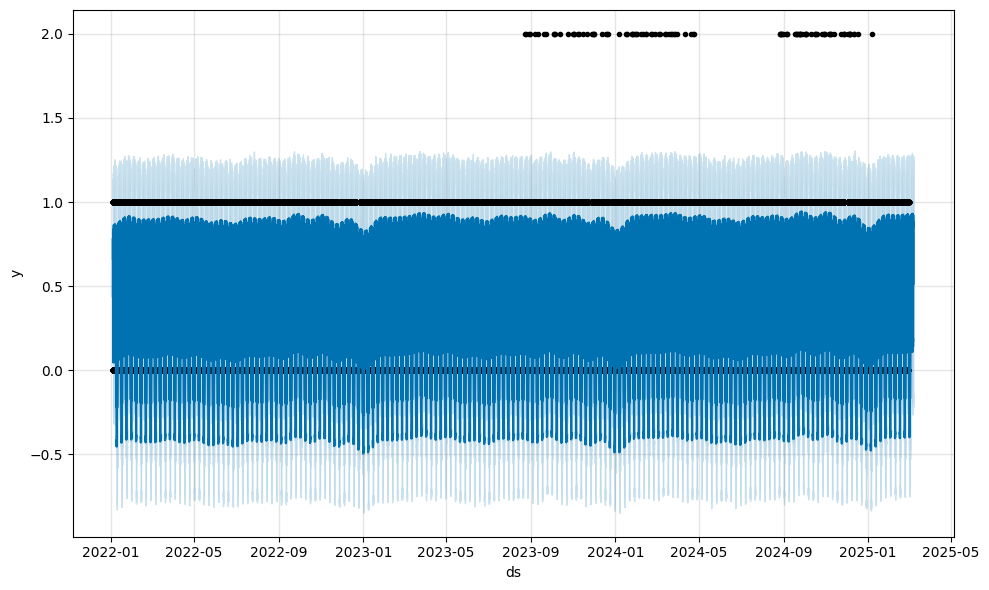

In [ ]:
#now we want visuals
fig_prek1_proph =  prek1_model_proph.plot(prek1_forecast_proph)
fig_prek1_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

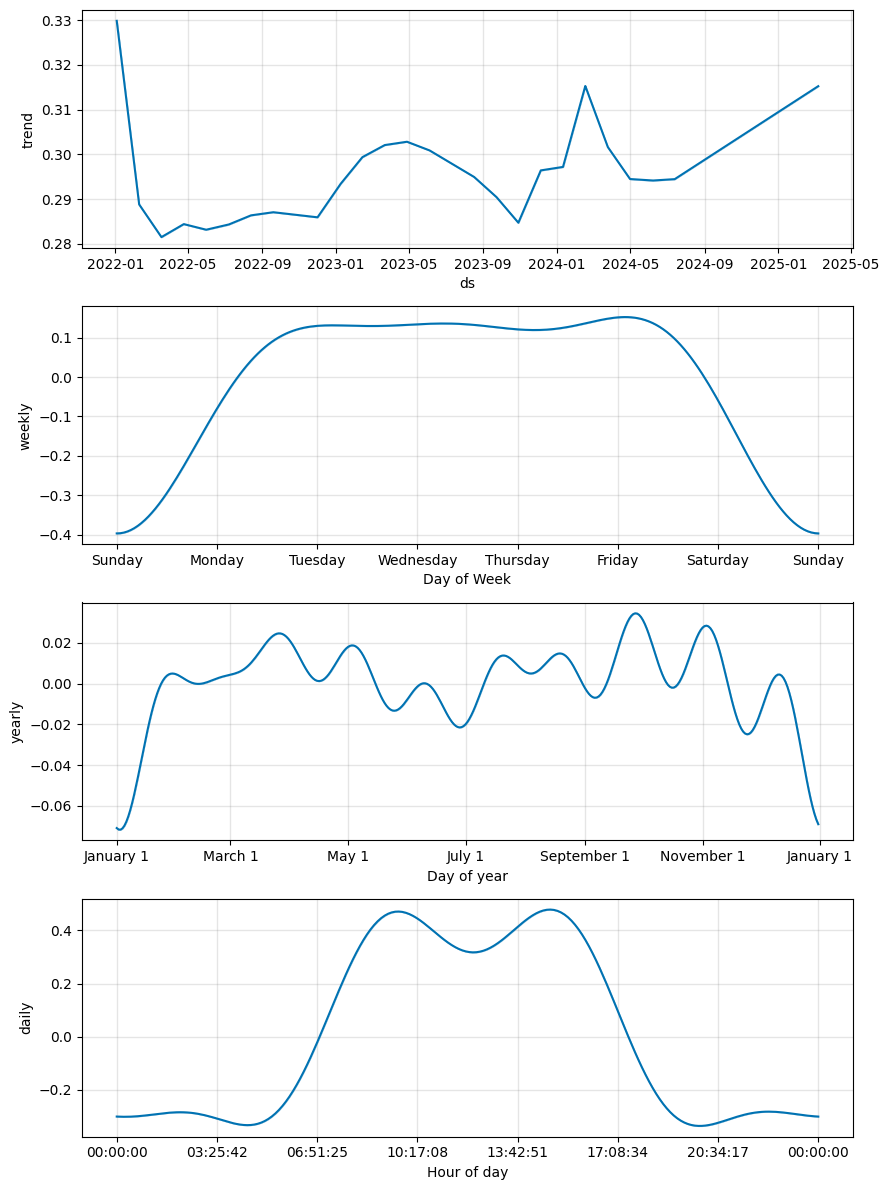

In [ ]:
#now lets plot out or components
# Plot the components of the forecast
fig_prek1_proph = prek1_model_proph.plot_components(prek1_forecast_proph)
fig_prek1_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

In [ ]:
#this one just takes so long to process might not be able to use.... ahh im not sure

#how to check accuracy for prophet models
#from prophet import Prophet
#from prophet.diagnostics import cross_validation
#from prophet.diagnostics import performance_metrics

#then perform some cross validation (decided to use 2 years for initial, 1 year for period, and for the forecast horizon i decided 90 days())
#prek1_model_proph_cv = cross_validation(prek1_model_proph, initial='730 days', period='365', horizon = '5')



In [ ]:
#get cross validation data, this will help me determine how well the model worked with the data and predicting it
#prek1_model_proph_score = performance_metrics(prek1_model_proph_cv)
#prek1_model_proph_score.head()

Final concensus: Going to go with prophet for simplicity sake. I dont think the interation between staffing needs and the date is complex enough to justify using pygam


Next step: calculate the remainder of the 1 week staffing needs forecasts


DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/1e_g7akf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/jrws6m7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35096', 'data', 'file=/tmp/tmpmjr2uyht/1e_g7akf.json', 'init=/tmp/tmpmjr2uyht/jrws6m7l.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelxwmcq4rn/prophet_model-20250511092815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:28:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds      yhat
55318 2025-02-28 18:00:00  0.302689
55319 2025-02-28 18:30:00  0.188259
55320 2025-02-28 19:00:00  0.098399
55321 2025-02-28 19:30:00  0.036503
55322 2025-02-28 20:00:00  0.000964
...                   ...       ...
55649 2025-03-07 15:30:00  0.856182
55650 2025-03-07 16:00:00  0.789912
55651 2025-03-07 16:30:00  0.690287
55652 2025-03-07 17:00:00  0.566786
55653 2025-03-07 17:30:00  0.432660

[336 rows x 2 columns]

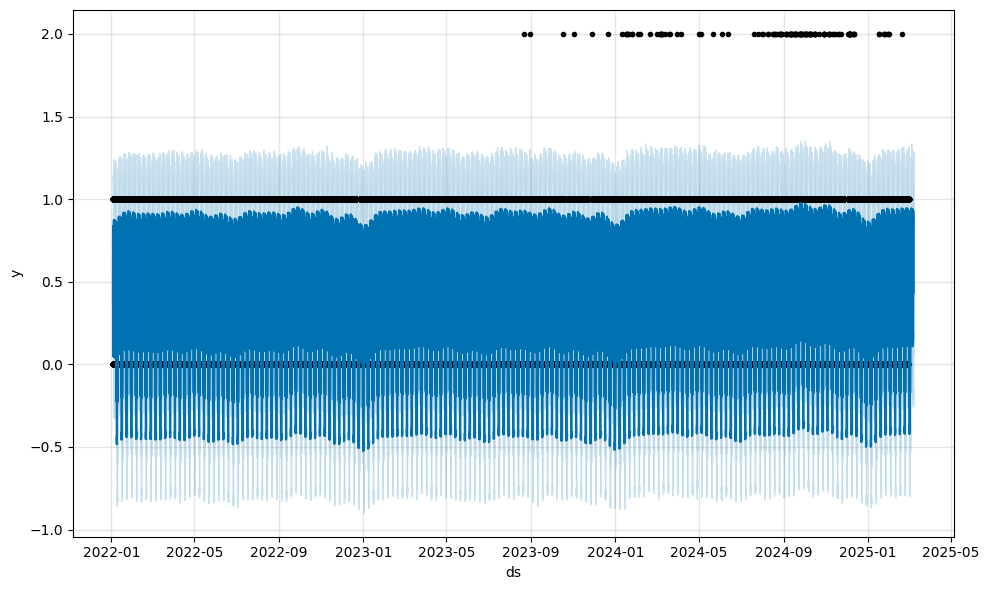

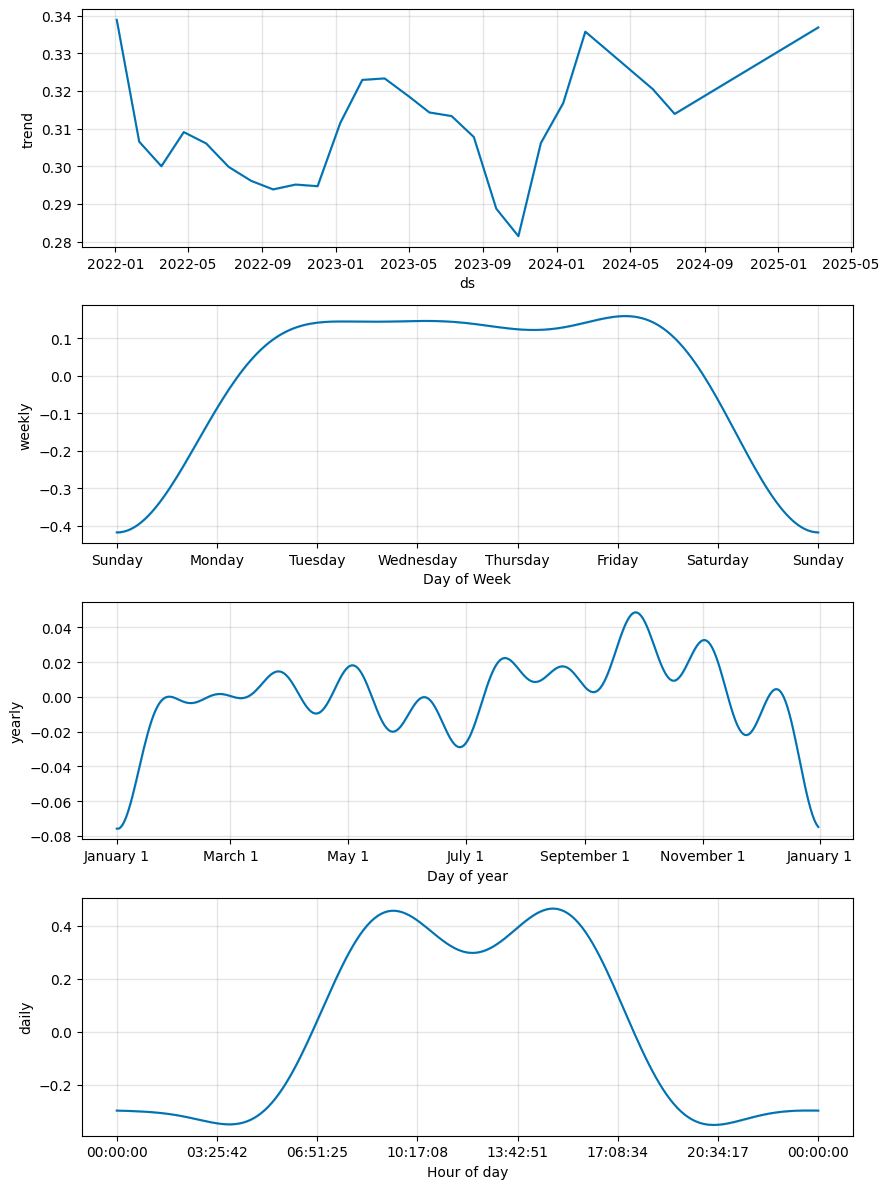

In [ ]:
#Prophet forecast for Pre-K2
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
prek2_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Pre-K2']

#keep only the dates and y vlaues
prek2_data_proph = prek2_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
prek2_data_proph = pd.DataFrame(prek2_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

prek2_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

prek2_model_proph.fit(prek2_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_prek2 = prek2_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
prek2_forecast_proph = prek2_model_proph.predict(future_prek2)

prek2_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_prek2 = prek2_forecast_proph[['ds','yhat']][-336:] #.round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_prek2)

final_forecast_week_prek2.to_csv("final_forecast_week_prek2.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_prek2_proph =  prek2_model_proph.plot(prek2_forecast_proph)
fig_prek2_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_prek2_proph = prek2_model_proph.plot_components(prek2_forecast_proph)
fig_prek2_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/u4r8vuh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/btxzx6ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84630', 'data', 'file=/tmp/tmpmjr2uyht/u4r8vuh4.json', 'init=/tmp/tmpmjr2uyht/btxzx6ed.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modeli7eys71t/prophet_model-20250511062955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:30:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55318 2025-02-28 18:00:00   0.0
55319 2025-02-28 18:30:00  -0.0
55320 2025-02-28 19:00:00  -0.0
55321 2025-02-28 19:30:00  -0.0
55322 2025-02-28 20:00:00  -0.0
...                   ...   ...
55649 2025-03-07 15:30:00   1.0
55650 2025-03-07 16:00:00   1.0
55651 2025-03-07 16:30:00   1.0
55652 2025-03-07 17:00:00   0.0
55653 2025-03-07 17:30:00   0.0

[336 rows x 2 columns]

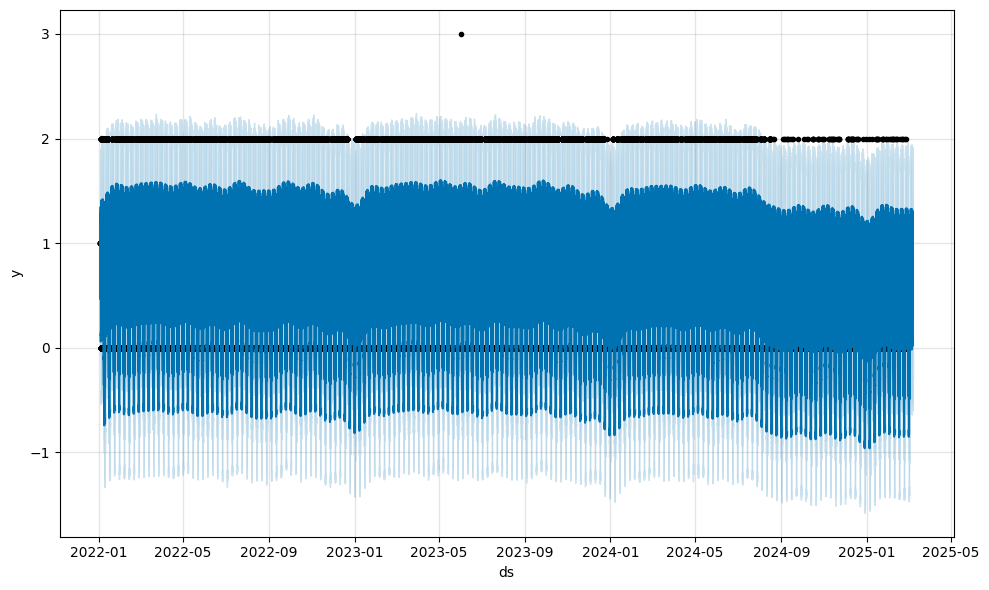

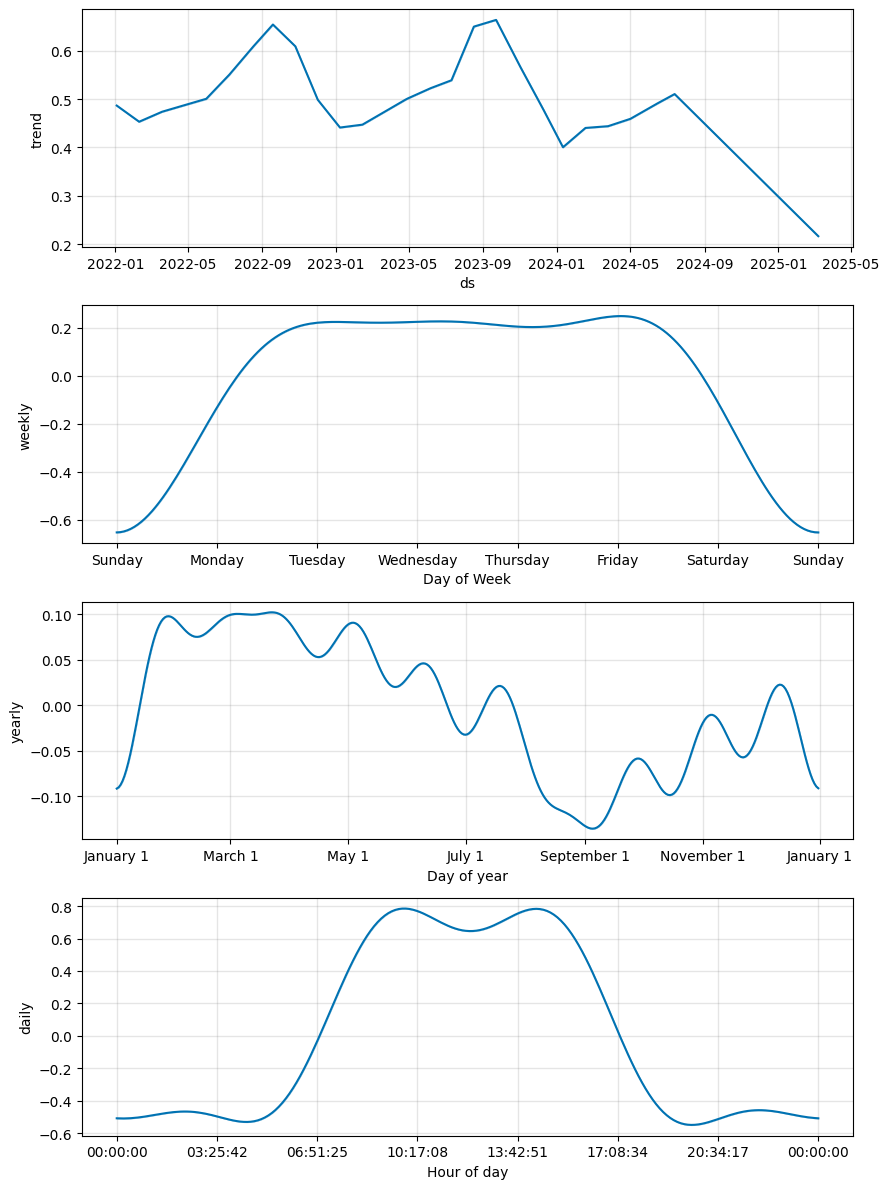

In [ ]:
#Prophet forecast for Pennie Preschool
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
pen_pre_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Pennie Preschool 1']

#keep only the dates and y vlaues
pen_pre_data_proph = pen_pre_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
pen_pre_data_proph = pd.DataFrame(pen_pre_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

pen_pre_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

pen_pre_model_proph.fit(pen_pre_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_pen_pre = pen_pre_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
pen_pre_forecast_proph = pen_pre_model_proph.predict(future_pen_pre)

pen_pre_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_pen_pre = pen_pre_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_pen_pre)

final_forecast_week_pen_pre.to_csv("final_forecast_week_pen_pre.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_pen_pre_proph =  pen_pre_model_proph.plot(pen_pre_forecast_proph)
fig_pen_pre_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_pen_pre_proph = pen_pre_model_proph.plot_components(pen_pre_forecast_proph)
fig_pen_pre_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/ajewqij_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/egv4intu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56474', 'data', 'file=/tmp/tmpmjr2uyht/ajewqij_.json', 'init=/tmp/tmpmjr2uyht/egv4intu.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelis0q4wng/prophet_model-20250511063621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55318 2025-02-28 18:30:00   0.0
55319 2025-02-28 19:00:00   0.0
55320 2025-02-28 19:30:00   0.0
55321 2025-02-28 20:00:00   0.0
55322 2025-02-28 20:30:00   0.0
...                   ...   ...
55649 2025-03-07 16:00:00   1.0
55650 2025-03-07 16:30:00   1.0
55651 2025-03-07 17:00:00   1.0
55652 2025-03-07 17:30:00   0.0
55653 2025-03-07 18:00:00   0.0

[336 rows x 2 columns]

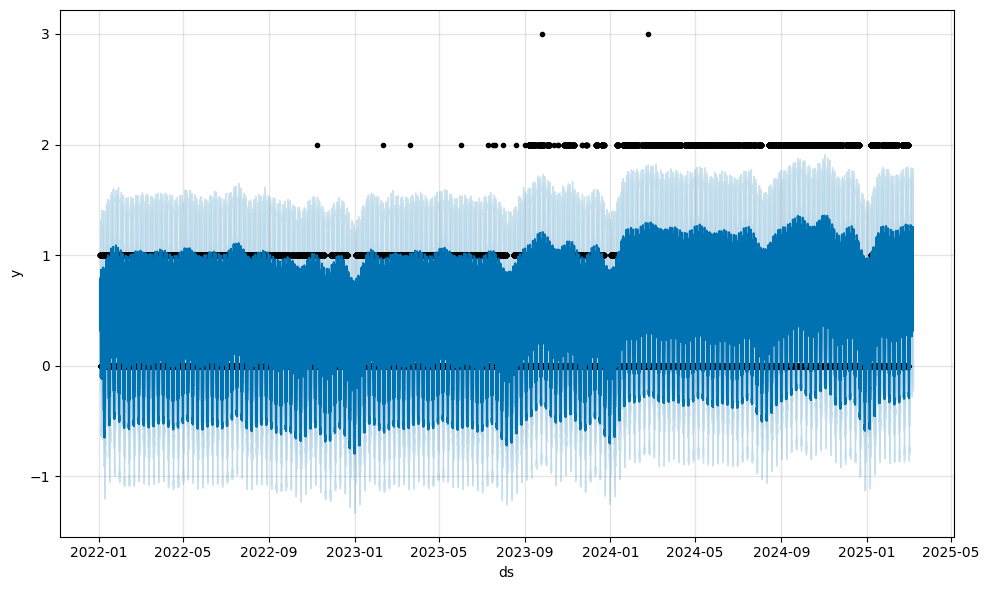

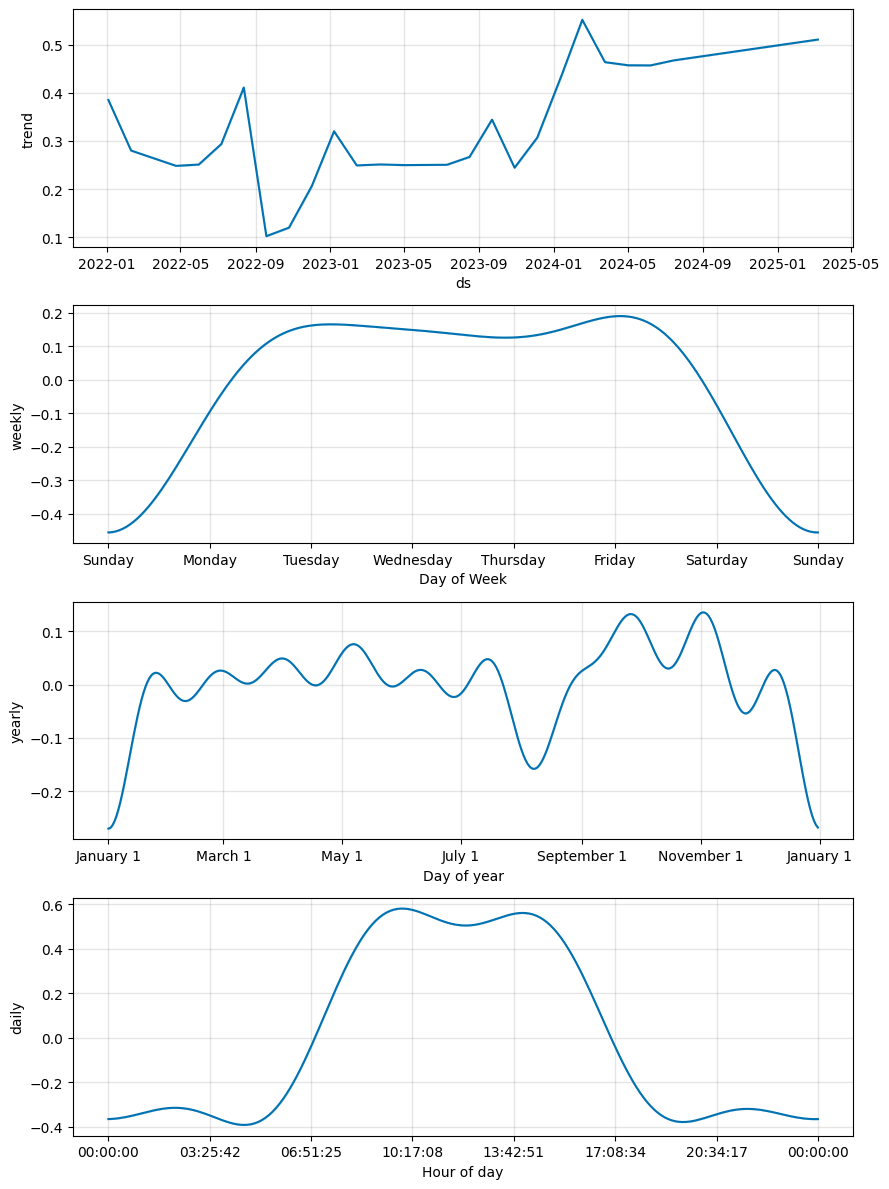

In [ ]:
#Prophet forecast for Grampy Tom Multi-Age
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
gramp_multi_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Multi-Age']

#keep only the dates and y vlaues
gramp_multi_data_proph = gramp_multi_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
gramp_multi_data_proph = pd.DataFrame(gramp_multi_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

gramp_multi_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

gramp_multi_model_proph.fit(gramp_multi_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_gramp_multi = gramp_multi_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
gramp_multi_forecast_proph = gramp_multi_model_proph.predict(future_gramp_multi)

gramp_multi_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_gramp_multi = gramp_multi_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_gramp_multi)

final_forecast_week_gramp_multi.to_csv("final_forecast_week_gramp_multi.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_gramp_multi_proph =  gramp_multi_model_proph.plot(gramp_multi_forecast_proph)
fig_gramp_multi_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_gramp_multi_proph = gramp_multi_model_proph.plot_components(gramp_multi_forecast_proph)
fig_gramp_multi_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/8qq94glx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/bnhx1nzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76628', 'data', 'file=/tmp/tmpmjr2uyht/8qq94glx.json', 'init=/tmp/tmpmjr2uyht/bnhx1nzc.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelyrl51dk2/prophet_model-20250511064123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55316 2025-02-28 17:30:00   0.0
55317 2025-02-28 18:00:00   0.0
55318 2025-02-28 18:30:00   0.0
55319 2025-02-28 19:00:00   0.0
55320 2025-02-28 19:30:00  -0.0
...                   ...   ...
55647 2025-03-07 15:00:00   1.0
55648 2025-03-07 15:30:00   1.0
55649 2025-03-07 16:00:00   1.0
55650 2025-03-07 16:30:00   1.0
55651 2025-03-07 17:00:00   0.0

[336 rows x 2 columns]

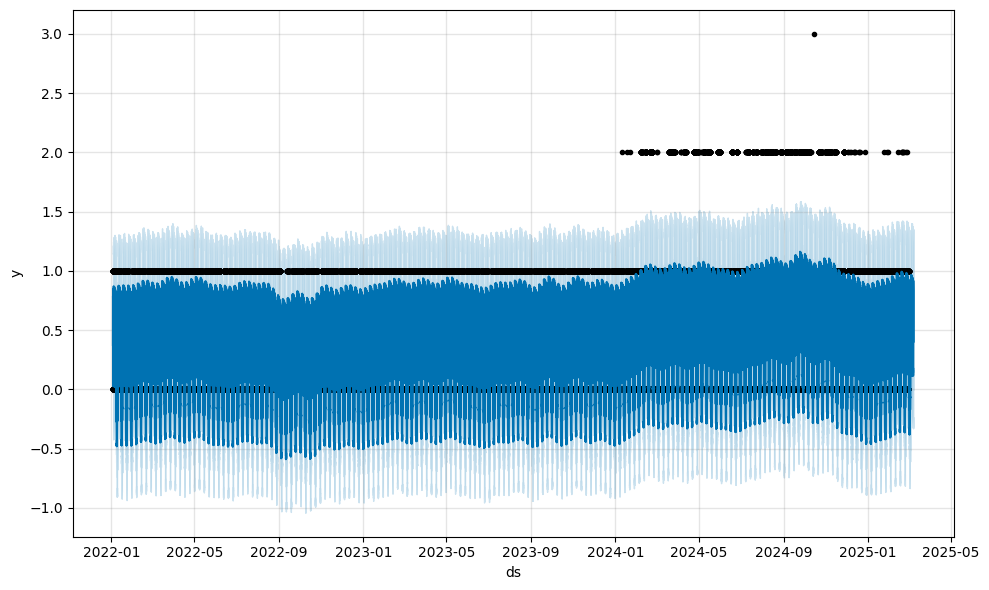

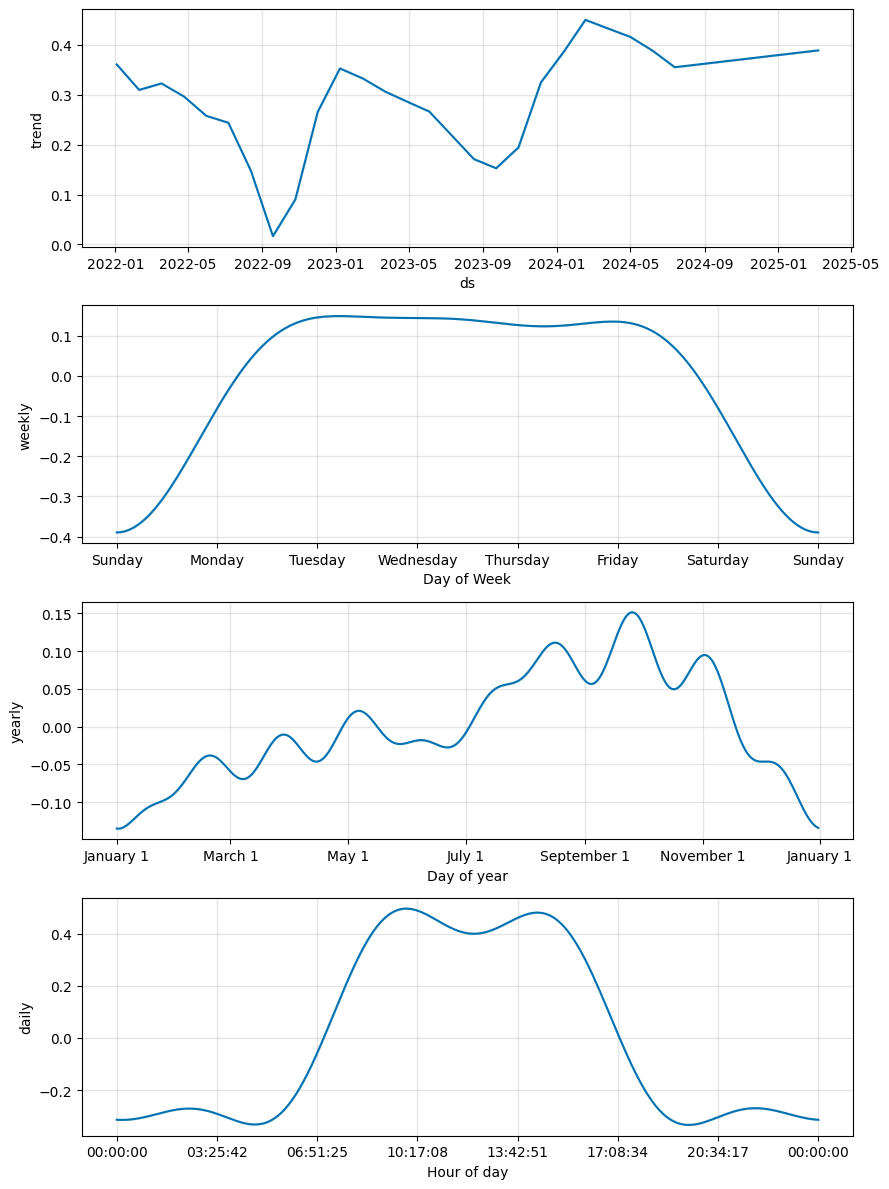

In [ ]:
#Prophet forecast for Pennie Toddlers
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
pen_tod_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Pennie Toddlers']

#keep only the dates and y vlaues
pen_tod_data_proph = pen_tod_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
pen_tod_data_proph = pd.DataFrame(pen_tod_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

pen_tod_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

pen_tod_model_proph.fit(pen_tod_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_pen_tod = pen_tod_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
pen_tod_forecast_proph = pen_tod_model_proph.predict(future_pen_tod)

pen_tod_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_pen_tod = pen_tod_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_pen_tod)

final_forecast_week_pen_tod.to_csv("final_forecast_week_pen_tod.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_pen_tod_proph =  pen_tod_model_proph.plot(pen_tod_forecast_proph)
fig_pen_tod_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_pen_tod_proph = pen_tod_model_proph.plot_components(pen_tod_forecast_proph)
fig_pen_tod_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/eyw5qat_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/mle25mnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65679', 'data', 'file=/tmp/tmpmjr2uyht/eyw5qat_.json', 'init=/tmp/tmpmjr2uyht/mle25mnp.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelluv_ebem/prophet_model-20250511065834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55316 2025-02-28 18:00:00   0.0
55317 2025-02-28 18:30:00   0.0
55318 2025-02-28 19:00:00   0.0
55319 2025-02-28 19:30:00   0.0
55320 2025-02-28 20:00:00   0.0
...                   ...   ...
55647 2025-03-07 15:30:00   1.0
55648 2025-03-07 16:00:00   1.0
55649 2025-03-07 16:30:00   1.0
55650 2025-03-07 17:00:00   1.0
55651 2025-03-07 17:30:00   1.0

[336 rows x 2 columns]

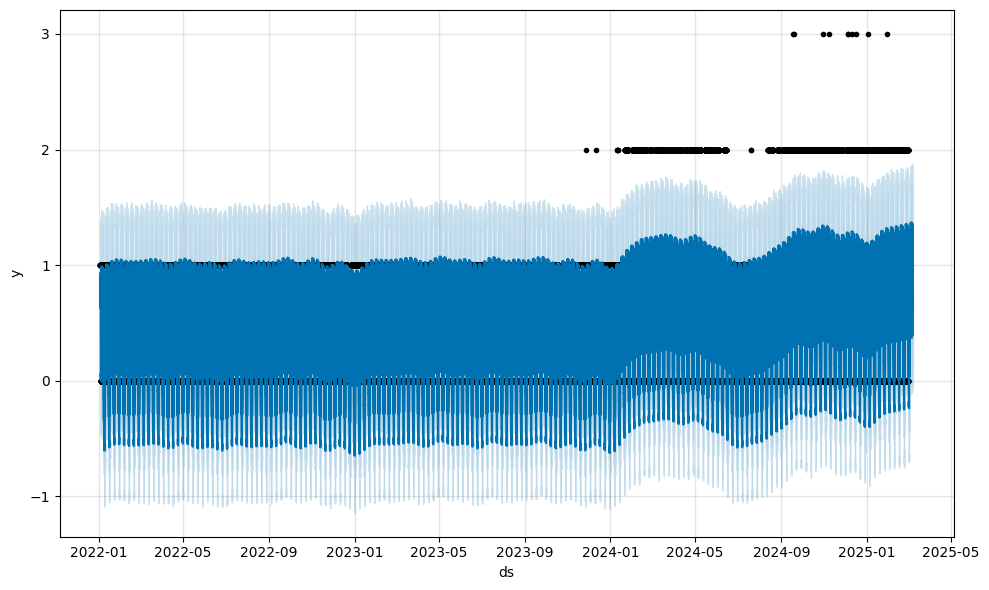

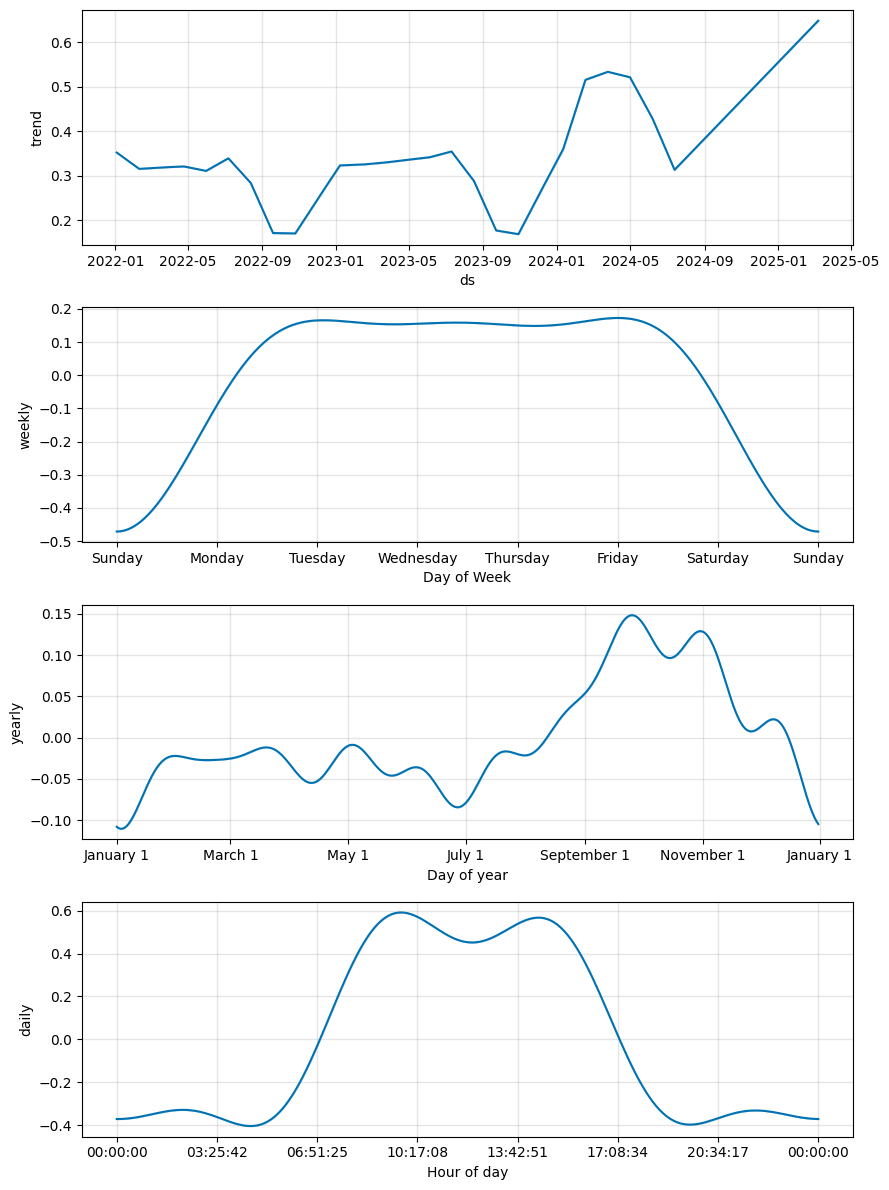

In [ ]:
#Prophet forecast for Henry Toddlers
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
henr_tod_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Henry Toddlers']

#keep only the dates and y vlaues
henr_tod_data_proph = henr_tod_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
henr_tod_data_proph = pd.DataFrame(henr_tod_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

henr_tod_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

henr_tod_model_proph.fit(henr_tod_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_henr_tod = henr_tod_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
henr_tod_forecast_proph = henr_tod_model_proph.predict(future_henr_tod)

henr_tod_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_henr_tod = henr_tod_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_henr_tod)

final_forecast_week_henr_tod.to_csv("final_forecast_week_henr_tod.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_henr_tod_proph =  henr_tod_model_proph.plot(henr_tod_forecast_proph)
fig_henr_tod_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_henr_tod_proph = henr_tod_model_proph.plot_components(henr_tod_forecast_proph)
fig_henr_tod_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/4c3ko9ub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/e293wbsg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64406', 'data', 'file=/tmp/tmpmjr2uyht/4c3ko9ub.json', 'init=/tmp/tmpmjr2uyht/e293wbsg.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelc8qmp08g/prophet_model-20250511070426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55221 2025-02-28 17:30:00   1.0
55222 2025-02-28 18:00:00   0.0
55223 2025-02-28 18:30:00   0.0
55224 2025-02-28 19:00:00   0.0
55225 2025-02-28 19:30:00   0.0
...                   ...   ...
55552 2025-03-07 15:00:00   1.0
55553 2025-03-07 15:30:00   1.0
55554 2025-03-07 16:00:00   1.0
55555 2025-03-07 16:30:00   1.0
55556 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

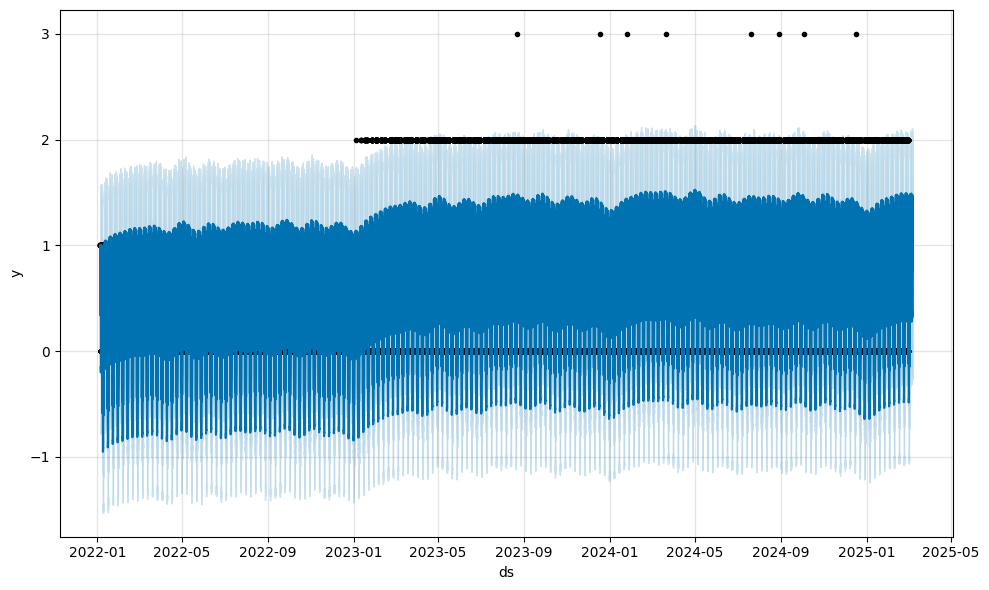

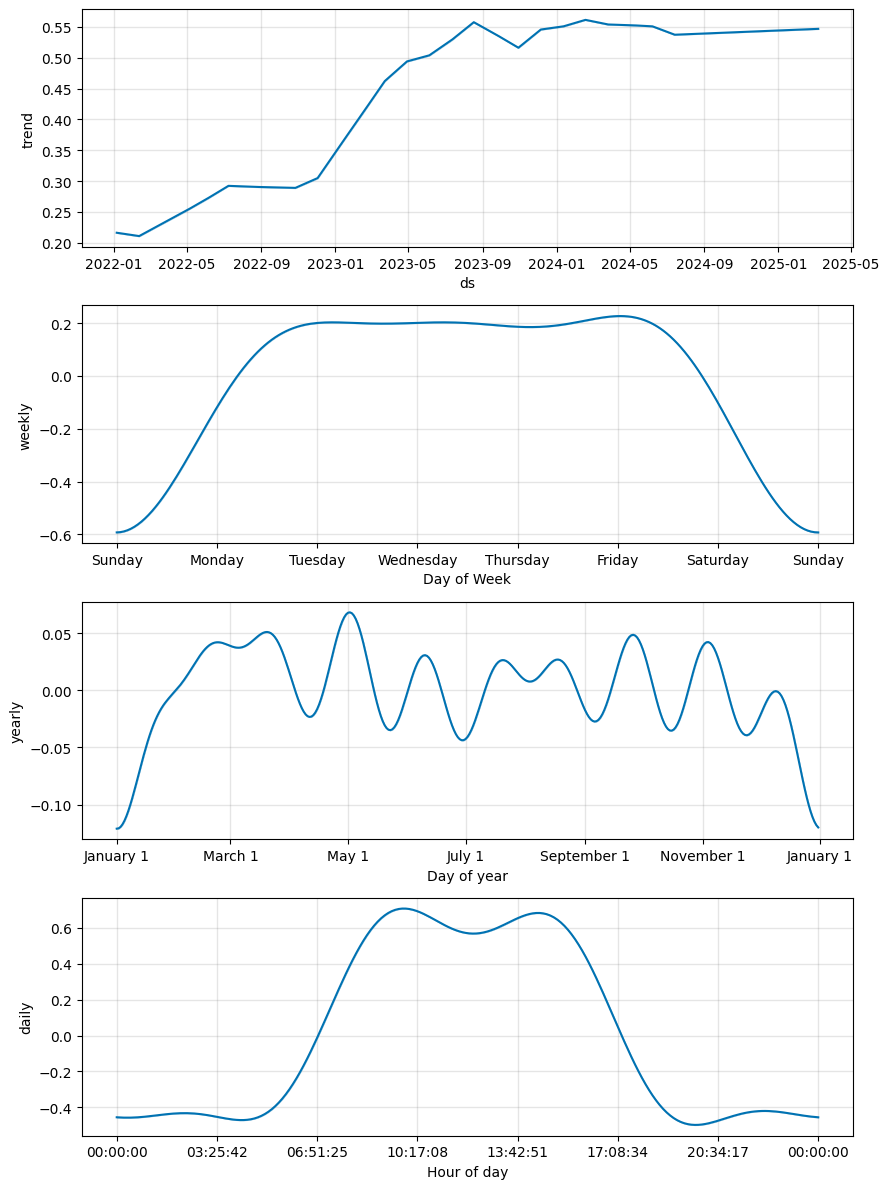

In [ ]:
#Prophet forecast for Grampy Tom Toddlers
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
gramp_tod_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Toddlers']

#keep only the dates and y vlaues
gramp_tod_data_proph = gramp_tod_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
gramp_tod_data_proph = pd.DataFrame(gramp_tod_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

gramp_tod_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

gramp_tod_model_proph.fit(gramp_tod_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_gramp_tod = gramp_tod_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
gramp_tod_forecast_proph = gramp_tod_model_proph.predict(future_gramp_tod)

gramp_tod_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_gramp_tod = gramp_tod_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_gramp_tod)

final_forecast_week_gramp_tod.to_csv("final_forecast_week_gramp_tod.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_gramp_tod_proph =  gramp_tod_model_proph.plot(gramp_tod_forecast_proph)
fig_gramp_tod_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_gramp_tod_proph = gramp_tod_model_proph.plot_components(gramp_tod_forecast_proph)
fig_gramp_tod_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/zedpcqmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/pre32z29.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53854', 'data', 'file=/tmp/tmpmjr2uyht/zedpcqmg.json', 'init=/tmp/tmpmjr2uyht/pre32z29.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelm2985xqg/prophet_model-20250511070735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55219 2025-02-28 17:30:00   0.0
55220 2025-02-28 18:00:00   0.0
55221 2025-02-28 18:30:00   0.0
55222 2025-02-28 19:00:00   0.0
55223 2025-02-28 19:30:00   0.0
...                   ...   ...
55550 2025-03-07 15:00:00   1.0
55551 2025-03-07 15:30:00   1.0
55552 2025-03-07 16:00:00   1.0
55553 2025-03-07 16:30:00   1.0
55554 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

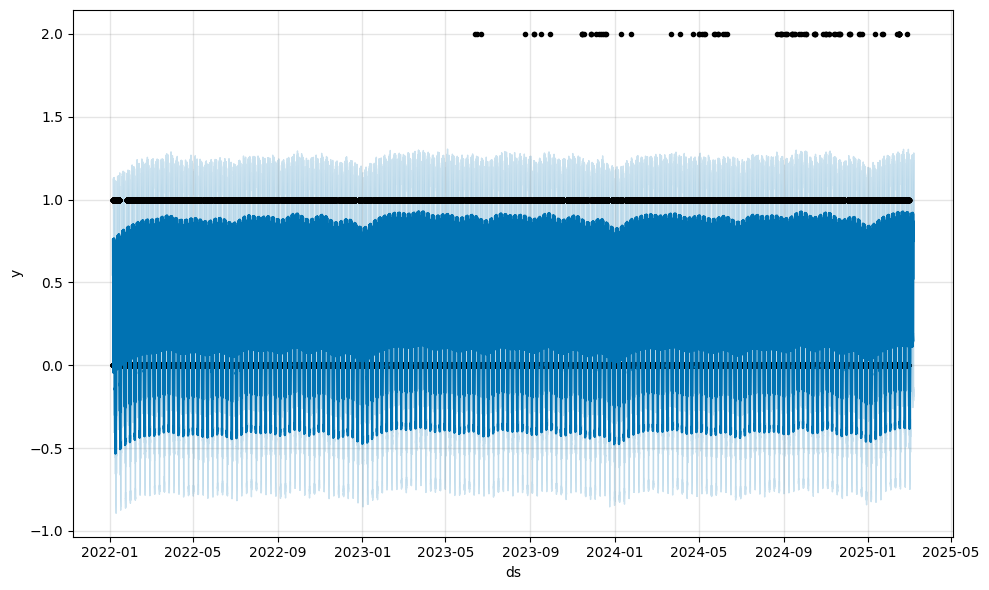

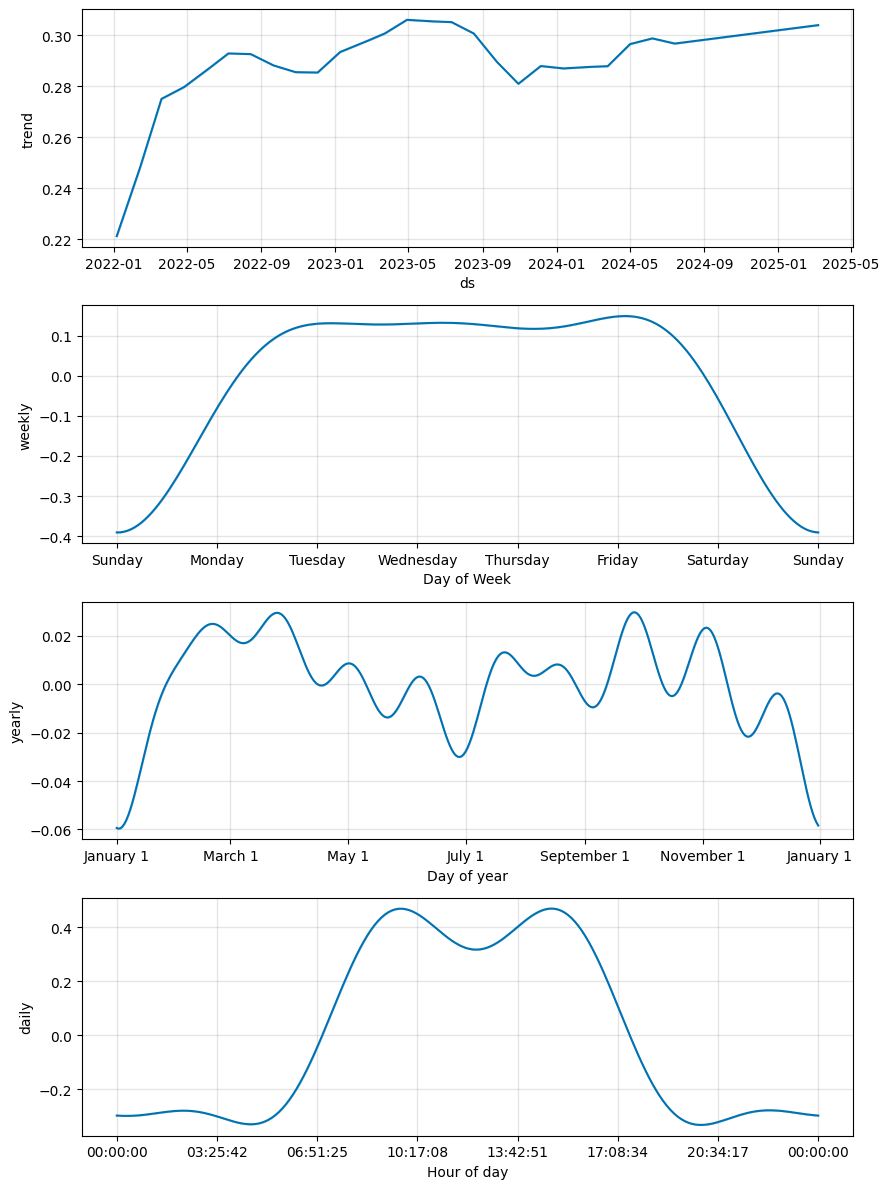

In [ ]:
#Prophet forecast for Grampy Tom Preschool
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
gramp_pre_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Grampy Tom Preschool']

#keep only the dates and y vlaues
gramp_pre_data_proph = gramp_pre_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
gramp_pre_data_proph = pd.DataFrame(gramp_pre_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

gramp_pre_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

gramp_pre_model_proph.fit(gramp_pre_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_gramp_pre = gramp_pre_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
gramp_pre_forecast_proph = gramp_pre_model_proph.predict(future_gramp_pre)

gramp_pre_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_gramp_pre = gramp_pre_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_gramp_pre)

final_forecast_week_gramp_pre.to_csv("final_forecast_week_gramp_pre.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_gramp_pre_proph =  gramp_pre_model_proph.plot(gramp_pre_forecast_proph)
fig_gramp_pre_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_gramp_pre_proph = gramp_pre_model_proph.plot_components(gramp_pre_forecast_proph)
fig_gramp_pre_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/s4idr2ac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/n6jykq2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37593', 'data', 'file=/tmp/tmpmjr2uyht/s4idr2ac.json', 'init=/tmp/tmpmjr2uyht/n6jykq2a.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelwagnu9fc/prophet_model-20250511071016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55219 2025-02-28 17:30:00   0.0
55220 2025-02-28 18:00:00   0.0
55221 2025-02-28 18:30:00   0.0
55222 2025-02-28 19:00:00   0.0
55223 2025-02-28 19:30:00   0.0
...                   ...   ...
55550 2025-03-07 15:00:00   1.0
55551 2025-03-07 15:30:00   1.0
55552 2025-03-07 16:00:00   1.0
55553 2025-03-07 16:30:00   1.0
55554 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

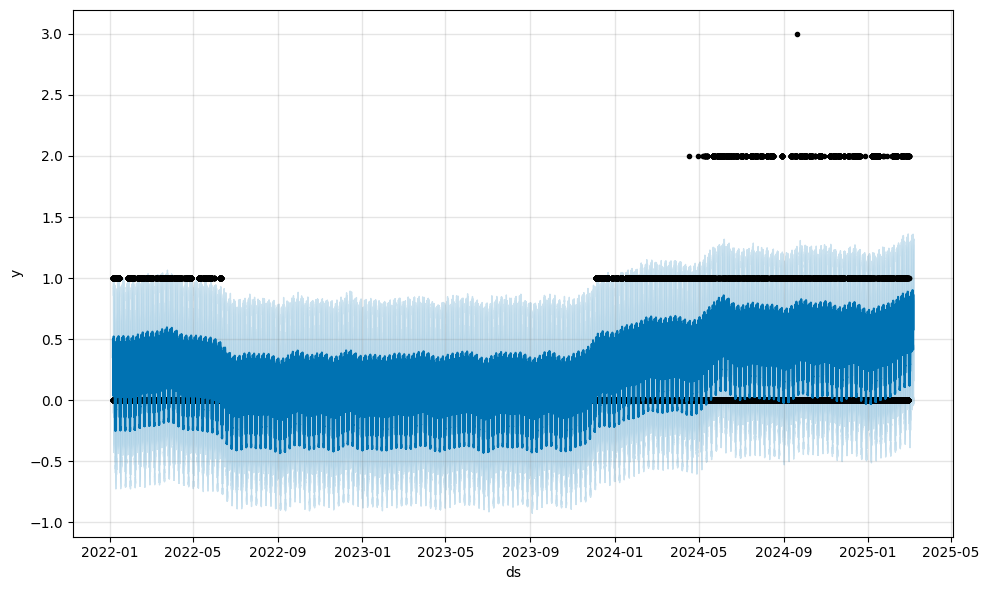

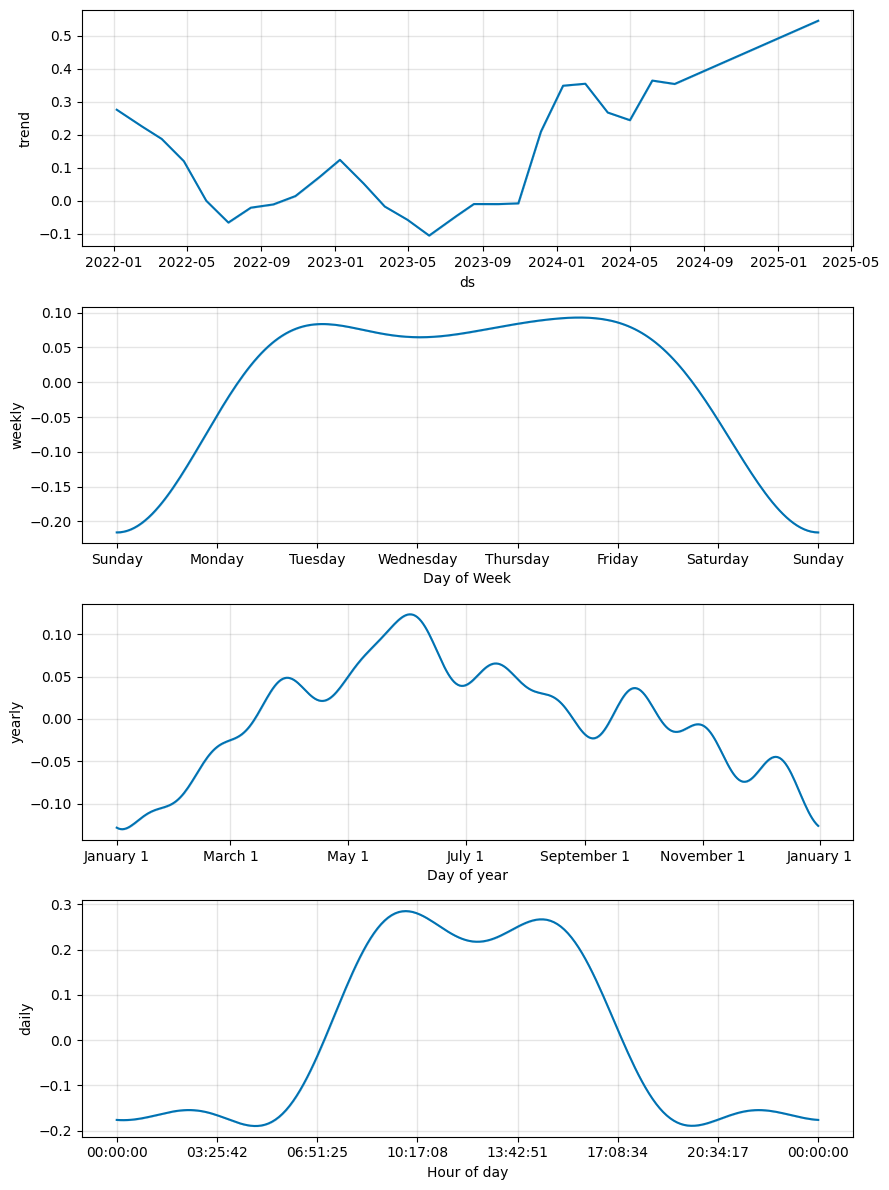

In [ ]:
#Prophet forecast for Henry Infants
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
henr_inf_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Henry Infants']

#keep only the dates and y vlaues
henr_inf_data_proph = henr_inf_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
henr_inf_data_proph = pd.DataFrame(henr_inf_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

henr_inf_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

henr_inf_model_proph.fit(henr_inf_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_henr_inf = henr_inf_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
henr_inf_forecast_proph = henr_inf_model_proph.predict(future_henr_inf)

henr_inf_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_henr_inf = henr_inf_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_henr_inf)

final_forecast_week_henr_inf.to_csv("final_forecast_week_henr_inf.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_henr_inf_proph =  henr_inf_model_proph.plot(henr_inf_forecast_proph)
fig_henr_inf_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_henr_inf_proph = henr_inf_model_proph.plot_components(henr_inf_forecast_proph)
fig_henr_inf_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/nm8bc1ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/18zp2mva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92633', 'data', 'file=/tmp/tmpmjr2uyht/nm8bc1ea.json', 'init=/tmp/tmpmjr2uyht/18zp2mva.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelcqzcmcbb/prophet_model-20250511071255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:13:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55219 2025-02-28 17:30:00   0.0
55220 2025-02-28 18:00:00   0.0
55221 2025-02-28 18:30:00   0.0
55222 2025-02-28 19:00:00   0.0
55223 2025-02-28 19:30:00   0.0
...                   ...   ...
55550 2025-03-07 15:00:00   1.0
55551 2025-03-07 15:30:00   1.0
55552 2025-03-07 16:00:00   1.0
55553 2025-03-07 16:30:00   1.0
55554 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

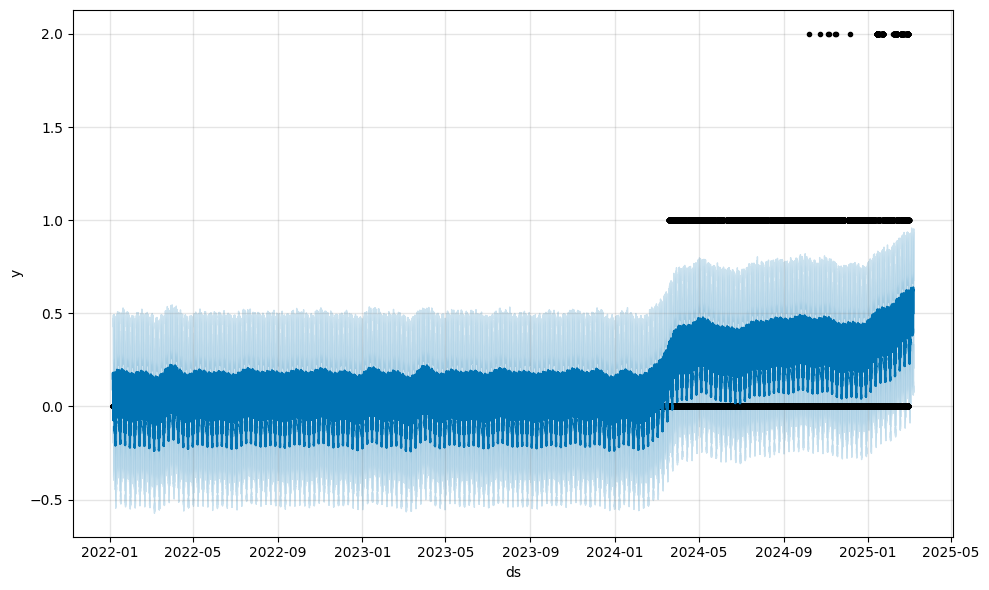

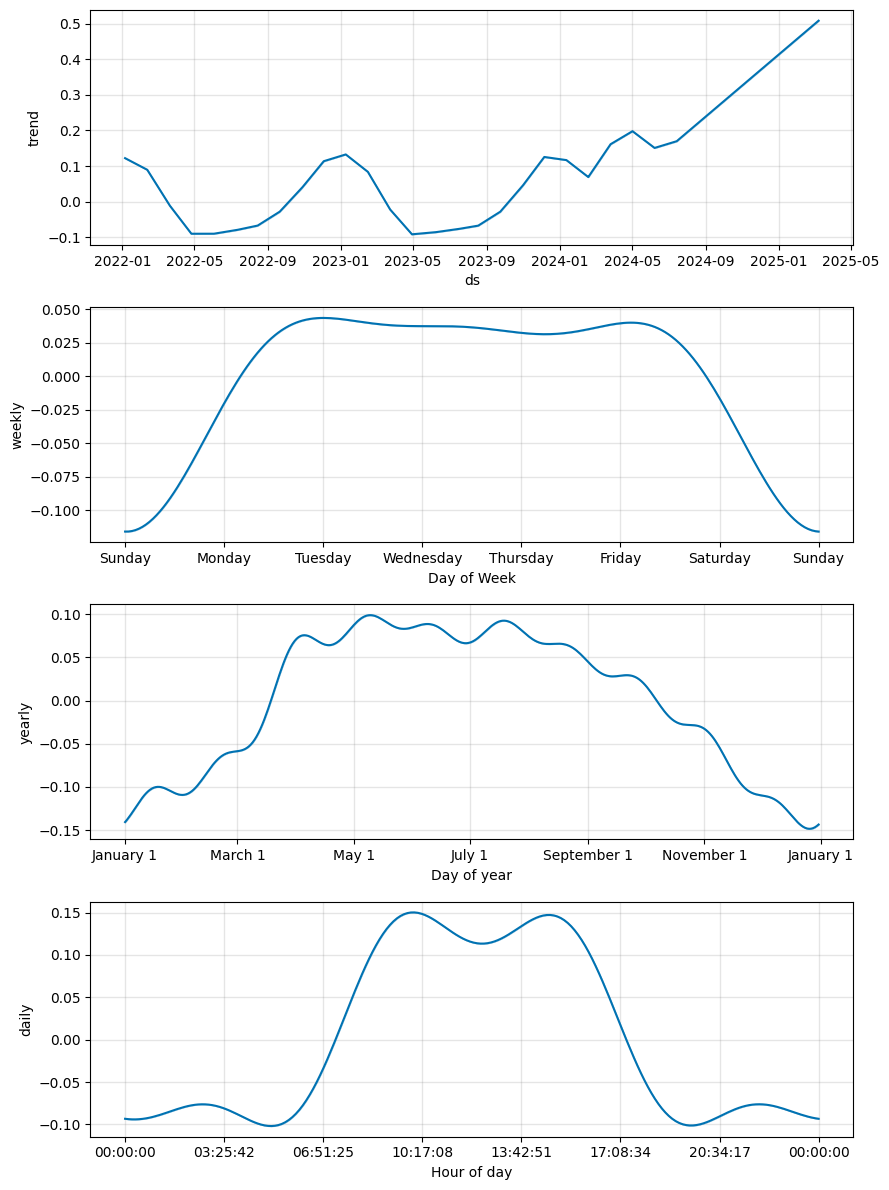

In [ ]:
#Prophet forecast for Pennie Infants
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
pen_inf_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Pennie Infants']

#keep only the dates and y vlaues
pen_inf_data_proph = pen_inf_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
pen_inf_data_proph = pd.DataFrame(pen_inf_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

pen_inf_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

pen_inf_model_proph.fit(pen_inf_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_pen_inf = pen_inf_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
pen_inf_forecast_proph = pen_inf_model_proph.predict(future_pen_inf)

pen_inf_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_pen_inf = pen_inf_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_pen_inf)

final_forecast_week_pen_inf.to_csv("final_forecast_week_pen_inf.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_pen_inf_proph =  pen_inf_model_proph.plot(pen_inf_forecast_proph)
fig_pen_inf_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_pen_inf_proph = pen_inf_model_proph.plot_components(pen_inf_forecast_proph)
fig_pen_inf_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/0hjf95sm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjr2uyht/izpjhzmf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59500', 'data', 'file=/tmp/tmpmjr2uyht/0hjf95sm.json', 'init=/tmp/tmpmjr2uyht/izpjhzmf.json', 'output', 'file=/tmp/tmpmjr2uyht/prophet_modelm3rgx2a_/prophet_model-20250511071635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:16:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:17:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat
55219 2025-02-28 17:30:00   1.0
55220 2025-02-28 18:00:00   0.0
55221 2025-02-28 18:30:00   0.0
55222 2025-02-28 19:00:00   0.0
55223 2025-02-28 19:30:00   0.0
...                   ...   ...
55550 2025-03-07 15:00:00   1.0
55551 2025-03-07 15:30:00   1.0
55552 2025-03-07 16:00:00   1.0
55553 2025-03-07 16:30:00   1.0
55554 2025-03-07 17:00:00   1.0

[336 rows x 2 columns]

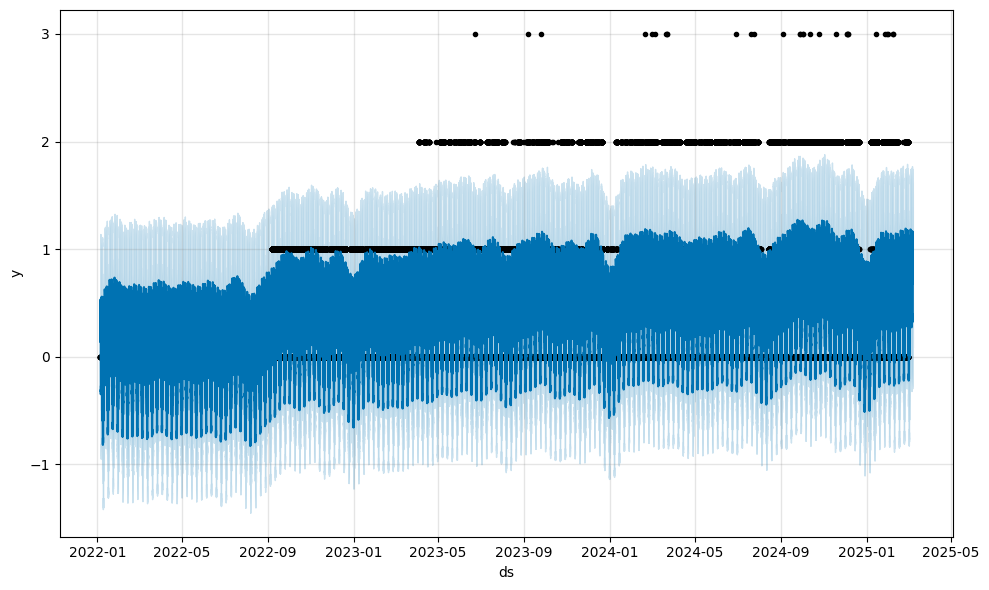

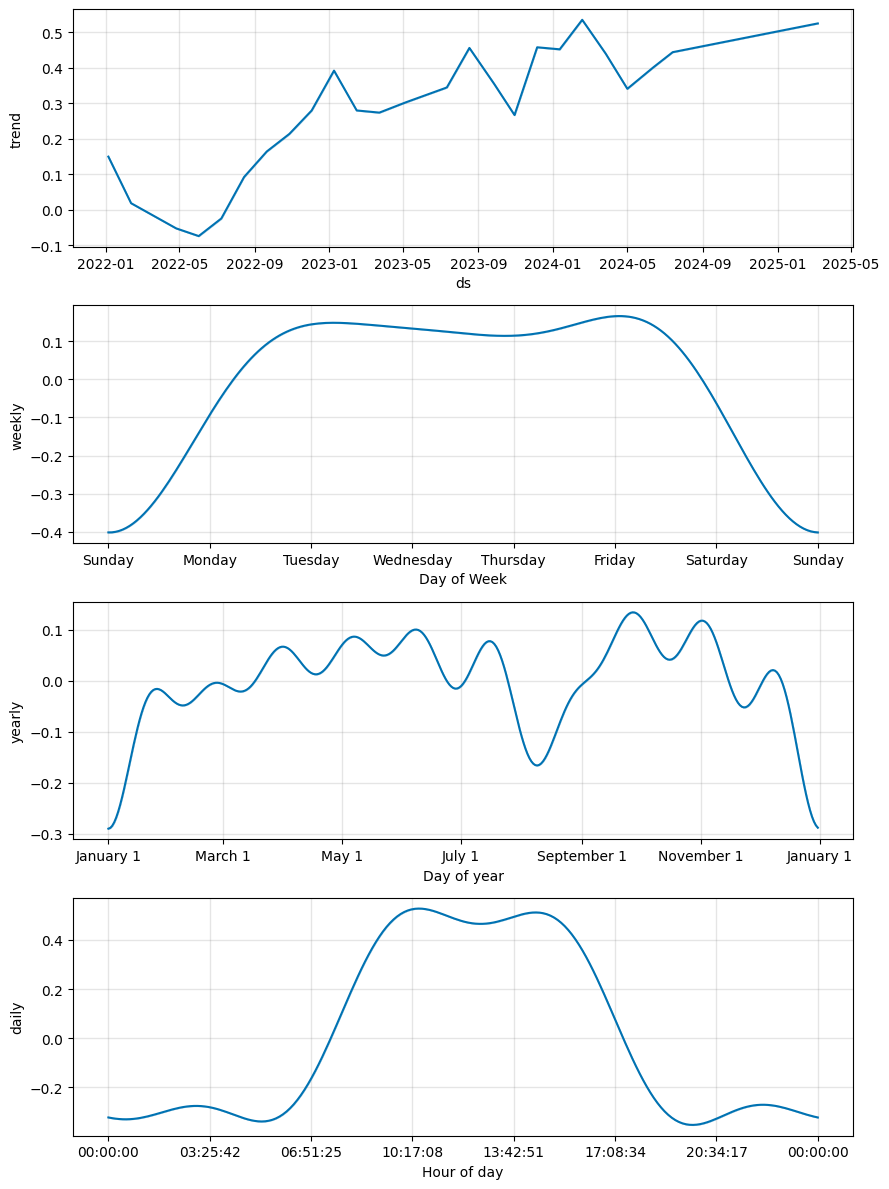

In [ ]:
#Prophet forecast for Henry Multi-Age
import pandas as pd
import numpy as np
from prophet import Prophet


# Read in data, (filter out  data from combined dataset)
henr_multi_data_proph= ecec_count_full[ecec_count_full['Room'] == 'Henry Multi-Age']

#keep only the dates and y vlaues
henr_multi_data_proph = henr_multi_data_proph[['Interval', 'Staffing Needs']] #filer data set to only keep 2 colums


#recreate the data frame with correct labels
henr_multi_data_proph = pd.DataFrame(henr_multi_data_proph.values, columns = ['ds', 'y']) #ds = Interval, Y= Staffing need

#now we can create our model

henr_multi_model_proph = Prophet(changepoint_prior_scale=0.5) #chaangepoint prior scale needs to be secified, teacher used .5 just to test and see
#this is bbasically saying how 'bendy we want the model' if this number is higer then were going to have a more felxible but also more likley to be overfit model
#the lower the model the less flexible it is but the smoother it is (less likely to be overfit)

henr_multi_model_proph.fit(henr_multi_data_proph)

#now we have a model m thats been fit. Now we can make a prediction

# Create an empty dataframe with dates for future periods (need at least one week)
future_henr_multi = henr_multi_model_proph.make_future_dataframe(periods=336, freq = '0.50h') #did 336 because there are 336 30 minute intervals in a 7 day week
 #freq = '0.50H'documentation make its so that the data is being interpreted in the 30 minute intervals

#should do th ther periods based on how many 30 minute segments there are in a week
# Predict will fill in  empty dataframe wtih forecasts of `y` for the future periods
henr_multi_forecast_proph = henr_multi_model_proph.predict(future_henr_multi)

henr_multi_forecast_proph.head()

#this will gives us all the times from the beginning of our data fram PLUS 336 periods at the end (so we looking forward 365 peroiods)
#then we created forecast based on those time periods, so now if we look at the forecast data fram it wil have all of the time periods plus the extra 365 days plus predictions
#all of terms in the forcecast dataframe come together to create our GAM model
#we really care about trend, yearly, and weekly variables

#this will give us back out 336 periods of forcast at the end of the data frame
final_forecast_week_henr_multi = henr_multi_forecast_proph[['ds','yhat']][-336:].round() #<-rounded because cant have a partial employee. Need whole numbers

display(final_forecast_week_henr_multi)

final_forecast_week_henr_multi.to_csv("final_forecast_week_henr_multi.csv", index=False) #this is the next week forecasted data

#yhat = predicted staff needed
#ds = date and time in 30 minute intervals
#takes place over a 7 day period

#now we want visuals
fig_henr_multi_proph =  henr_multi_model_proph.plot(henr_multi_forecast_proph)
fig_henr_multi_proph.show()

#black dots on figure are the actual observations we can see at the end on the right hand side
#the black dots go away because those last periods are our 365 periods of precictions where we are forecasting
#these periods obviously arent occamplied by an observation because we are predicting what they will look like

#now lets plot out or components
# Plot the components of the forecast
fig_henr_multi_proph = henr_multi_model_proph.plot_components(henr_multi_forecast_proph)
fig_henr_multi_proph.show()

#three figures we get:
#gives us a break down of the trends in the previous figure

#year on year trend
#weekday trend
#days of the year trend

START OF FINALLY WORKING ON SPELLMAN DATA YAY

